# <font color='blue'>Credit EDA Assignment

### <font color='green'>Introduction

This assignment aims to give you an idea of applying EDA in a real business scenario. In this assignment, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

### <font color='green'>Business Understanding

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

 

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

All other cases: All other cases when the payment is paid on time.

 

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

**Approved**: The Company has approved loan Application

**Cancelled**: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client, he received worse pricing which he did not want.

**Refused**: The company had rejected the loan (because the client does not meet their requirements etc.).

**Unused offer**:  Loan has been cancelled by the client but at different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency to default.

### <font color='green'>Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.
 
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

## <font color='indigo'>Importing the libraries & warnings.

In [1]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [330]:
#import the useful libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib as mpl

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.cm-s-ipython span.cm-comment { color: blue; }</style>"))

## <font color='indigo'>Import Data

In [5]:
#Read the dataset and check the first five rows
adf = pd.read_csv("application_data.csv")
adf.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [6]:
#Read the dataset and check the first five rows
padf = pd.read_csv("previous_application.csv")
padf.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

## <font color='indigo'>Data Understanding
    
1. **'application_data.csv'**  contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.

 

2. **'previous_application.csv'** contains information about the client’s previous loan data. It contains the data on whether the previous application had been Approved, Cancelled, Refused or Unused offer.
    


### <font color='brown'>a) application_data.csv

In [7]:
#Check the datatypes of all the columns of the dataframe
adf.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [8]:
#Check the shape of the dataframe
adf.shape

(307511, 122)

In [9]:
#Check the quantitative spread of this dataset
adf.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

## <font color='indigo'>Data Understanding

## <font color='indigo'>Checking for Null/Missing Values

In [10]:
#Check the number of null values in the columns
adf.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [11]:
#Percentage of missing values.
adf_per = (100 * adf.isnull().sum()/len(adf))
adf_per

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [12]:
#Columns with high percentage of missing values (> 40%).  
adf_per_40 = adf_per[adf_per > 40] 
adf_per_40

OWN_CAR_AGE                     65.990810
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49

 **<font color='green'>We can remove the columns with high percentage of missing values.**

## <font color='indigo'>Missing Value Treatment

In [13]:
#Creating a list of all columns with high percaentage for ease of working.
adf_null_40 = list(adf_per_40.index)
adf_null_40

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

In [14]:
#Remove the columns having more than 40% null/missing values.
adf.drop(adf_null_40, axis = 1, inplace = True)

In [15]:
#Shape of the dataframe after dropping the columns with high missing values.
adf.shape

(307511, 73)

In [16]:
#Percentage of missing values > 0 after dropping the columns with high missing values.
adf_per1 = 100 * adf.isnull().sum()/len(adf)
adf_per1 = adf_per1[adf_per1 > 0]
adf_per1

AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
OCCUPATION_TYPE               31.345545
CNT_FAM_MEMBERS                0.000650
EXT_SOURCE_2                   0.214626
EXT_SOURCE_3                  19.825307
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
DAYS_LAST_PHONE_CHANGE         0.000325
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
dtype: float64

In [17]:
# Checking for the number of columns with missing values.
adf_per1.shape

(18,)

 **<font color='green'>Now we have 18 columns with null values, we can either remove them or impute them. For catagorical data we can use mode() and for quantitative data we can use median to imputate the missing values.**

#### <font color='Red'>AMT_ANNUITY

In [18]:
#Describing "AMT_ANNUITY" column
adf.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [19]:
#Impute missing values using median as AMT_ANNUITY is quantitative data and has outliers.
adf["AMT_ANNUITY"] = adf["AMT_ANNUITY"].fillna(adf["AMT_ANNUITY"].median())

#### <font color='Red'>AMT_GOODS_PRICE

In [20]:
#Describing "AMT_GOODS_PRICE" column
adf.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [21]:
#Impute missing values using median as AMT_GOODS_PRICE is quantitative data and has outliers.
adf["AMT_GOODS_PRICE"] = adf["AMT_GOODS_PRICE"].fillna(adf["AMT_GOODS_PRICE"].median())

#### <font color='Red'>NAME_TYPE_SUITE

In [22]:
#Check for value count in "NAME_TYPE_SUITE" column
adf.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [23]:
#Impute missing values using mode as NAME_TYPE_SUITE is catagorical data.
adf["NAME_TYPE_SUITE"] = adf["NAME_TYPE_SUITE"].fillna(adf["NAME_TYPE_SUITE"].mode()[0])

#### <font color='Red'>OCCUPATION_TYPE

In [24]:
#Check for value count in "OCCUPATION_TYPE" column
adf.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [25]:
adf["OCCUPATION_TYPE"].mode()[0]

'Laborers'

In [26]:
#Impute missing values using mode as OCCUPATION_TYPE is catagorical data.
adf["OCCUPATION_TYPE"] = adf["OCCUPATION_TYPE"].fillna(adf["OCCUPATION_TYPE"].mode()[0])

#### <font color='Red'>CNT_FAM_MEMBERS

In [27]:
#Describing "CNT_FAM_MEMBERS" column
adf.CNT_FAM_MEMBERS.describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [28]:
#Impute missing values using median as CNT_FAM_MEMBERS is quantitative data and has outliers..
adf["CNT_FAM_MEMBERS"] = adf["CNT_FAM_MEMBERS"].fillna(adf["CNT_FAM_MEMBERS"].median())

#### <font color='Red'>EXT_SOURCE_2

In [29]:
#Describing "EXT_SOURCE_2" column
adf.EXT_SOURCE_2.describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [30]:
#Impute missing values using mean/median as EXT_SOURCE_2 is quantitative and has no outliers.
adf["EXT_SOURCE_2"] = adf["EXT_SOURCE_2"].fillna(adf["EXT_SOURCE_2"].median())

#### <font color='Red'>EXT_SOURCE_3

In [31]:
#Describing "EXT_SOURCE_3" column
adf.EXT_SOURCE_3.describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [32]:
#Impute missing values using mean/median as EXT_SOURCE_2 is quantitative and has no outliers.
adf["EXT_SOURCE_3"] = adf["EXT_SOURCE_3"].fillna(adf["EXT_SOURCE_3"].median())

#### <font color='Red'>OBS_30_CNT_SOCIAL_CIRCLE

In [33]:
#Describing "OBS_30_CNT_SOCIAL_CIRCLE" column
adf.OBS_30_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [34]:
#Impute missing values using median as OBS_30_CNT_SOCIAL_CIRCLE is quantitative data and has outliers..
adf["OBS_30_CNT_SOCIAL_CIRCLE"] = adf["OBS_30_CNT_SOCIAL_CIRCLE"].fillna(adf["OBS_30_CNT_SOCIAL_CIRCLE"].median())

#### <font color='Red'>DEF_30_CNT_SOCIAL_CIRCLE

In [35]:
#Describing "DEF_30_CNT_SOCIAL_CIRCLE" column
adf.DEF_30_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [36]:
#Impute missing values using median as DEF_30_CNT_SOCIAL_CIRCLE is quantitative data and has outliers..
adf["DEF_30_CNT_SOCIAL_CIRCLE"] = adf["DEF_30_CNT_SOCIAL_CIRCLE"].fillna(adf["DEF_30_CNT_SOCIAL_CIRCLE"].median())

#### <font color='Red'>OBS_60_CNT_SOCIAL_CIRCLE

In [37]:
#Describing "OBS_60_CNT_SOCIAL_CIRCLE" column
adf.OBS_60_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [38]:
#Impute missing values using median as OBS_60_CNT_SOCIAL_CIRCLE is quantitative data and has outliers..
adf["OBS_60_CNT_SOCIAL_CIRCLE"] = adf["OBS_60_CNT_SOCIAL_CIRCLE"].fillna(adf["OBS_60_CNT_SOCIAL_CIRCLE"].median())

In [39]:
adf.OBS_60_CNT_SOCIAL_CIRCLE.isnull().sum()

0

#### <font color='Red'>DEF_60_CNT_SOCIAL_CIRCLE

In [40]:
#Describing "DEF_60_CNT_SOCIAL_CIRCLE" column
adf.OBS_30_CNT_SOCIAL_CIRCLE.describe()

count    307511.000000
mean          1.417523
std           2.398395
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [41]:
#Impute missing values using median as DEF_60_CNT_SOCIAL_CIRCLE is quantitative data and has outliers..
adf["DEF_60_CNT_SOCIAL_CIRCLE"] = adf["DEF_60_CNT_SOCIAL_CIRCLE"].fillna(adf["DEF_60_CNT_SOCIAL_CIRCLE"].median())

#### <font color='Red'>DAYS_LAST_PHONE_CHANGE

In [42]:
#Describing "DAYS_LAST_PHONE_CHANGE" column
adf.DAYS_LAST_PHONE_CHANGE.describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [43]:
#Impute missing values using median as DAYS_LAST_PHONE_CHANGE is quantitative data and has outliers..
adf["DAYS_LAST_PHONE_CHANGE"] = adf["DAYS_LAST_PHONE_CHANGE"].fillna(adf["DAYS_LAST_PHONE_CHANGE"].median())

#### <font color='Red'>AMT_REQ_CREDIT_BUREAU_HOUR

In [44]:
#Describing "AMT_REQ_CREDIT_BUREAU_HOUR" column
adf.AMT_REQ_CREDIT_BUREAU_HOUR.describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [45]:
#Impute missing values using median as AMT_REQ_CREDIT_BUREAU_HOUR is quantitative data and has outliers..
adf["AMT_REQ_CREDIT_BUREAU_HOUR"] = adf["AMT_REQ_CREDIT_BUREAU_HOUR"].fillna(adf["AMT_REQ_CREDIT_BUREAU_HOUR"].median())

#### <font color='Red'>AMT_REQ_CREDIT_BUREAU_DAY

In [46]:
#Describing "AMT_REQ_CREDIT_BUREAU_DAY" column
adf.AMT_REQ_CREDIT_BUREAU_DAY.describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [47]:
#Impute missing values using median as AMT_REQ_CREDIT_BUREAU_DAY is quantitative data and has outliers..
adf["AMT_REQ_CREDIT_BUREAU_DAY"] = adf["AMT_REQ_CREDIT_BUREAU_DAY"].fillna(adf["AMT_REQ_CREDIT_BUREAU_DAY"].median())

#### <font color='Red'>AMT_REQ_CREDIT_BUREAU_WEEK

In [48]:
#Describing "AMT_REQ_CREDIT_BUREAU_WEEK" column
adf.AMT_REQ_CREDIT_BUREAU_WEEK.describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [49]:
#Impute missing values using median as AMT_REQ_CREDIT_BUREAU_WEEK is quantitative data and has outliers..
adf["AMT_REQ_CREDIT_BUREAU_WEEK"] = adf["AMT_REQ_CREDIT_BUREAU_WEEK"].fillna(adf["AMT_REQ_CREDIT_BUREAU_WEEK"].median())

#### <font color='Red'>AMT_REQ_CREDIT_BUREAU_MON

In [50]:
#Describing "AMT_REQ_CREDIT_BUREAU_MON" column
adf.AMT_REQ_CREDIT_BUREAU_MON.describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [51]:
#Impute missing values using median as AMT_REQ_CREDIT_BUREAU_MON is quantitative data and has outliers..
adf["AMT_REQ_CREDIT_BUREAU_MON"] = adf["AMT_REQ_CREDIT_BUREAU_MON"].fillna(adf["AMT_REQ_CREDIT_BUREAU_MON"].median())

#### <font color='Red'>AMT_REQ_CREDIT_BUREAU_QRT

In [52]:
#Describing "AMT_REQ_CREDIT_BUREAU_QRT" column
adf.AMT_REQ_CREDIT_BUREAU_QRT.describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [53]:
#Impute missing values using median as AMT_REQ_CREDIT_BUREAU_QRT is quantitative data and has outliers..
adf["AMT_REQ_CREDIT_BUREAU_QRT"] = adf["AMT_REQ_CREDIT_BUREAU_QRT"].fillna(adf["AMT_REQ_CREDIT_BUREAU_QRT"].median())

#### <font color='Red'>AMT_REQ_CREDIT_BUREAU_YEAR

In [54]:
#Describing "AMT_REQ_CREDIT_BUREAU_YEAR" column
adf.AMT_REQ_CREDIT_BUREAU_YEAR.describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [55]:
#Impute missing values using median as AMT_REQ_CREDIT_BUREAU_YEAR is quantitative data and has outliers..
adf["AMT_REQ_CREDIT_BUREAU_YEAR"] = adf["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(adf["AMT_REQ_CREDIT_BUREAU_YEAR"].median())

#### <font color='Red'>CODE_GENDER

In [56]:
adf.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [57]:
adf.CODE_GENDER.mode()

0    F
Name: CODE_GENDER, dtype: object

**<font color='green'>We have 4 XNA values in CODE_GENDER. Instead of dropping them we will replace them with mode which is F**

In [58]:
adf["CODE_GENDER"] = adf["CODE_GENDER"].replace("XNA","F")

In [59]:
adf.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

## <font color='indigo'>Removing Unneccessary Columns

In [60]:
## Drop unnecessary columns.
adf.drop(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE", "FLAG_EMAIL", "DAYS_LAST_PHONE_CHANGE","REGION_POPULATION_RELATIVE","FLAG_OWN_REALTY","FLAG_OWN_CAR","WEEKDAY_APPR_PROCESS_START","REGION_RATING_CLIENT_W_CITY","REGION_RATING_CLIENT","LIVE_CITY_NOT_WORK_CITY","REG_CITY_NOT_WORK_CITY","REG_CITY_NOT_LIVE_CITY","HOUR_APPR_PROCESS_START","REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION" ], axis = 1, inplace = True)

In [61]:
adf.shape

(307511, 34)

## <font color='indigo'>Checking Datatypes

In [62]:
adf.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
OCCUPATION_TYPE                object
CNT_FAM_MEMBERS               float64
ORGANIZATION_TYPE              object
EXT_SOURCE_2                  float64
EXT_SOURCE_3                  float64
OBS_30_CNT_SOCIAL_CIRCLE      float64
DEF_30_CNT_SOCIAL_CIRCLE      float64
OBS_60_CNT_SOCIAL_CIRCLE      float64
DEF_60_CNT_S

In [63]:
adf['CNT_FAM_MEMBERS'] = adf['CNT_FAM_MEMBERS'].astype(int)

In [64]:
adf.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
OCCUPATION_TYPE                object
CNT_FAM_MEMBERS                 int32
ORGANIZATION_TYPE              object
EXT_SOURCE_2                  float64
EXT_SOURCE_3                  float64
OBS_30_CNT_SOCIAL_CIRCLE      float64
DEF_30_CNT_SOCIAL_CIRCLE      float64
OBS_60_CNT_SOCIAL_CIRCLE      float64
DEF_60_CNT_S

## <font color='indigo'>Standardization

In [65]:
adf.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE     DAYS_BIRTH  \
count  3.075110e+05  307511.000000     3.075110e+05  307511.000000   
mean   5.990260e+05   27108.487841     5.383163e+05  -16036.995067   
std    4.024908e+05   14493.461065     3.692890e+05    4363.988632   
min    4.500000e+04    1615.500000     4.050000e+04  -25229.000000   
25%    2.700000e+05   16524.000000     2.385000e+05  -19682.000000   
50%    5.135310e+05   24903.000000     4.500000e+05  -15750.000000   
75%    8.086500e+05   34596.000000     6.795000e+05  -12413.000000   
max    4.050000e+06  258025.500000     4.050000e+06   -7489.000000   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
count  307511.000000      307511.000000    307511.000000    307511.000000   
mean    63815.045904       -4986.120328     -2994.202373         2.152664   
std    141275.766519        3522.886321      1509.450419         0.910679   
min    -17912.000000      -24672.000000     -7197.000000         1.000000   
25%     -2760.000000       -7479.500000     -4299.000000         2.000000   
50%     -1213.000000       -4504.000000     -3254.000000         2.000000   
75%      -289.000000       -2010.000000     -1720.000000         3.000000   
max    365243.000000           0.000000         0.000000        20.000000   

       EXT_SOURCE_2   EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
count  3.075110e+05  307511.000000             307511.000000   
mean   5.145034e-01       0.515695                  1.417523   
std    1.908699e-01       0.174736                  2.398395   
min    8.173617e-08       0.000527                  0.000000   
25%    3.929737e-01       0.417100                  0.000000   
50%    5.659614e-01       0.535276                  0.000000   
75%    6.634218e-01       0.636376                  2.000000   
max    8.549997e-01       0.896010                348.000000   

       DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
count             307511.000000             307511.000000   
mean                   0.142944                  1.400626   
std                    0.446033                  2.377224   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.000000                  2.000000   
max                   34.000000                344.000000   

       DEF_60_CNT_SOCIAL_CIRCLE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  \
count             307511.000000    307511.000000               307511.000000   
mean                   0.099717         0.710023                    0.005538   
std                    0.361735         0.453752                    0.078014   
min                    0.000000         0.000000                    0.000000   
25%                    0.000000         0.000000                    0.000000   
50%                    0.000000         1.000000                    0.000000   
75%                    0.000000         1.000000                    0.000000   
max                   24.000000         1.000000                    4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              307511.000000               307511.000000   
mean                    0.006055                    0.029723

**<font color='green'>From the above we can see that there are -ve values in DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH. Since days cannot be negative we can change the values to positive and convert them to years for ease of analysis.**

In [66]:
adf["YEAR_BIRTH"] = abs(adf["DAYS_BIRTH"])/365

In [67]:
adf["YEAR_EMPLOYED"] = abs(adf["DAYS_EMPLOYED"])/365

In [68]:
adf["YEAR_REGISTRATION"] = abs(adf["DAYS_REGISTRATION"])/365

In [69]:
adf["YEAR_ID_PUBLISH"] = abs(adf["DAYS_ID_PUBLISH"])/365

In [70]:
adf.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE     DAYS_BIRTH  \
count  3.075110e+05  307511.000000     3.075110e+05  307511.000000   
mean   5.990260e+05   27108.487841     5.383163e+05  -16036.995067   
std    4.024908e+05   14493.461065     3.692890e+05    4363.988632   
min    4.500000e+04    1615.500000     4.050000e+04  -25229.000000   
25%    2.700000e+05   16524.000000     2.385000e+05  -19682.000000   
50%    5.135310e+05   24903.000000     4.500000e+05  -15750.000000   
75%    8.086500e+05   34596.000000     6.795000e+05  -12413.000000   
max    4.050000e+06  258025.500000     4.050000e+06   -7489.000000   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
count  307511.000000      307511.000000    307511.000000    307511.000000   
mean    63815.045904       -4986.120328     -2994.202373         2.152664   
std    141275.766519        3522.886321      1509.450419         0.910679   
min    -17912.000000      -24672.000000     -7197.000000         1.000000   
25%     -2760.000000       -7479.500000     -4299.000000         2.000000   
50%     -1213.000000       -4504.000000     -3254.000000         2.000000   
75%      -289.000000       -2010.000000     -1720.000000         3.000000   
max    365243.000000           0.000000         0.000000        20.000000   

       EXT_SOURCE_2   EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
count  3.075110e+05  307511.000000             307511.000000   
mean   5.145034e-01       0.515695                  1.417523   
std    1.908699e-01       0.174736                  2.398395   
min    8.173617e-08       0.000527                  0.000000   
25%    3.929737e-01       0.417100                  0.000000   
50%    5.659614e-01       0.535276                  0.000000   
75%    6.634218e-01       0.636376                  2.000000   
max    8.549997e-01       0.896010                348.000000   

       DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
count             307511.000000             307511.000000   
mean                   0.142944                  1.400626   
std                    0.446033                  2.377224   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.000000                  2.000000   
max                   34.000000                344.000000   

       DEF_60_CNT_SOCIAL_CIRCLE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  \
count             307511.000000    307511.000000               307511.000000   
mean                   0.099717         0.710023                    0.005538   
std                    0.361735         0.453752                    0.078014   
min                    0.000000         0.000000                    0.000000   
25%                    0.000000         0.000000                    0.000000   
50%                    0.000000         1.000000                    0.000000   
75%                    0.000000         1.000000                    0.000000   
max                   24.000000         1.000000                    4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              307511.000000               307511.000000   
mean                    0.006055                    0.029723

**<font color='green'>Drop the DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH column as we have converted them into years.**

In [71]:
adf.drop(["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH"], axis =1, inplace = True)

In [72]:
adf.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  CNT_FAM_MEMBERS  \
count  3.075110e+05  307511.000000     3.075110e+05    307511.000000   
mean   5.990260e+05   27108.487841     5.383163e+05         2.152664   
std    4.024908e+05   14493.461065     3.692890e+05         0.910679   
min    4.500000e+04    1615.500000     4.050000e+04         1.000000   
25%    2.700000e+05   16524.000000     2.385000e+05         2.000000   
50%    5.135310e+05   24903.000000     4.500000e+05         2.000000   
75%    8.086500e+05   34596.000000     6.795000e+05         3.000000   
max    4.050000e+06  258025.500000     4.050000e+06        20.000000   

       EXT_SOURCE_2   EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
count  3.075110e+05  307511.000000             307511.000000   
mean   5.145034e-01       0.515695                  1.417523   
std    1.908699e-01       0.174736                  2.398395   
min    8.173617e-08       0.000527                  0.000000   
25%    3.929737e-01       0.417100                  0.000000   
50%    5.659614e-01       0.535276                  0.000000   
75%    6.634218e-01       0.636376                  2.000000   
max    8.549997e-01       0.896010                348.000000   

       DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
count             307511.000000             307511.000000   
mean                   0.142944                  1.400626   
std                    0.446033                  2.377224   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.000000                  2.000000   
max                   34.000000                344.000000   

       DEF_60_CNT_SOCIAL_CIRCLE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  \
count             307511.000000    307511.000000               307511.000000   
mean                   0.099717         0.710023                    0.005538   
std                    0.361735         0.453752                    0.078014   
min                    0.000000         0.000000                    0.000000   
25%                    0.000000         0.000000                    0.000000   
50%                    0.000000         1.000000                    0.000000   
75%                    0.000000         1.000000                    0.000000   
max                   24.000000         1.000000                    4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              307511.000000               307511.000000   
mean                    0.006055                    0.029723   
std                     0.103037                    0.190728   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                     9.000000                    8.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
count              307511.000000              307511.000000   
mean                    0.231293                   0.229631   
std                     0.856810                   0.744059   
min                     0.000000   

**<font color='green'>Segregate DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH into buckets.**

In [73]:
#Segregating YEAR_BIRTH into buckets.
adf["Age_Range"] = pd.cut(adf['YEAR_BIRTH'], bins=[0,10,20,30,40,50,60,70,80,90,100] , labels=["0-10", "11-20","21-30", "31-40", "41-50", "51-60", "61-70", "71-80", "81-90", "91-100"])

In [74]:
#Segregating YEAR_EMPLOYED into buckets.
adf["Exp_Range"] = pd.cut(adf['YEAR_EMPLOYED'], [0,5,10,15,20,25,30,50] , labels=["0-5","5-10","10-15","15-20","20-25","25-30","30 Above"])

In [75]:
adf.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             0   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  \
0          202500.0    406597.5      24700.5         351000.0   Unaccompanied   
1          270000.0   1293502.5      35698.5        1129500.0          Family   
2           67500.0    135000.0       6750.0         135000.0   Unaccompanied   
3          135000.0    312682.5      29686.5         297000.0   Unaccompanied   
4          121500.0    513000.0      21865.5         513000.0   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE OCCUPATION_TYPE  CNT_FAM_MEMBERS       ORGANIZATION_TYPE  \
0  House / apartment        Laborers                1  Business Entity Type 3   
1  House / apartment      Core staff                2                  School   
2  House / apartment        Laborers                1              Government   
3  House / apartment        Laborers                2  Business Entity Type 3   
4  House / apartment      Core staff                1                Religion   

   EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0      0.262949      0.139376                       2.0   
1      0.622246      0.535276                       1.0   
2      0.555912      0.729567                       0.0   
3      0.650442      0.535276                       2.0   
4      0.322738      0.535276                       0.0   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       0.0                       1.0   
2                       0.0                       0.0   
3                       0.0                       2.0   
4                       0.0                       0.0   

   DEF_60_CNT_SOCIAL_CIRCLE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  \
0                       2.0                1                         0.0   
1                       0.0                1                         0.0   
2                       0.0                0                         0.0   
3                       0.0                1                         0.0   
4                       0.0                0                         0.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        0.0                         0.0   
4                        0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  YEAR_BIRTH  YEAR_EMPLOYED  YEAR_REGISTRATION  \
0                         1.0   25.920548       1.745205           9.994521   
1                         0.0   45.931507       3.254795           3.249315   
2                         0.0   52.180822       0

**<font color='green'>Columns AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE are quantitative and their values are huge. we can change them to lakhs and segregate them into buckets for easy analysis**

In [76]:
adf_amt = adf[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_GOODS_PRICE"]]

In [77]:
adf_amt.describe()

AMT_INCOME_TOTAL    AMT_CREDIT  AMT_GOODS_PRICE
count      3.075110e+05  3.075110e+05     3.075110e+05
mean       1.687979e+05  5.990260e+05     5.383163e+05
std        2.371231e+05  4.024908e+05     3.692890e+05
min        2.565000e+04  4.500000e+04     4.050000e+04
25%        1.125000e+05  2.700000e+05     2.385000e+05
50%        1.471500e+05  5.135310e+05     4.500000e+05
75%        2.025000e+05  8.086500e+05     6.795000e+05
max        1.170000e+08  4.050000e+06     4.050000e+06

In [78]:
#Convert the values to lakhs
adf_amt = adf_amt/100000

In [79]:
adf_amt.describe()

AMT_INCOME_TOTAL     AMT_CREDIT  AMT_GOODS_PRICE
count     307511.000000  307511.000000    307511.000000
mean           1.687979       5.990260         5.383163
std            2.371231       4.024908         3.692890
min            0.256500       0.450000         0.405000
25%            1.125000       2.700000         2.385000
50%            1.471500       5.135310         4.500000
75%            2.025000       8.086500         6.795000
max         1170.000000      40.500000        40.500000

In [80]:
adf["AMT_INCOME_TOTAL"] = adf_amt["AMT_INCOME_TOTAL"]

In [81]:
adf["AMT_CREDIT"] = adf_amt["AMT_CREDIT"]

In [82]:
adf["AMT_GOODS_PRICE"] = adf_amt["AMT_GOODS_PRICE"]

In [83]:
adf.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000     307511.000000   
mean   278180.518577       0.080729       0.417052          1.687979   
std    102790.175348       0.272419       0.722121          2.371231   
min    100002.000000       0.000000       0.000000          0.256500   
25%    189145.500000       0.000000       0.000000          1.125000   
50%    278202.000000       0.000000       0.000000          1.471500   
75%    367142.500000       0.000000       1.000000          2.025000   
max    456255.000000       1.000000      19.000000       1170.000000   

          AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  CNT_FAM_MEMBERS  \
count  307511.000000  307511.000000    307511.000000    307511.000000   
mean        5.990260   27108.487841         5.383163         2.152664   
std         4.024908   14493.461065         3.692890         0.910679   
min         0.450000    1615.500000         0.405000         1.000000   
25%         2.700000   16524.000000         2.385000         2.000000   
50%         5.135310   24903.000000         4.500000         2.000000   
75%         8.086500   34596.000000         6.795000         3.000000   
max        40.500000  258025.500000        40.500000        20.000000   

       EXT_SOURCE_2   EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
count  3.075110e+05  307511.000000             307511.000000   
mean   5.145034e-01       0.515695                  1.417523   
std    1.908699e-01       0.174736                  2.398395   
min    8.173617e-08       0.000527                  0.000000   
25%    3.929737e-01       0.417100                  0.000000   
50%    5.659614e-01       0.535276                  0.000000   
75%    6.634218e-01       0.636376                  2.000000   
max    8.549997e-01       0.896010                348.000000   

       DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
count             307511.000000             307511.000000   
mean                   0.142944                  1.400626   
std                    0.446033                  2.377224   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.000000                  2.000000   
max                   34.000000                344.000000   

       DEF_60_CNT_SOCIAL_CIRCLE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  \
count             307511.000000    307511.000000               307511.000000   
mean                   0.099717         0.710023                    0.005538   
std                    0.361735         0.453752                    0.078014   
min                    0.000000         0.000000                    0.000000   
25%                    0.000000         0.000000                    0.000000   
50%                    0.000000         1.000000                    0.000000   
75%                    0.000000         1.000000                    0.000000   
max                   24.000000         1.000000                    4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              307511.000000               307511.000000   
mean                    0.006055                    0.029723   
std                     0.103037                    0.190728   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                     9.000000                    8.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
count              307511.000000              307511.000000   
mean                    0.231293                   0.229631   
std                     0.856810                   0.744059   
min                     0.

In [84]:
#Segregating AMT_INCOME_TOTAL into buckets.
adf["AMT_INCOME_TOTAL_Range"] = pd.cut(adf['AMT_INCOME_TOTAL'], bins=[0,1,2,3,4,5,6,7,8,9,10,11] , labels=["0-1L", "1L-2L","2L-3L", "3L-4L", "4L-5L", "5L-6L", "6L-7L", "7L-8L", "8L-9L", "9L-10L", "10L+"])

In [85]:
#Segregating AMT_CREDIT_Range into buckets.
adf["AMT_CREDIT_Range"] = pd.cut(adf['AMT_CREDIT'], bins=[0,1,2,3,4,5,6,7,8,9,10,11] , labels=["0-1L", "1L-2L","2L-3L", "3L-4L", "4L-5L", "5L-6L", "6L-7L", "7L-8L", "8L-9L", "9L-10L", "10L+"])

In [86]:
adf.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             0   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  \
0             2.025    4.065975      24700.5            3.510   Unaccompanied   
1             2.700   12.935025      35698.5           11.295          Family   
2             0.675    1.350000       6750.0            1.350   Unaccompanied   
3             1.350    3.126825      29686.5            2.970   Unaccompanied   
4             1.215    5.130000      21865.5            5.130   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE OCCUPATION_TYPE  CNT_FAM_MEMBERS       ORGANIZATION_TYPE  \
0  House / apartment        Laborers                1  Business Entity Type 3   
1  House / apartment      Core staff                2                  School   
2  House / apartment        Laborers                1              Government   
3  House / apartment        Laborers                2  Business Entity Type 3   
4  House / apartment      Core staff                1                Religion   

   EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0      0.262949      0.139376                       2.0   
1      0.622246      0.535276                       1.0   
2      0.555912      0.729567                       0.0   
3      0.650442      0.535276                       2.0   
4      0.322738      0.535276                       0.0   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       0.0                       1.0   
2                       0.0                       0.0   
3                       0.0                       2.0   
4                       0.0                       0.0   

   DEF_60_CNT_SOCIAL_CIRCLE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  \
0                       2.0                1                         0.0   
1                       0.0                1                         0.0   
2                       0.0                0                         0.0   
3                       0.0                1                         0.0   
4                       0.0                0                         0.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        0.0                         0.0   
4                        0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  YEAR_BIRTH  YEAR_EMPLOYED  YEAR_REGISTRATION  \
0                         1.0   25.920548       1.745205           9.994521   
1                         0.0   45.931507       3.254795           3.249315   
2                         0.0   52.180822       0

## <font color='indigo'>Outlier Detection and Handling

In [87]:
adf.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000     307511.000000   
mean   278180.518577       0.080729       0.417052          1.687979   
std    102790.175348       0.272419       0.722121          2.371231   
min    100002.000000       0.000000       0.000000          0.256500   
25%    189145.500000       0.000000       0.000000          1.125000   
50%    278202.000000       0.000000       0.000000          1.471500   
75%    367142.500000       0.000000       1.000000          2.025000   
max    456255.000000       1.000000      19.000000       1170.000000   

          AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  CNT_FAM_MEMBERS  \
count  307511.000000  307511.000000    307511.000000    307511.000000   
mean        5.990260   27108.487841         5.383163         2.152664   
std         4.024908   14493.461065         3.692890         0.910679   
min         0.450000    1615.500000         0.405000         1.000000   
25%         2.700000   16524.000000         2.385000         2.000000   
50%         5.135310   24903.000000         4.500000         2.000000   
75%         8.086500   34596.000000         6.795000         3.000000   
max        40.500000  258025.500000        40.500000        20.000000   

       EXT_SOURCE_2   EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
count  3.075110e+05  307511.000000             307511.000000   
mean   5.145034e-01       0.515695                  1.417523   
std    1.908699e-01       0.174736                  2.398395   
min    8.173617e-08       0.000527                  0.000000   
25%    3.929737e-01       0.417100                  0.000000   
50%    5.659614e-01       0.535276                  0.000000   
75%    6.634218e-01       0.636376                  2.000000   
max    8.549997e-01       0.896010                348.000000   

       DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
count             307511.000000             307511.000000   
mean                   0.142944                  1.400626   
std                    0.446033                  2.377224   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.000000                  2.000000   
max                   34.000000                344.000000   

       DEF_60_CNT_SOCIAL_CIRCLE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  \
count             307511.000000    307511.000000               307511.000000   
mean                   0.099717         0.710023                    0.005538   
std                    0.361735         0.453752                    0.078014   
min                    0.000000         0.000000                    0.000000   
25%                    0.000000         0.000000                    0.000000   
50%                    0.000000         1.000000                    0.000000   
75%                    0.000000         1.000000                    0.000000   
max                   24.000000         1.000000                    4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              307511.000000               307511.000000   
mean                    0.006055                    0.029723   
std                     0.103037                    0.190728   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                     9.000000                    8.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
count              307511.000000              307511.000000   
mean                    0.231293                   0.229631   
std                     0.856810                   0.744059   
min                     0.

**<font color='green'>From the above statistical statistical details, we can see that the columns  CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, YEAR_EMPLOYED are having outliers.**

### **<font color='Brown'>Box plot for identifying outliers.**

#### <font color='Red'>CNT_CHILDREN

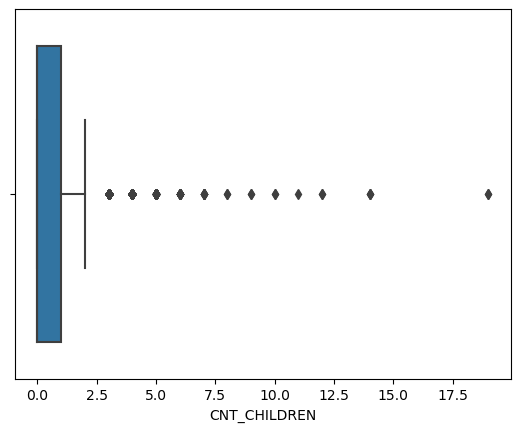

In [88]:
sns.boxplot(x = adf["CNT_CHILDREN"])
plt.show()

In [89]:
adf["CNT_CHILDREN"].value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

**<font color='green'>From the box plot we can see that there are outliers in CNT_CHILDREN column. After checking value counts, it is clear that a few clients have children count upto 19. It is not normal for a person to have more than 3 or 4 children in our present society. But for analysis sake we can consider any number of children above 7 as an outlier. We will delete those rows with more than 7 CNT_CHILDREN**

In [90]:
adf = adf[adf["CNT_CHILDREN"]<8]

In [91]:
adf.shape

(307497, 38)

In [92]:
adf["CNT_CHILDREN"].value_counts()

0    215371
1     61119
2     26749
3      3717
4       429
5        84
6        21
7         7
Name: CNT_CHILDREN, dtype: int64

#### <font color='Red'>AMT_INCOME_TOTAL

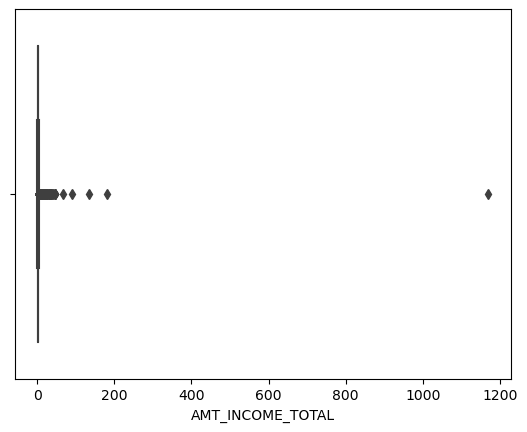

In [93]:
sns.boxplot(x = adf["AMT_INCOME_TOTAL"])
plt.show()

In [94]:
adf["AMT_INCOME_TOTAL"].value_counts()

1.350000       35750
1.125000       31016
1.575000       26556
1.800000       24718
0.900000       22483
2.250000       20696
2.025000       16341
0.675000       11145
2.700000       10826
0.810000        6001
3.150000        5861
2.475000        5344
1.260000        4668
3.600000        4115
1.215000        3848
0.990000        3633
2.925000        3418
1.035000        3329
0.765000        3146
1.440000        3123
1.710000        2647
4.500000        2435
1.170000        2390
0.540000        2318
0.720000        2187
1.665000        2053
0.450000        2042
1.080000        1946
3.375000        1789
0.945000        1747
1.620000        1702
1.890000        1691
4.050000        1660
0.855000        1514
1.485000        1486
2.160000        1406
1.305000        1256
0.585000        1182
0.630000        1145
1.935000        1061
1.530000        1012
2.115000         985
3.825000         966
1.395000         834
1.755000         800
5.400000         758
0.495000         738
2.340000     

**<font color='green'>From the box plot we can see that there are outliers in AMT_INCOME_TOTAL column. After checking value counts, we can conclude that outlier is the max value in the column. We can find out the maximum value and drop the row containing that value.**

In [95]:
adf["AMT_INCOME_TOTAL"].max()

1170.0

In [96]:
adf = adf[adf["AMT_INCOME_TOTAL"] < 1170]

In [97]:
adf["AMT_INCOME_TOTAL"].max()

180.0009

#### <font color='Red'>AMT_CREDIT

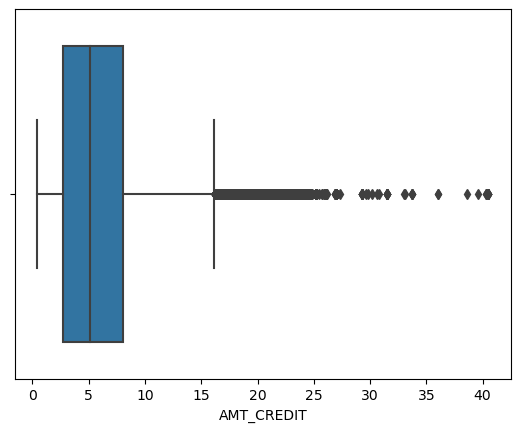

In [98]:
sns.boxplot(x = adf["AMT_CREDIT"])
plt.show()

In [99]:
adf["AMT_CREDIT"].max()

40.5

 **<font color='green'>From the box plot above we can see that there are a few outliers in AMT_INCOME_TOTAL column but they are less than than maximum income. So we will not do any operation on AMT_CREDIT**

#### <font color='Red'>AMT_ANNUITY

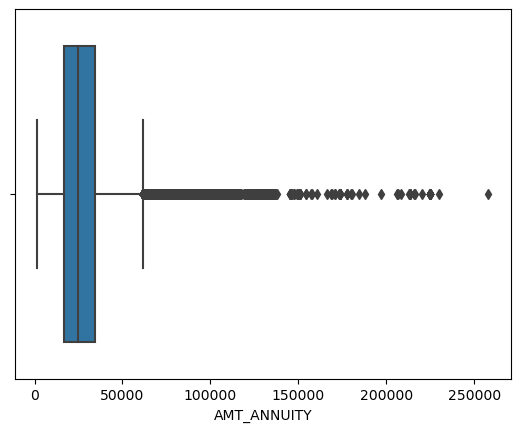

In [100]:
sns.boxplot(x = adf["AMT_ANNUITY"])
plt.show()

In [101]:
adf["AMT_ANNUITY"].describe()

count    307496.000000
mean      27108.553397
std       14493.419638
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

**<font color='green'>From the box plot we can see that there are outliers in AMT_ANNUITY column.We can conclude that outlier is the max value in the column. We can find out the maximum value and drop the row containing that value.**

In [102]:
adf["AMT_ANNUITY"].max()

258025.5

In [103]:
adf = adf[adf["AMT_ANNUITY"] < 258025.5]

#### <font color='Red'>AMT_GOODS_PRICE

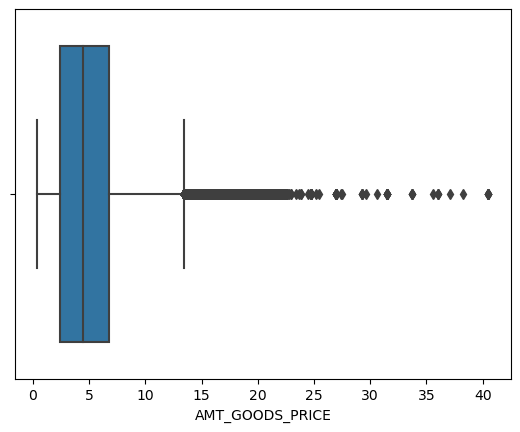

In [104]:
sns.boxplot(x = adf["AMT_GOODS_PRICE"])
plt.show()

In [105]:
adf["AMT_GOODS_PRICE"].describe()

count    307495.000000
mean          5.383089
std           3.692386
min           0.405000
25%           2.385000
50%           4.500000
75%           6.795000
max          40.500000
Name: AMT_GOODS_PRICE, dtype: float64

In [106]:
np.percentile(adf["AMT_GOODS_PRICE"], 99)

18.0

**<font color='green'>From the box plot we can see that there are outlier in YEAR_EMPLOYED column but we not do any operation on the column as the difference between 99th percentile and max value is not too big.**

#### <font color='Red'>YEAR_EMPLOYED

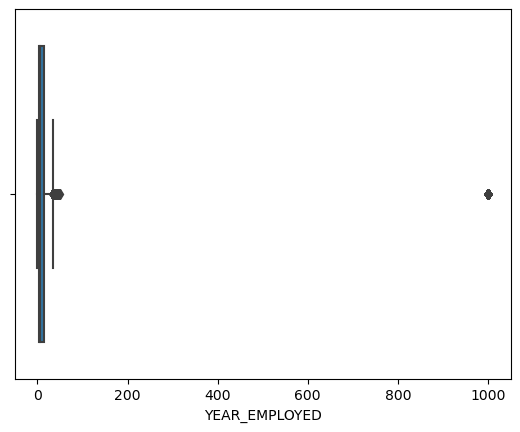

In [107]:
sns.boxplot(x = adf["YEAR_EMPLOYED"])
plt.show()

In [108]:
adf["YEAR_EMPLOYED"].value_counts(normalize = True)*100

1000.665753    18.007772
0.547945        0.050733
0.613699        0.049432
0.545205        0.049106
0.630137        0.049106
0.580822        0.048781
0.627397        0.046505
1.052055        0.046505
0.632877        0.045529
0.567123        0.044879
0.589041        0.044879
0.591781        0.044554
0.515068        0.044554
0.536986        0.044228
0.317808        0.044228
0.608219        0.043903
0.528767        0.043578
0.534247        0.043253
0.586301        0.042928
0.583562        0.042602
0.695890        0.042602
1.043836        0.042277
0.550685        0.041952
0.506849        0.041627
0.638356        0.041627
0.531507        0.041301
0.649315        0.041301
0.641096        0.040976
0.504110        0.040976
0.953425        0.040651
0.572603        0.040651
0.660274        0.040326
2.041096        0.040001
0.375342        0.040001
1.046575        0.039675
0.652055        0.039675
0.380822        0.039675
0.542466        0.039350
0.657534        0.039025
0.523288        0.039025


**<font color='green'>From the box plot we can see that there are outlier in YEAR_EMPLOYED column the value count is too large to be dropped. Instead we can replace the value by np.NaN.**

In [109]:
adf["YEAR_EMPLOYED"] = adf["YEAR_EMPLOYED"].replace([adf["YEAR_EMPLOYED"].max()], np.NaN)

In [110]:
adf["YEAR_EMPLOYED"].value_counts(normalize = True)*100

0.547945     0.061875
0.613699     0.060288
0.545205     0.059892
0.630137     0.059892
0.580822     0.059495
1.052055     0.056719
0.627397     0.056719
0.632877     0.055529
0.567123     0.054735
0.589041     0.054735
0.591781     0.054339
0.515068     0.054339
0.317808     0.053942
0.536986     0.053942
0.608219     0.053546
0.528767     0.053149
0.534247     0.052752
0.586301     0.052356
0.695890     0.051959
0.583562     0.051959
1.043836     0.051562
0.550685     0.051166
0.506849     0.050769
0.638356     0.050769
0.649315     0.050372
0.531507     0.050372
0.641096     0.049976
0.504110     0.049976
0.953425     0.049579
0.572603     0.049579
0.660274     0.049183
0.375342     0.048786
2.041096     0.048786
0.652055     0.048389
1.046575     0.048389
0.380822     0.048389
0.542466     0.047993
0.657534     0.047596
0.597260     0.047596
0.561644     0.047596
0.523288     0.047596
0.323288     0.047199
0.610959     0.047199
0.616438     0.047199
0.621918     0.046803
0.668493  

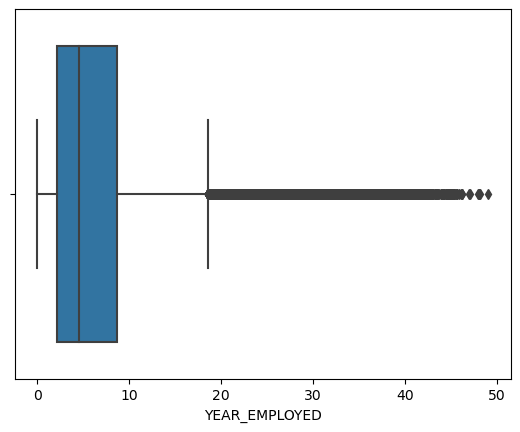

In [111]:
sns.boxplot(x = adf["YEAR_EMPLOYED"])
plt.show()

**<font color='green'>With this we have completed Data cleaning for the first Data set "application_Data". We will now move on to the second Data Set "previous_application".**

### <font color='brown'>b) previous_application.csv

In [112]:
padf.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [113]:
#Check the datatypes of all the columns of the dataframe
padf.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [114]:
#Check the shape of the dataframe
padf.shape

(1670214, 37)

In [115]:
#Check the quantitative spread of this dataset
padf.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

## <font color='indigo'>Checking for Null/Missing Values

In [116]:
#Check the number of null values in the columns
padf.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [117]:
#Percentage of missing values.
padf_per = (100 * padf.isnull().sum()/len(padf))
padf_per

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [118]:
#Columns with high percentage of missing values (> 40%).  
padf_per_40 = padf_per[padf_per > 40] 
padf_per_40

AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
RATE_INTEREST_PRIMARY        99.643698
RATE_INTEREST_PRIVILEGED     99.643698
NAME_TYPE_SUITE              49.119754
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
dtype: float64

 **<font color='green'>We can remove the columns with high percentage of missing values.**

## <font color='indigo'>Missing Value Treatment

In [119]:
padf_null_40 = list(padf_per_40.index)
padf_null_40

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [120]:
#Remove the columns having more than 40% null/missing values.
padf.drop(padf_null_40, axis = 1, inplace = True)

In [121]:
#Shape of the dataframe after dropping the columns with high missing values.
padf.shape

(1670214, 26)

In [122]:
#Percentage of missing values > 0 after dropping the columns with high missing values.
padf_per1 = 100 * padf.isnull().sum()/len(padf)
padf_per1 = padf_per1[padf_per1 > 0]
padf_per1

AMT_ANNUITY            22.286665
AMT_CREDIT              0.000060
AMT_GOODS_PRICE        23.081773
CNT_PAYMENT            22.286366
PRODUCT_COMBINATION     0.020716
dtype: float64

 **<font color='green'>Now we have 5 columns with null values, we can either remove them or impute them. For catagorical data we can use mode() and for quantitative data we can use median to imputate the missing values.**

#### <font color='Red'>AMT_ANNUITY

In [123]:
#Describing "AMT_ANNUITY" column
padf.AMT_ANNUITY.describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

In [124]:
#Impute missing values using median as AMT_ANNUITY is quantitative data and has outliers.
padf["AMT_ANNUITY"] = padf["AMT_ANNUITY"].fillna(padf["AMT_ANNUITY"].median())

#### <font color='Red'>AMT_CREDIT

In [125]:
#Describing "AMT_CREDIT" column
padf.AMT_CREDIT.describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

In [126]:
#Impute missing values using median as AMT_CREDIT is quantitative data and has outliers.
padf["AMT_CREDIT"] = padf["AMT_CREDIT"].fillna(padf["AMT_CREDIT"].median())

#### <font color='Red'>AMT_GOODS_PRICE

In [127]:
#Describing "AMT_GOODS_PRICE" column
padf.AMT_GOODS_PRICE.describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [128]:
#Impute missing values using median as AMT_GOODS_PRICE is quantitative data and has outliers.
padf["AMT_GOODS_PRICE"] = padf["AMT_GOODS_PRICE"].fillna(padf["AMT_GOODS_PRICE"].median())

#### <font color='Red'>CNT_PAYMENT

In [129]:
#Describing "CNT_PAYMENT" column
padf.CNT_PAYMENT.describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

In [130]:
#Impute missing values using median as CNT_PAYMENT is quantitative data and has outliers.
padf["CNT_PAYMENT"] = padf["CNT_PAYMENT"].fillna(padf["CNT_PAYMENT"].median())

#### <font color='Red'>PRODUCT_COMBINATION

In [131]:
#Describing "PRODUCT_COMBINATION" column
padf.PRODUCT_COMBINATION.describe()

count     1669868
unique         17
top          Cash
freq       285990
Name: PRODUCT_COMBINATION, dtype: object

In [132]:
padf.PRODUCT_COMBINATION.value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [133]:
padf["PRODUCT_COMBINATION"].mode()[0]

'Cash'

In [134]:
#Impute missing values using mode as CNT_PAYMENT is catagorical data 
padf["PRODUCT_COMBINATION"] = padf["PRODUCT_COMBINATION"].fillna(padf["PRODUCT_COMBINATION"].mode()[0])

In [135]:
padf.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
dtype: int64

In [136]:
padf.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0            -73  Cash through the bank                XAP         Repeater   
1           -164                    XNA                XAP         Repeater   
2           -301  Cash through the bank                XAP         Repeater   
3           -512  Cash through the bank                XAP         Repeater   
4           -781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0         12.0           middle  POS mobile with interest  
1         36.0       low_action          Cash X-Sell: low  
2         12.0             high         Cash X-Sell: high  
3         12.0           middle       Cash X-Sell: middle  
4         24.0             high         Cash Street: high

#### <font color='Red'>NAME_CONTRACT_TYPE

In [137]:
#Checking for value counts in NAME_CONTRACT_TYPE.
padf.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

In [138]:
#Replacing XNA values with the mode value of the column.
padf["NAME_CONTRACT_TYPE"] = padf["NAME_CONTRACT_TYPE"].replace("XNA", padf["NAME_CONTRACT_TYPE"].mode()[0])

In [139]:
padf.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747899
Consumer loans     729151
Revolving loans    193164
Name: NAME_CONTRACT_TYPE, dtype: int64

## <font color='indigo'>Checking Data Types

In [140]:
padf.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE                    object
SELLERPLACE_AREA                 int64
NAME_SELLER_INDUSTRY            object
CNT_PAYMENT                    float64
NAME_YIELD_GROUP                object
PRODUCT_COMBINATION      

 **<font color='green'>From the above it is safe to assume that the data types of previous_application are correct.**

## <font color='indigo'>Standardization

In [141]:
padf.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0            -73  Cash through the bank                XAP         Repeater   
1           -164                    XNA                XAP         Repeater   
2           -301  Cash through the bank                XAP         Repeater   
3           -512  Cash through the bank                XAP         Repeater   
4           -781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0         12.0           middle  POS mobile with interest  
1         36.0       low_action          Cash X-Sell: low  
2         12.0             high         Cash X-Sell: high  
3         12.0           middle       Cash X-Sell: middle  
4         24.0             high         Cash Street: high

**<font color='green'>From the above we can see that there are -ve values in DAYS_DECISION, SELLERPLACE_AREA. Since days and area cannot be negative we can change the values to positive.**

In [142]:
padf[["DAYS_DECISION","SELLERPLACE_AREA"]].head()

DAYS_DECISION  SELLERPLACE_AREA
0            -73                35
1           -164                -1
2           -301                -1
3           -512                -1
4           -781                -1

In [143]:
#Converting the -ve values in both columns to +ve.
padf["DAYS_DECISION"] = abs(padf["DAYS_DECISION"])
padf["SELLERPLACE_AREA"] = abs(padf["SELLERPLACE_AREA"])

In [144]:
padf[["DAYS_DECISION","SELLERPLACE_AREA"]].head()

DAYS_DECISION  SELLERPLACE_AREA
0             73                35
1            164                 1
2            301                 1
3            512                 1
4            781                 1

In [145]:
padf["DAYS_DECISION"].value_counts()

245     2444
238     2390
210     2375
273     2350
196     2315
224     2305
252     2300
182     2283
240     2279
231     2270
183     2268
239     2241
259     2232
217     2205
266     2201
209     2193
203     2182
280     2175
189     2171
287     2170
294     2170
211     2152
181     2148
175     2138
268     2132
270     2129
230     2125
329     2118
272     2114
244     2110
300     2109
249     2104
308     2101
276     2094
208     2092
364     2088
243     2084
260     2081
216     2079
265     2069
279     2066
269     2063
184     2056
246     2052
251     2049
188     2047
241     2046
195     2044
236     2028
219     2028
301     2027
232     2018
213     2017
336     2016
267     2016
275     2010
315     2010
237     2005
168     2003
205     1998
229     1993
328     1993
235     1991
271     1990
202     1980
197     1977
233     1976
288     1967
293     1962
330     1959
256     1956
242     1953
264     1952
257     1950
176     1949
350     1949
212     1949

In [146]:
padf["SELLERPLACE_AREA"].value_counts()

1          767950
0           60523
50          37401
30          34423
20          33840
100         31409
40          24429
25          18142
15          17175
150         16652
10          16523
5           14942
200         12819
4           12797
1000        12589
60          10943
35          10468
1500         9887
300          9308
2000         8723
45           8487
80           8029
70           7881
6            7411
500          6335
32           5547
3            5472
1200         4864
250          4696
36           4538
42           4503
2            4374
24           4341
120          4252
34           4117
140          3918
400          3852
18           3846
55           3687
3000         3669
38           3614
12           3599
21           3585
145          3542
90           3474
28           3461
31           3428
23           3410
1600         3386
600          3357
44           3338
130          3338
2200         3265
33           3262
149          3140
26        

## <font color='indigo'>Outlier Detection and Handling

In [147]:
padf.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.670214e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.490651e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.317751e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  7.547096e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  1.682403e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
count  1.670214e+06     1.670214e+06             1.670214e+06   
mean   1.961140e+05     2.011815e+05             1.248418e+01   
std    3.185745e+05     2.808629e+05             3.334028e+00   
min    0.000000e+00     0.000000e+00             0.000000e+00   
25%    2.416050e+04     6.750000e+04             1.000000e+01   
50%    8.054100e+04     1.123200e+05             1.200000e+01   
75%    2.164185e+05     1.804050e+05             1.500000e+01   
max    6.905160e+06     6.905160e+06             2.300000e+01   

       NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  
count            1.670214e+06   1.670214e+06      1.670214e+06  1.670214e+06  
mean             9.964675e-01   8.806797e+02      3.148644e+02  1.515057e+01  
std              5.932963e-02   7.790997e+02      7.127403e+03  1.295220e+01  
min              0.000000e+00   1.000000e+00      0.000000e+00  0.000000e+00  
25%              1.000000e+00   2.800000e+02      1.000000e+00  1.000000e+01  
50%              1.000000e+00   5.810000e+02      3.000000e+00  1.200000e+01  
75%              1.000000e+00   1.300000e+03      8.200000e+01  1.600000e+01  
max              1.000000e+00   2.922000e+03      4.000000e+06  8.400000e+01

**<font color='green'>From the above statistical statistical details, we can see that the columns AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE are having outliers.**

In [148]:
outliers_cols = ["AMT_ANNUITY", "AMT_APPLICATION", "AMT_CREDIT", "AMT_GOODS_PRICE"]

In [149]:
outliers_cols

['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE']

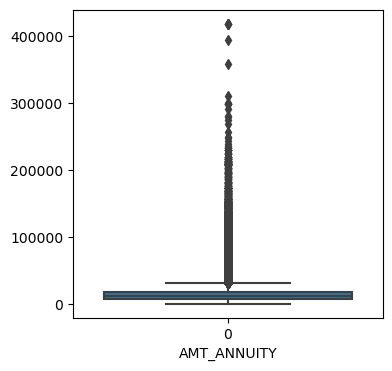

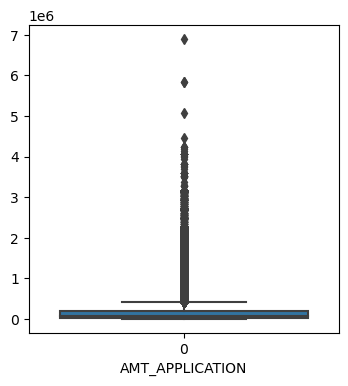

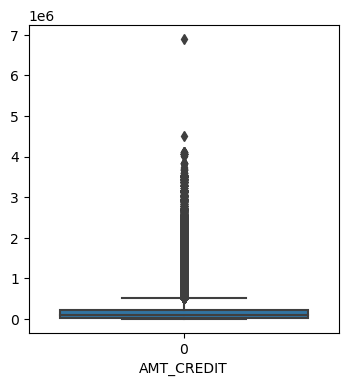

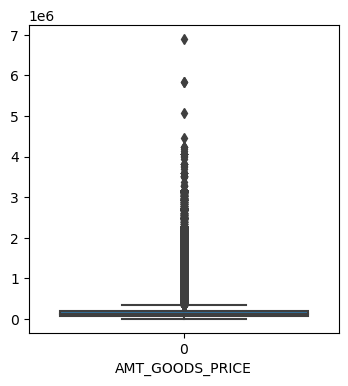

In [150]:


for i in outliers_cols:
    plt.figure(figsize = (4,4))
    sns.boxplot(padf[i])
    plt.xlabel(i)
    plt.show()

**<font color='green'> From the above plots we can confirm that there are outliers in columns AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE. We are not removing/imputing the outliers, instead we will segregate the values in buckets.**

In [151]:
#Segregating AMT_ANNUITY into buckets.
padf["AMT_ANNUITY_RANGE"] = pd.cut(padf['AMT_ANNUITY'], bins=[0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,1100000] , labels=["0-1L", "1L-2L","2L-3L", "3L-4L", "4L-5L", "5L-6L", "6L-7L", "7L-8L", "8L-9L", "9L-10L", "10L+"])

In [152]:
#Segregating AMT_APPLICATION into buckets.
padf["AMT_APPLICATION_RANGE"] = pd.cut(padf['AMT_APPLICATION'], bins=[0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,1100000] , labels=["0-1L", "1L-2L","2L-3L", "3L-4L", "4L-5L", "5L-6L", "6L-7L", "7L-8L", "8L-9L", "9L-10L", "10L+"])

In [153]:
#Segregating AMT_CREDIT into buckets.
padf["AMT_CREDIT_RANGE"] = pd.cut(padf['AMT_CREDIT'], bins=[0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,1100000] , labels=["0-1L", "1L-2L","2L-3L", "3L-4L", "4L-5L", "5L-6L", "6L-7L", "7L-8L", "8L-9L", "9L-10L", "10L+"])

In [154]:
#Segregating AMT_GOODS_PRICE into buckets.
padf["AMT_GOODS_PRICE_RANGE"] = pd.cut(padf['AMT_GOODS_PRICE'], bins=[0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,1100000] , labels=["0-1L", "1L-2L","2L-3L", "3L-4L", "4L-5L", "5L-6L", "6L-7L", "7L-8L", "8L-9L", "9L-10L", "10L+"])

In [155]:
padf.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0             73  Cash through the bank                XAP         Repeater   
1            164                    XNA                XAP         Repeater   
2            301  Cash through the bank                XAP         Repeater   
3            512  Cash through the bank                XAP         Repeater   
4            781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                 1                  XNA   
2  Credit and cash offices                 1                  XNA   
3  Credit and cash offices                 1                  XNA   
4  Credit and cash offices                 1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION AMT_ANNUITY_RANGE  \
0         12.0           middle  POS mobile with interest              0-1L   
1         36.0       low_action          Cash X-Sell: low              0-1L   
2         12.0             high         Cash X-Sell: high              0-1L   
3         12.0           middle       Cash X-Sell: middle              0-1L   
4         24.0             high         Cash Street: high              0-1L   

  AMT_APPLICATION_RANGE AMT_CREDIT_RANGE AMT_GOODS_PRICE_RANGE  
0                  0-1L             0-1L                  0-1L  
1                 6L-7L            6L-7L                 6L-7L  
2                 1L-2L            1L-2L                 1L-2L  
3                 4L-5L            4L-5L                 4L-5L  
4                 3L-4L            4L-5L                 3L-4L

In [332]:
padf.shape

(1670214, 30)

### <font color='Brown'>With this we have concluded the Data Cleaning.

## <font color='indigo'>Data Analysis

### <font color='brown'>a) application_data.csv

#### <font color='Red'>TARGET

### <font color='brown'>Checking the imbalance Percentage

In [156]:
#Calculating number of clients in each catagory
adf["TARGET"].value_counts()

0    282674
1     24821
Name: TARGET, dtype: int64

In [157]:
# Calculating Imbalance percentage
adf["TARGET"].value_counts(normalize = True)*100

0    91.927999
1     8.072001
Name: TARGET, dtype: float64

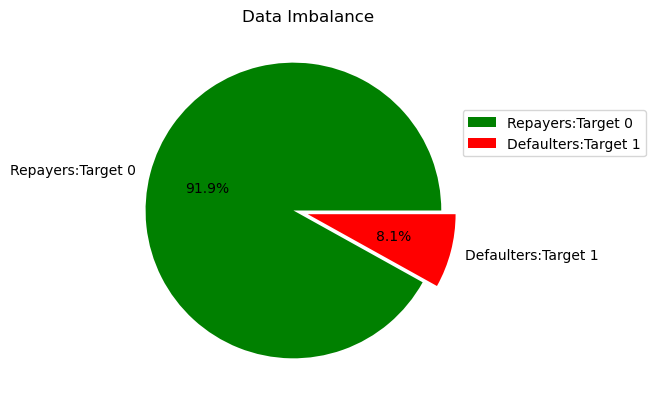

In [158]:
# Plotting pie chart for data imbalance.
explode = (0.1, 0)
adf.groupby('TARGET').size().plot(kind='pie', legend=True, labels= ["Repayers:Target 0", "Defaulters:Target 1"], explode=explode, autopct='%1.1f%%',colors=['green', 'red'])
plt.title('Data Imbalance')
plt.legend(bbox_to_anchor=(0.9,0.8))
plt.show()

**<font color='green'>TARGET column has 8.07% clients that have payment difficulties and 91.9% are having no difficulties**

**<font color='green'>We can divide the "adf_padf" dataset based on the Target Variable.**

**<font color='green'>TARGET ==> Target variable**
    
**<font color='green'>1 ==> client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample.**
    
**<font color='green'>0 ==> client with no payment difficulties**

In [159]:
#Dividing the dataset "adf_padf" based on Target Variable 1
T1 = adf[adf['TARGET']== 1]

In [160]:
T1.shape

(24821, 38)

In [161]:
T1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0       100002       1         Cash loans           M             0   
26      100031       1         Cash loans           F             0   
40      100047       1         Cash loans           M             0   
42      100049       1         Cash loans           F             0   
81      100096       1         Cash loans           F             0   

    AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0              2.025    4.065975      24700.5            3.510   
26             1.125    9.799920      27076.5            7.020   
40             2.025   11.935800      35028.0            8.550   
42             1.350    2.888730      16258.5            2.385   
81             0.810    2.520000      14593.5            2.520   

   NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0    Unaccompanied               Working  Secondary / secondary special   
26   Unaccompanied               Working  Secondary / secondary special   
40   Unaccompanied  Commercial associate  Secondary / secondary special   
42   Unaccompanied               Working  Secondary / secondary special   
81   Unaccompanied             Pensioner  Secondary / secondary special   

      NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0   Single / not married  House / apartment        Laborers                1   
26                 Widow  House / apartment   Cooking staff                1   
40               Married  House / apartment        Laborers                2   
42        Civil marriage  House / apartment     Sales staff                2   
81               Married  House / apartment        Laborers                2   

         ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  \
0   Business Entity Type 3      0.262949      0.139376   
26  Business Entity Type 3      0.548477      0.190706   
40  Business Entity Type 3      0.306841      0.320163   
42           Self-employed      0.674203      0.399676   
81                     XNA      0.023952      0.720944   

    OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                        2.0                       2.0   
26                      10.0                       1.0   
40                       0.0                       0.0   
42                       1.0                       0.0   
81                       1.0                       1.0   

    OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  FLAG_DOCUMENT_3  \
0                        2.0                       2.0                1   
26                      10.0                       0.0                1   
40                       0.0                       0.0                1   
42                       1.0                       0.0                1   
81                       1.0                       1.0                0   

    AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                          0.0                        0.0   
26                         0.0                        0.0   
40                         0.0                        0.0   
42                         0.0                        0.0   
81                         0.0                        0.0   

    AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                          0.0                        0.0   
26                         0.0                        0.0   
40                         0.0                        2.0   
42                         0.0                        0.0   
81                         0.0                        0.0   

    AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  YEAR_BIRTH  \
0                         0.0                         1.0   25.920548   
26                        2.0                         2.0   51.298630   
40                        0.0                         4.0   47.895890   
42                        0.0                         2.0   36.668493   


In [162]:
#Dividing the dataset "adf_padf" based on Target Variable 0
T0 = adf[adf['TARGET']== 0]

In [163]:
T0.shape

(282674, 38)

In [164]:
T0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             0   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   
5      100008       0         Cash loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
1             2.700   12.935025      35698.5           11.295   
2             0.675    1.350000       6750.0            1.350   
3             1.350    3.126825      29686.5            2.970   
4             1.215    5.130000      21865.5            5.130   
5             0.990    4.904955      27517.5            4.545   

   NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
1           Family    State servant               Higher education   
2    Unaccompanied          Working  Secondary / secondary special   
3    Unaccompanied          Working  Secondary / secondary special   
4    Unaccompanied          Working  Secondary / secondary special   
5  Spouse, partner    State servant  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
1               Married  House / apartment      Core staff                2   
2  Single / not married  House / apartment        Laborers                1   
3        Civil marriage  House / apartment        Laborers                2   
4  Single / not married  House / apartment      Core staff                1   
5               Married  House / apartment        Laborers                2   

        ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  \
1                  School      0.622246      0.535276   
2              Government      0.555912      0.729567   
3  Business Entity Type 3      0.650442      0.535276   
4                Religion      0.322738      0.535276   
5                   Other      0.354225      0.621226   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
1                       1.0                       0.0   
2                       0.0                       0.0   
3                       2.0                       0.0   
4                       0.0                       0.0   
5                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  FLAG_DOCUMENT_3  \
1                       1.0                       0.0                1   
2                       0.0                       0.0                0   
3                       2.0                       0.0                1   
4                       0.0                       0.0                0   
5                       0.0                       0.0                1   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   
5                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   
5                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  YEAR_BIRTH  \
1                        0.0                         0.0   45.931507   
2                        0.0                         0.0   52.180822   
3                        0.0                         1.0   52.068493   
4                        0.0                         0.0   54.608219   
5                        1.0                         1.0   46.413699   

   YEAR_E

## <font color='brown'>Univariate analysis

#### <font color='Red'>Gender

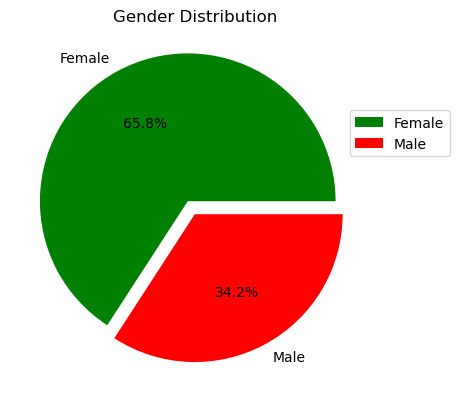

In [165]:
# Plotting pie chart for data imbalance.
explode = (0.1, 0)
adf.groupby('CODE_GENDER').size().plot(kind='pie', legend=True, labels= ["Female", "Male"], explode=explode, autopct='%1.1f%%',colors=['green', 'red'])
plt.title('Gender Distribution')
plt.legend(bbox_to_anchor=(0.9,0.8))
plt.show()

**<font color='green'>From the above plot we can note Female customer applied for loan more than male customers.**

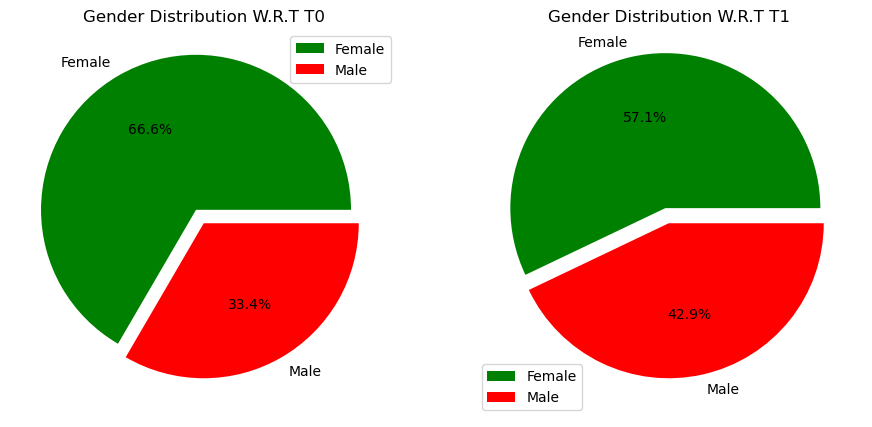

In [166]:
# Plotting the Gender Distribution

plt.figure(figsize = (11, 6))
plt.margins(x=1)
plt.subplot(1, 2, 1)
plt.ylim(0, 220000)
plt.title('Gender Distribution W.R.T T0')
T0.groupby('CODE_GENDER').size().plot(kind='pie', legend=True, labels= ["Female", "Male"], explode=explode, autopct='%1.1f%%',colors=['green', 'red'])

plt.subplot(1, 2, 2)
plt.title('Gender Distribution W.R.T T1')
plt.ylim(0, 80000)
T1.groupby('CODE_GENDER').size().plot(kind='pie', legend=True, labels= ["Female", "Male"], explode=explode, autopct='%1.1f%%',colors=['green', 'red'])
plt.show()


**<font color='green'>66.6% Female clients are non-defaulters while 33.4% male clients are non-defaulters.**

**<font color='green'>57.1% Female clients are defaulters while 42.9% male clients are defaulters.**

### <font color='brown'>Quantitative Data

#### <font color='Red'>Age_Range

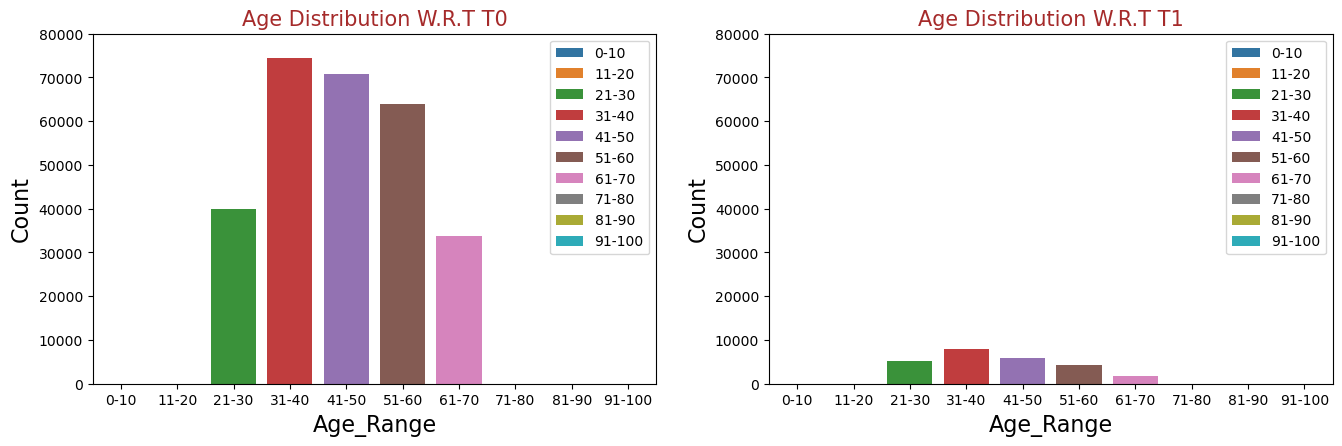

In [167]:
# Numeric variable analysis for T0 dataframe
plt.figure(figsize = (16, 10))
plt.subplot(2, 2, 1)
plt.ylim(0, 80000)
plt.title('Age Distribution W.R.T T0', fontdict={'fontsize': 15, 'fontweight' : 7, 'color' : 'Brown'})
sns.countplot(data = T0, x = "Age_Range", hue = "Age_Range", dodge=False)
plt.legend(loc='upper right')
plt.xlabel("Age_Range", fontsize=16)
plt.ylabel("Count", fontsize=16)

# Numeric variable analysis for T1 dataframe
plt.subplot(2, 2, 2)
plt.title('Age Distribution W.R.T T1', fontdict={'fontsize': 15, 'fontweight' : 7, 'color' : 'Brown'})
plt.ylim(0, 80000)
sns.countplot(data = T1, x = 'Age_Range', hue = "Age_Range", dodge=False)
plt.legend(loc='upper right')
plt.xlabel("Age_Range", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.show()

**<font color='green'>From the above plot we can note that customer without payment difficulties are in the age range of 30-40 years and also 40-50 years**
    
**<font color='green'>Customers age range of 30-40 years and 40-50 years can be targeted as they are more likely to apply for loan.**

#### <font color='Red'>Exp_Range

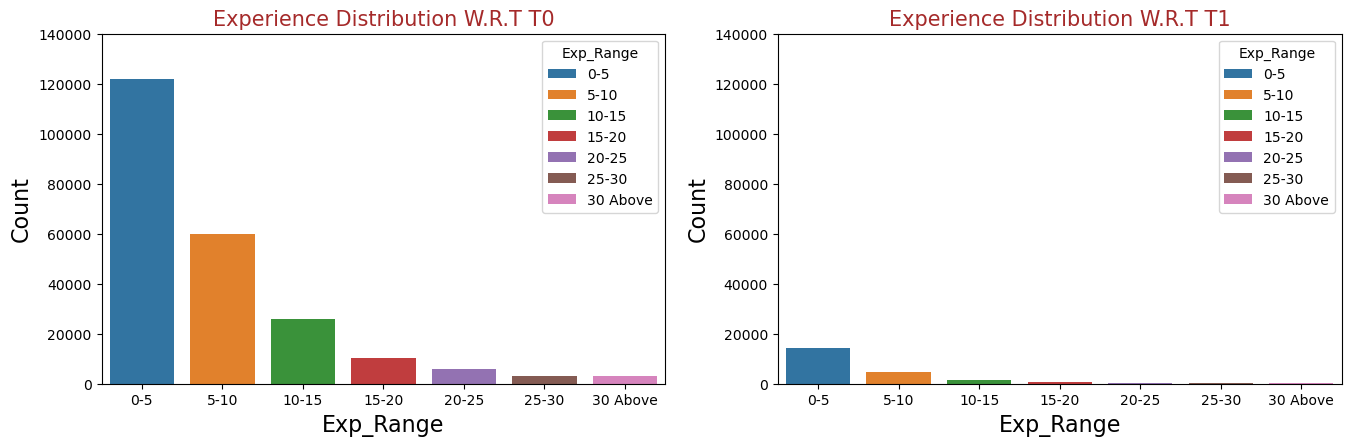

In [168]:
# Numeric variable analysis for T0 dataframe
plt.figure(figsize = (16, 10))
plt.subplot(2, 2, 1)
plt.ylim(0, 140000)
plt.title('Experience Distribution W.R.T T0', fontdict={'fontsize': 15, 'fontweight' : 7, 'color' : 'Brown'})
sns.countplot(data = T0, x = "Exp_Range", hue = "Exp_Range", dodge=False)
plt.xlabel("Exp_Range", fontsize=16)
plt.ylabel("Count", fontsize=16)

# Numeric variable analysis for T1 dataframe
plt.subplot(2, 2, 2)
plt.title('Experience Distribution W.R.T T1', fontdict={'fontsize': 15, 'fontweight' : 7, 'color' : 'Brown'})
plt.ylim(0, 140000)
sns.countplot(data = T1, x = 'Exp_Range', hue = "Exp_Range", dodge=False)
plt.xlabel("Exp_Range", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.show()

**<font color='green'>From the above plot we can note that max customers in their early stages of career apply for a loan and number of customers applying for a loan is declining as their experience increases.**
    
**<font color='green'>Customers Exp range of 0-5 years can be targeted as they are more likely to apply for loan.**

#### <font color='Red'>AMT_INCOME_TOTAL_Range

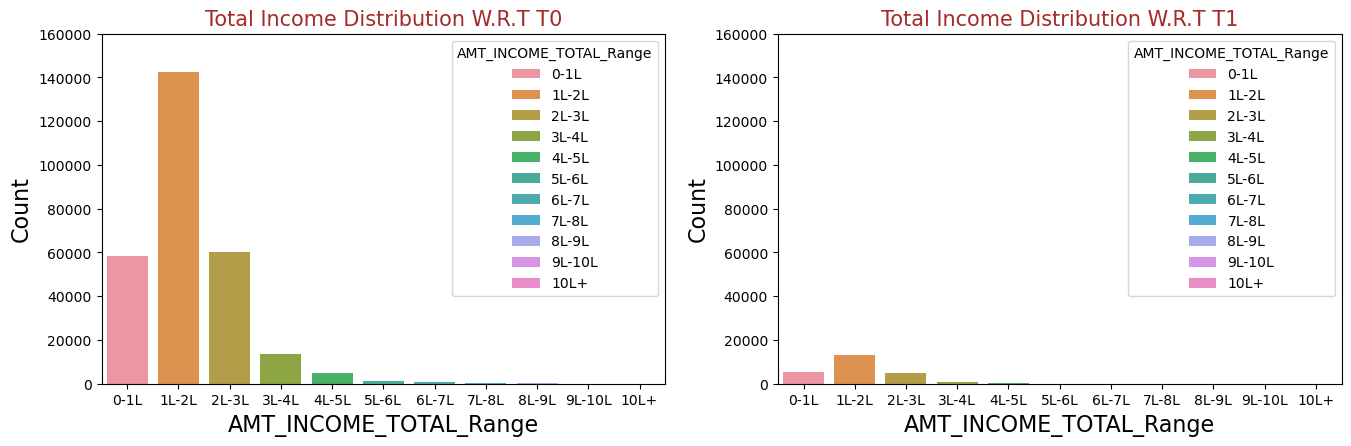

In [169]:
# Numeric variable analysis for T0 dataframe
plt.figure(figsize = (16, 10))
plt.subplot(2, 2, 1)
plt.ylim(0, 160000)
plt.title('Total Income Distribution W.R.T T0', fontdict={'fontsize': 15, 'fontweight' : 7, 'color' : 'Brown'})
sns.countplot(data = T0, x = "AMT_INCOME_TOTAL_Range", hue = "AMT_INCOME_TOTAL_Range", dodge=False)
plt.xlabel("AMT_INCOME_TOTAL_Range", fontsize=16)
plt.ylabel("Count", fontsize=16)
# Numeric variable analysis for T1 dataframe
plt.subplot(2, 2, 2)
plt.title('Total Income Distribution W.R.T T1', fontdict={'fontsize': 15, 'fontweight' : 7, 'color' : 'Brown'})
plt.ylim(0, 160000)
sns.countplot(data = T1, x = 'AMT_INCOME_TOTAL_Range', hue = "AMT_INCOME_TOTAL_Range", dodge=False)
plt.xlabel("AMT_INCOME_TOTAL_Range", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.show()

**<font color='green'>From the above plot we can note that max customers without any repaying difficulties are having a salary range of 1L - 2L.**
    
**<font color='green'>Customers total income of 1L - 2L can be targeted as they are more likely to apply for loan.**

#### <font color='Red'>AMT_CREDIT_Range

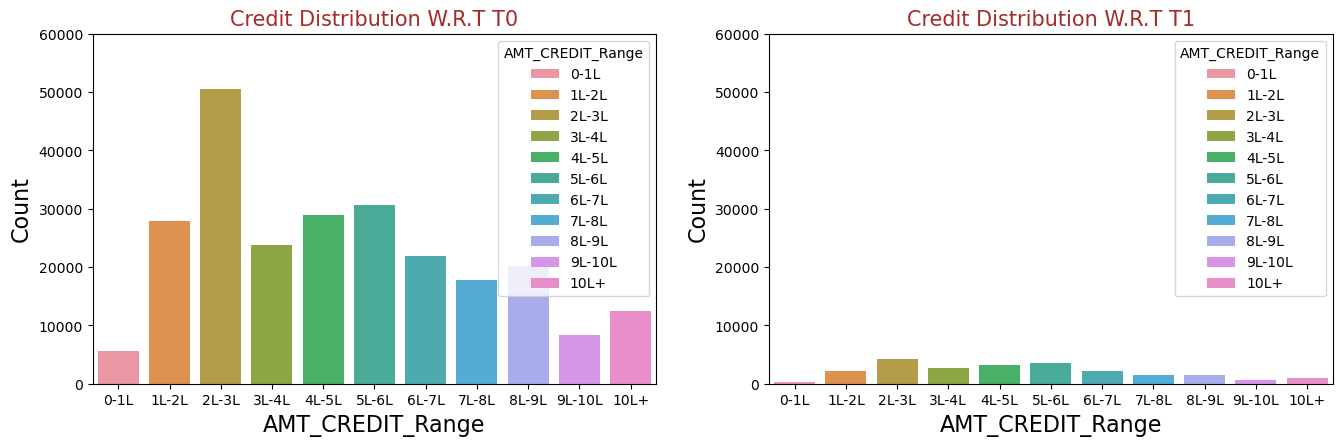

In [170]:
# Numeric variable analysis for T0 dataframe
plt.figure(figsize = (16, 10))
plt.subplot(2, 2, 1)
plt.ylim(0, 60000)
plt.title('Credit Distribution W.R.T T0', fontdict={'fontsize': 15, 'fontweight' : 7, 'color' : 'Brown'})
sns.countplot(data = T0, x = "AMT_CREDIT_Range", hue = "AMT_CREDIT_Range", dodge=False)
plt.xlabel("AMT_CREDIT_Range", fontsize=16)
plt.ylabel("Count", fontsize=16)

# Numeric variable analysis for T1 dataframe
plt.subplot(2, 2, 2)
plt.title("Credit Distribution W.R.T T1", fontdict={'fontsize': 15, 'fontweight' : 7, 'color' : 'Brown'})
plt.ylim(0, 60000)
sns.countplot(data = T1, x = 'AMT_CREDIT_Range', hue = "AMT_CREDIT_Range", dodge=False)
plt.xlabel("AMT_CREDIT_Range", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.show()

**<font color='green'>From the above plot we can note that max customers having a credit range of 2L - 3L are having less payment difficulties.**
    
**<font color='green'>Customers having 2L - 3L can be targeted as they are less likely to default.**

#### <font color='Red'>AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE

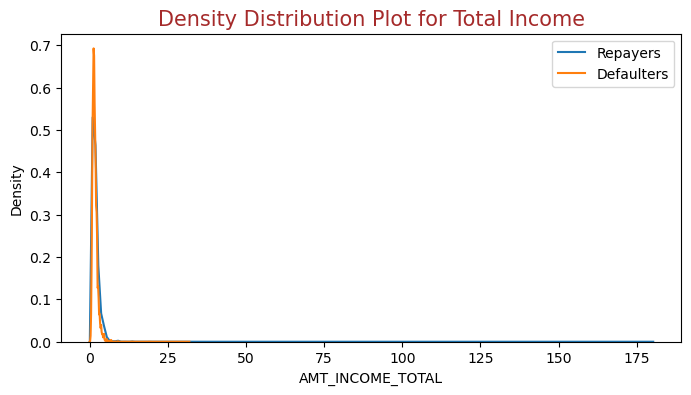

In [423]:
#Distribution plot to find density of AMT_INCOME_TOTAL
plt.figure(figsize=(8,4))
sns.distplot(T0['AMT_INCOME_TOTAL'], hist = False, label="Repayers")
sns.distplot(T1['AMT_INCOME_TOTAL'], hist = False, label="Defaulters")
plt.title("Density Distribution Plot for Total Income", fontdict={'fontsize': 15, 'fontweight' : 7, 'color' : 'Brown'}) 
plt.legend()
plt.show() 

**<font color='green'>From the above plot we can note that max customers under both Repayers and Defaulters are concentrated at an income range of 0L to 4L**

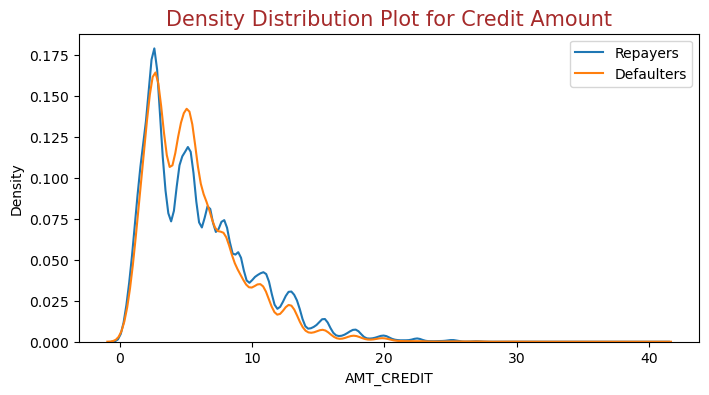

In [422]:
#Distribution plot to find density of AMT_CREDIT
plt.figure(figsize=(8,4))
sns.distplot(T0['AMT_CREDIT'], hist = False, label="Repayers")
sns.distplot(T1['AMT_CREDIT'], hist = False, label="Defaulters")
plt.title("Density Distribution Plot for Credit Amount", fontdict={'fontsize': 15, 'fontweight' : 7, 'color' : 'Brown'}) 
plt.legend()
plt.show() 

**<font color='green'>From the above plot we can note that credit amount of loan distributed is under 10L. We can see that as the loan amount increases the no of loans distributed decreases for both Repayers and Defaulters.**

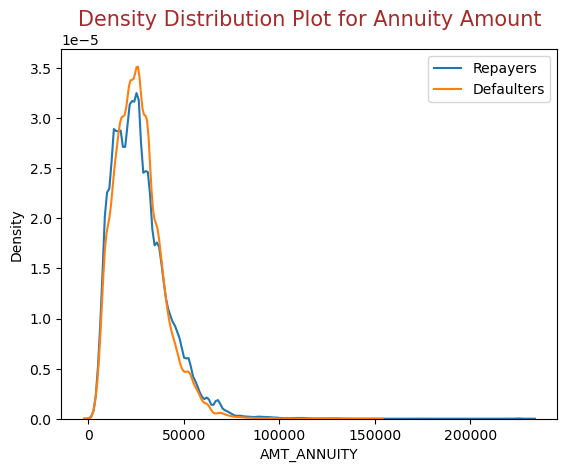

In [424]:
sns.distplot(T0['AMT_ANNUITY'], hist = False, label="Repayers")
sns.distplot(T1['AMT_ANNUITY'], hist = False, label="Defaulters")
plt.title('Density Distribution Plot for Annuity Amount', fontdict={'fontsize': 15, 'fontweight' : 7, 'color' : 'Brown'})
plt.legend()
plt.show()

**<font color='green'>From the above plot we can note that max customers under both Repayers and Defaulters pay annuity amount under 50000.**

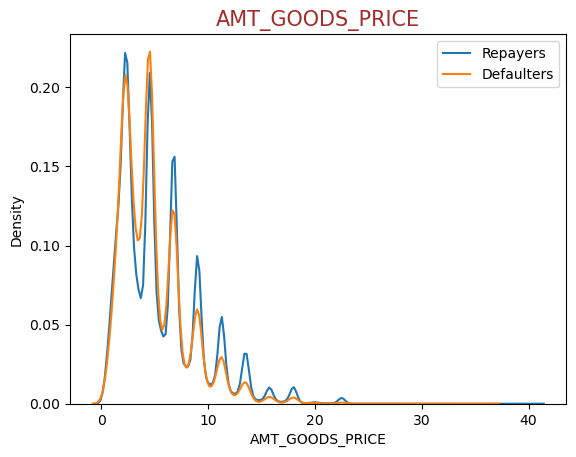

In [243]:
sns.distplot(T0['AMT_GOODS_PRICE'], hist = False, label="Repayers")
sns.distplot(T1['AMT_GOODS_PRICE'], hist = False, label="Defaulters")
plt.title('AMT_GOODS_PRICE',fontdict={'fontsize': 15, 'fontweight' : 7, 'color' : 'Brown'})
plt.legend()
plt.show()

**<font color='green'>From the above plot we can note that max loans distributed for Goods price less than 10L. However the goods price and loan amount distributed fluctuates even inside the 10L bucket.**

### <font color='brown'>Catagorical Data

In [175]:
adf.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             0   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  \
0             2.025    4.065975      24700.5            3.510   Unaccompanied   
1             2.700   12.935025      35698.5           11.295          Family   
2             0.675    1.350000       6750.0            1.350   Unaccompanied   
3             1.350    3.126825      29686.5            2.970   Unaccompanied   
4             1.215    5.130000      21865.5            5.130   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE OCCUPATION_TYPE  CNT_FAM_MEMBERS       ORGANIZATION_TYPE  \
0  House / apartment        Laborers                1  Business Entity Type 3   
1  House / apartment      Core staff                2                  School   
2  House / apartment        Laborers                1              Government   
3  House / apartment        Laborers                2  Business Entity Type 3   
4  House / apartment      Core staff                1                Religion   

   EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0      0.262949      0.139376                       2.0   
1      0.622246      0.535276                       1.0   
2      0.555912      0.729567                       0.0   
3      0.650442      0.535276                       2.0   
4      0.322738      0.535276                       0.0   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       0.0                       1.0   
2                       0.0                       0.0   
3                       0.0                       2.0   
4                       0.0                       0.0   

   DEF_60_CNT_SOCIAL_CIRCLE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  \
0                       2.0                1                         0.0   
1                       0.0                1                         0.0   
2                       0.0                0                         0.0   
3                       0.0                1                         0.0   
4                       0.0                0                         0.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        0.0                         0.0   
4                        0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  YEAR_BIRTH  YEAR_EMPLOYED  YEAR_REGISTRATION  \
0                         1.0   25.920548       1.745205           9.994521   
1                         0.0   45.931507       3.254795           3.249315   
2                         0.0   52.180822       0

#### <font color='Red'>NAME_INCOME_TYPE

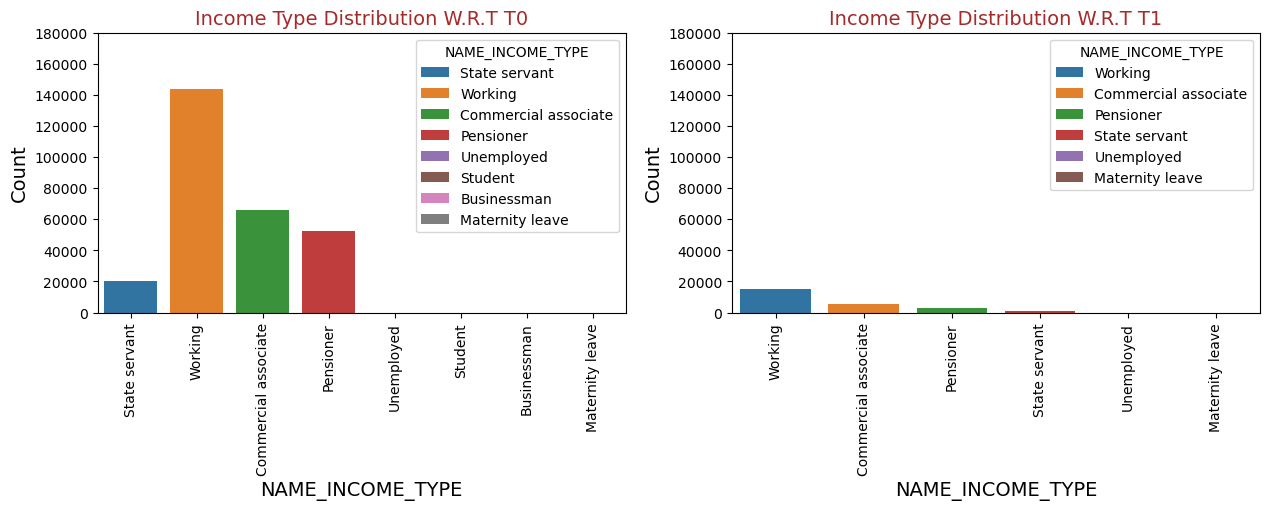

In [426]:
# Catagorical variable analysis for T0 dataframe
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.ylim(0, 180000)
plt.title('Income Type Distribution W.R.T T0',fontdict={'fontsize': 14, 'fontweight' : 7, 'color' : 'Brown'})
sns.countplot(data = T0, x = "NAME_INCOME_TYPE",  hue='NAME_INCOME_TYPE', dodge=False)
plt.xticks(rotation = 90)
plt.xlabel("NAME_INCOME_TYPE", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Numeric variable analysis for T1 dataframe
plt.subplot(2, 2, 2)
plt.title('Income Type Distribution W.R.T T1',fontdict={'fontsize': 14, 'fontweight' : 7, 'color' : 'Brown'})
plt.ylim(0, 180000)
sns.countplot(data = T1, x = 'NAME_INCOME_TYPE', hue='NAME_INCOME_TYPE', dodge=False)
plt.xlabel("NAME_INCOME_TYPE", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation = 90)
plt.show()

**<font color='green'>From the above plot we can note that max customers under working catagory have less payment difficulties.**
    
**<font color='green'>Customers under working catagory can be targeted as they are less likely to default.**

#### <font color='Red'>NAME_EDUCATION_TYPE

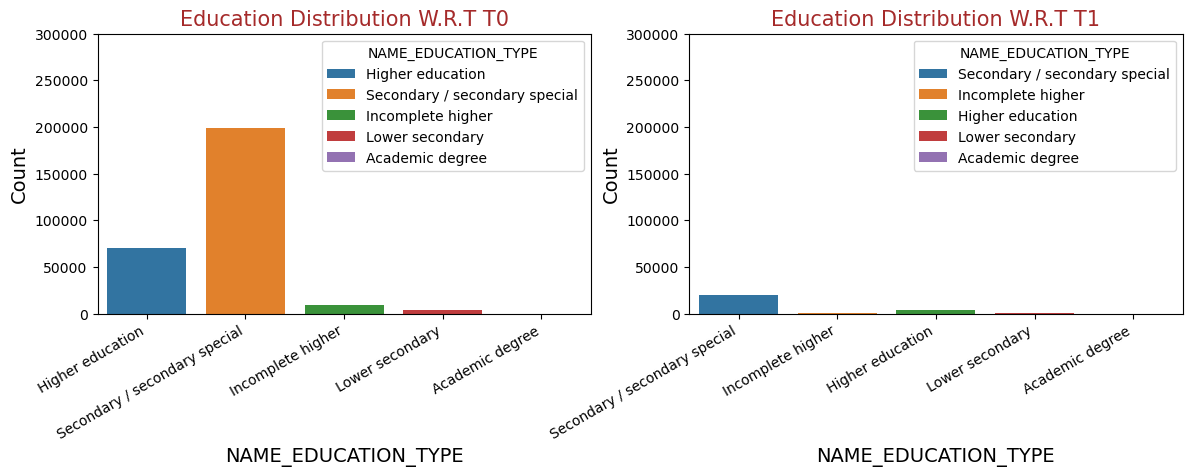

In [434]:
# Catagorical variable analysis for T0 dataframe
plt.figure(figsize = (14, 8))
plt.subplot(2, 2, 1)
plt.ylim(0, 300000)
plt.title('Education Distribution W.R.T T0', fontdict={'fontsize': 15, 'fontweight' : 7, 'color' : 'Brown'})
sns.countplot(data = T0, x = "NAME_EDUCATION_TYPE", hue='NAME_EDUCATION_TYPE', dodge=False)
plt.xticks(rotation = 30, horizontalalignment='right')
plt.xlabel("NAME_EDUCATION_TYPE", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Numeric variable analysis for T1 dataframe
plt.subplot(2, 2, 2)
plt.title('Education Distribution W.R.T T1', fontdict={'fontsize': 15, 'fontweight' : 7, 'color' : 'Brown'})
plt.ylim(0, 300000)
sns.countplot(data = T1, x = 'NAME_EDUCATION_TYPE', hue='NAME_EDUCATION_TYPE', dodge=False)
plt.xticks(rotation = 30, horizontalalignment='right')
plt.xlabel("NAME_EDUCATION_TYPE", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

**<font color='green'>From the above plot we can note that max customers with Secondary/secondary special Education have less payment difficulties.**
    
**<font color='green'>Customers with Secondary/secondary special Education can be targeted as they are less likely to default.**

#### <font color='Red'>NAME_FAMILY_STATUS

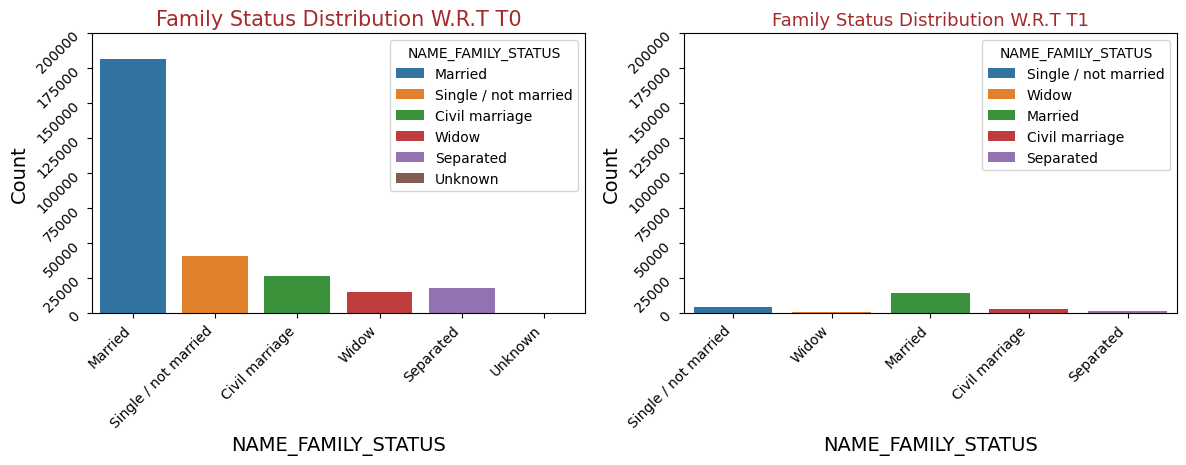

In [435]:
# Catagorical variable analysis for T0 dataframe
plt.figure(figsize = (14, 8))
plt.subplot(2, 2, 1)
plt.ylim(0, 200000)
plt.title('Family Status Distribution W.R.T T0',fontdict={'fontsize': 15, 'fontweight' : 7, 'color' : 'Brown'})
sns.countplot(data = T0, x = "NAME_FAMILY_STATUS",hue='NAME_FAMILY_STATUS', dodge=False)
plt.xticks(rotation = 90)
plt.xlabel("NAME_FAMILY_STATUS", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation = 45,horizontalalignment='right')
plt.yticks(rotation = 45)

# Numeric variable analysis for T1 dataframe
plt.subplot(2, 2, 2)
plt.title('Family Status Distribution W.R.T T1',fontdict={'fontsize': 13, 'fontweight' : 7, 'color' : 'Brown'})
plt.ylim(0, 200000)
sns.countplot(data = T1, x = 'NAME_FAMILY_STATUS', hue='NAME_FAMILY_STATUS', dodge=False)
plt.xticks(rotation = 90)
plt.xlabel("NAME_FAMILY_STATUS", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation = 45,horizontalalignment='right')
plt.yticks(rotation = 45)
plt.show()

**<font color='green'>From the above plot we can note that max customers who are married have less payment difficulties.**
    
**<font color='green'>Customers who are married can be targeted as they are less likely to default.**

#### <font color='Red'>NAME_HOUSING_TYPE

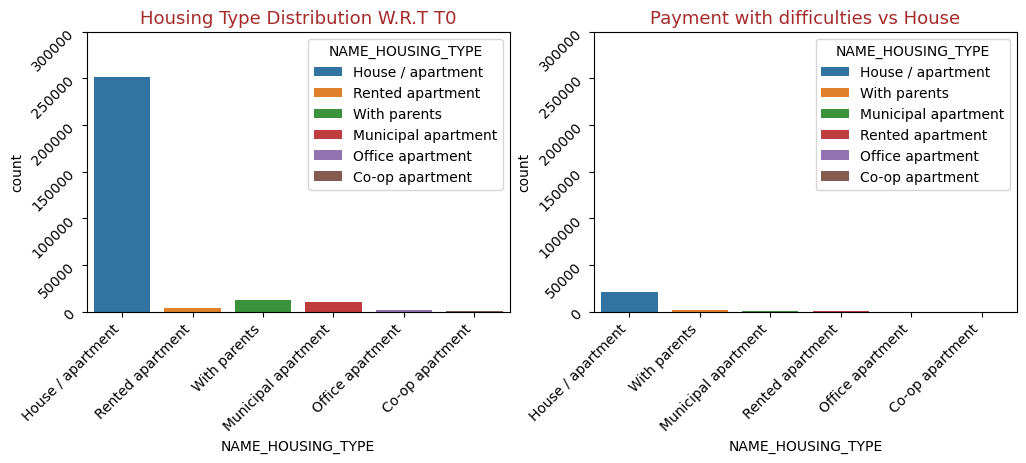

In [436]:
# Catagorical variable analysis for T0 dataframe
plt.figure(figsize = (12, 8))
plt.subplot(2, 2, 1)
plt.ylim(0, 300000)
plt.title('Housing Type Distribution W.R.T T0', fontdict={'fontsize': 13, 'fontweight' : 7, 'color' : 'Brown'})
sns.countplot(data = T0, x = "NAME_HOUSING_TYPE", hue='NAME_HOUSING_TYPE', dodge=False )
plt.xticks(rotation = 90)
plt.xticks(rotation = 45,horizontalalignment='right')
plt.yticks(rotation = 45)

# Numeric variable analysis for T1 dataframe
plt.subplot(2, 2, 2)
plt.title('Payment with difficulties vs House', fontdict={'fontsize': 13, 'fontweight' : 7, 'color' : 'Brown'})
plt.ylim(0, 300000)
sns.countplot(data = T1, x = 'NAME_HOUSING_TYPE', hue='NAME_HOUSING_TYPE', dodge=False)
plt.xticks(rotation = 90)
plt.xticks(rotation = 45,horizontalalignment='right')
plt.yticks(rotation = 45)
plt.show()

**<font color='green'>From the above plot we can note that customers owning House/Apartment have less payment difficulties.**
    
**<font color='green'>Customers who are owning House/Apartment can be targeted as they are less likely to default. Customers in Office apartment and Co-op apartment can be avoided as they bring very less business to the bank.**

## <font color='violet'>Correlation Matrix

In [180]:
T0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             0   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   
5      100008       0         Cash loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
1             2.700   12.935025      35698.5           11.295   
2             0.675    1.350000       6750.0            1.350   
3             1.350    3.126825      29686.5            2.970   
4             1.215    5.130000      21865.5            5.130   
5             0.990    4.904955      27517.5            4.545   

   NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
1           Family    State servant               Higher education   
2    Unaccompanied          Working  Secondary / secondary special   
3    Unaccompanied          Working  Secondary / secondary special   
4    Unaccompanied          Working  Secondary / secondary special   
5  Spouse, partner    State servant  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
1               Married  House / apartment      Core staff                2   
2  Single / not married  House / apartment        Laborers                1   
3        Civil marriage  House / apartment        Laborers                2   
4  Single / not married  House / apartment      Core staff                1   
5               Married  House / apartment        Laborers                2   

        ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  \
1                  School      0.622246      0.535276   
2              Government      0.555912      0.729567   
3  Business Entity Type 3      0.650442      0.535276   
4                Religion      0.322738      0.535276   
5                   Other      0.354225      0.621226   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
1                       1.0                       0.0   
2                       0.0                       0.0   
3                       2.0                       0.0   
4                       0.0                       0.0   
5                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  FLAG_DOCUMENT_3  \
1                       1.0                       0.0                1   
2                       0.0                       0.0                0   
3                       2.0                       0.0                1   
4                       0.0                       0.0                0   
5                       0.0                       0.0                1   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   
5                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   
5                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  YEAR_BIRTH  \
1                        0.0                         0.0   45.931507   
2                        0.0                         0.0   52.180822   
3                        0.0                         1.0   52.068493   
4                        0.0                         0.0   54.608219   
5                        1.0                         1.0   46.413699   

   YEAR_E

In [416]:
# For creating correlation we will select the continous/appropriate columns.
T0_corr = T0[["SK_ID_CURR","TARGET", "CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "CNT_FAM_MEMBERS", "OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", "YEAR_BIRTH", "YEAR_EMPLOYED", "YEAR_REGISTRATION", "YEAR_ID_PUBLISH"]]


In [417]:
#Correlation between numeric variable for Target = 0 
T0_corr.corr()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
SK_ID_CURR                  1.000000     NaN     -0.000863          0.001779   
TARGET                           NaN     NaN           NaN               NaN   
CNT_CHILDREN               -0.000863     NaN      1.000000          0.027745   
AMT_INCOME_TOTAL            0.001779     NaN      0.027745          1.000000   
AMT_CREDIT                 -0.000288     NaN      0.003273          0.342692   
AMT_ANNUITY                 0.000169     NaN      0.021079          0.418836   
AMT_GOODS_PRICE            -0.000176     NaN     -0.000402          0.349313   
CNT_FAM_MEMBERS            -0.002907     NaN      0.877632          0.034523   
OBS_30_CNT_SOCIAL_CIRCLE   -0.000698     NaN      0.014680         -0.028646   
DEF_30_CNT_SOCIAL_CIRCLE    0.000563     NaN     -0.002725         -0.028029   
OBS_60_CNT_SOCIAL_CIRCLE   -0.000743     NaN      0.014356         -0.028506   
DEF_60_CNT_SOCIAL_CIRCLE    0.002381     NaN     -0.002537         -0.027913   
YEAR_BIRTH                  0.001348     NaN     -0.338761         -0.062616   
YEAR_EMPLOYED               0.000018     NaN     -0.063268          0.030121   
YEAR_REGISTRATION           0.001464     NaN     -0.186971         -0.064911   
YEAR_ID_PUBLISH             0.000087     NaN      0.028961         -0.022918   

                          AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
SK_ID_CURR                 -0.000288     0.000169        -0.000176   
TARGET                           NaN          NaN              NaN   
CNT_CHILDREN                0.003273     0.021079        -0.000402   
AMT_INCOME_TOTAL            0.342692     0.418836         0.349313   
AMT_CREDIT                  1.000000     0.771260         0.987019   
AMT_ANNUITY                 0.771260     1.000000         0.776361   
AMT_GOODS_PRICE             0.987019     0.776361         1.000000   
CNT_FAM_MEMBERS             0.064923     0.076125         0.063134   
OBS_30_CNT_SOCIAL_CIRCLE   -0.000177    -0.012449        -0.000217   
DEF_30_CNT_SOCIAL_CIRCLE   -0.019415    -0.022165        -0.020714   
OBS_60_CNT_SOCIAL_CIRCLE   -0.000159    -0.012254        -0.000236   
DEF_60_CNT_SOCIAL_CIRCLE   -0.021844    -0.023051        -0.022896   
YEAR_BIRTH                  0.047369    -0.012271         0.044643   
YEAR_EMPLOYED               0.087541     0.052553         0.088661   
YEAR_REGISTRATION          -0.013462    -0.039401        -0.015875   
YEAR_ID_PUBLISH             0.001427    -0.014185         0.003636   

                          CNT_FAM_MEMBERS  OBS_30_CNT_SOCIAL_CIRCLE  \
SK_ID_CURR                      -0.002907                 -0.000698   
TARGET                                NaN                       NaN   
CNT_CHILDREN                     0.877632                  0.014680   
AMT_INCOME_TOTAL                 0.034523                 -0.028646   
AMT_CREDIT                       0.064923                 -0.000177   
AMT_ANNUITY                      0.076125                 -0.012449   
AMT_GOODS_PRICE                  0.063134                 -0.000217   
CNT_FAM_MEMBERS                  1.000000                  0.023819   
OBS_30_CNT_SOCIAL_CIRCLE         0.023819                  1.000000   
DEF_30_CNT_SOCIAL_CIRCLE        -0.004351                  0.329606   
OBS_60_CNT_SOCIAL_CIRCLE         0.023513                  0.998511   
DEF_60_CNT_SOCIAL_CIRCLE        -0.005744                  0.253372   
YEAR_BIRTH                      -0.286679                 -0.007535   
YEAR_EMPLOYED                   -0.031525                  0.000797   
YEAR_REGISTRATION               -0.176319                 -0.008284   
YEAR_ID_PUBLISH                  0.020550                  0.012419   

                          DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
SK_ID_CURR                                0.000563                 -0.000743   
TARGET                                         NaN                       NaN   
CNT_CHILDREN              

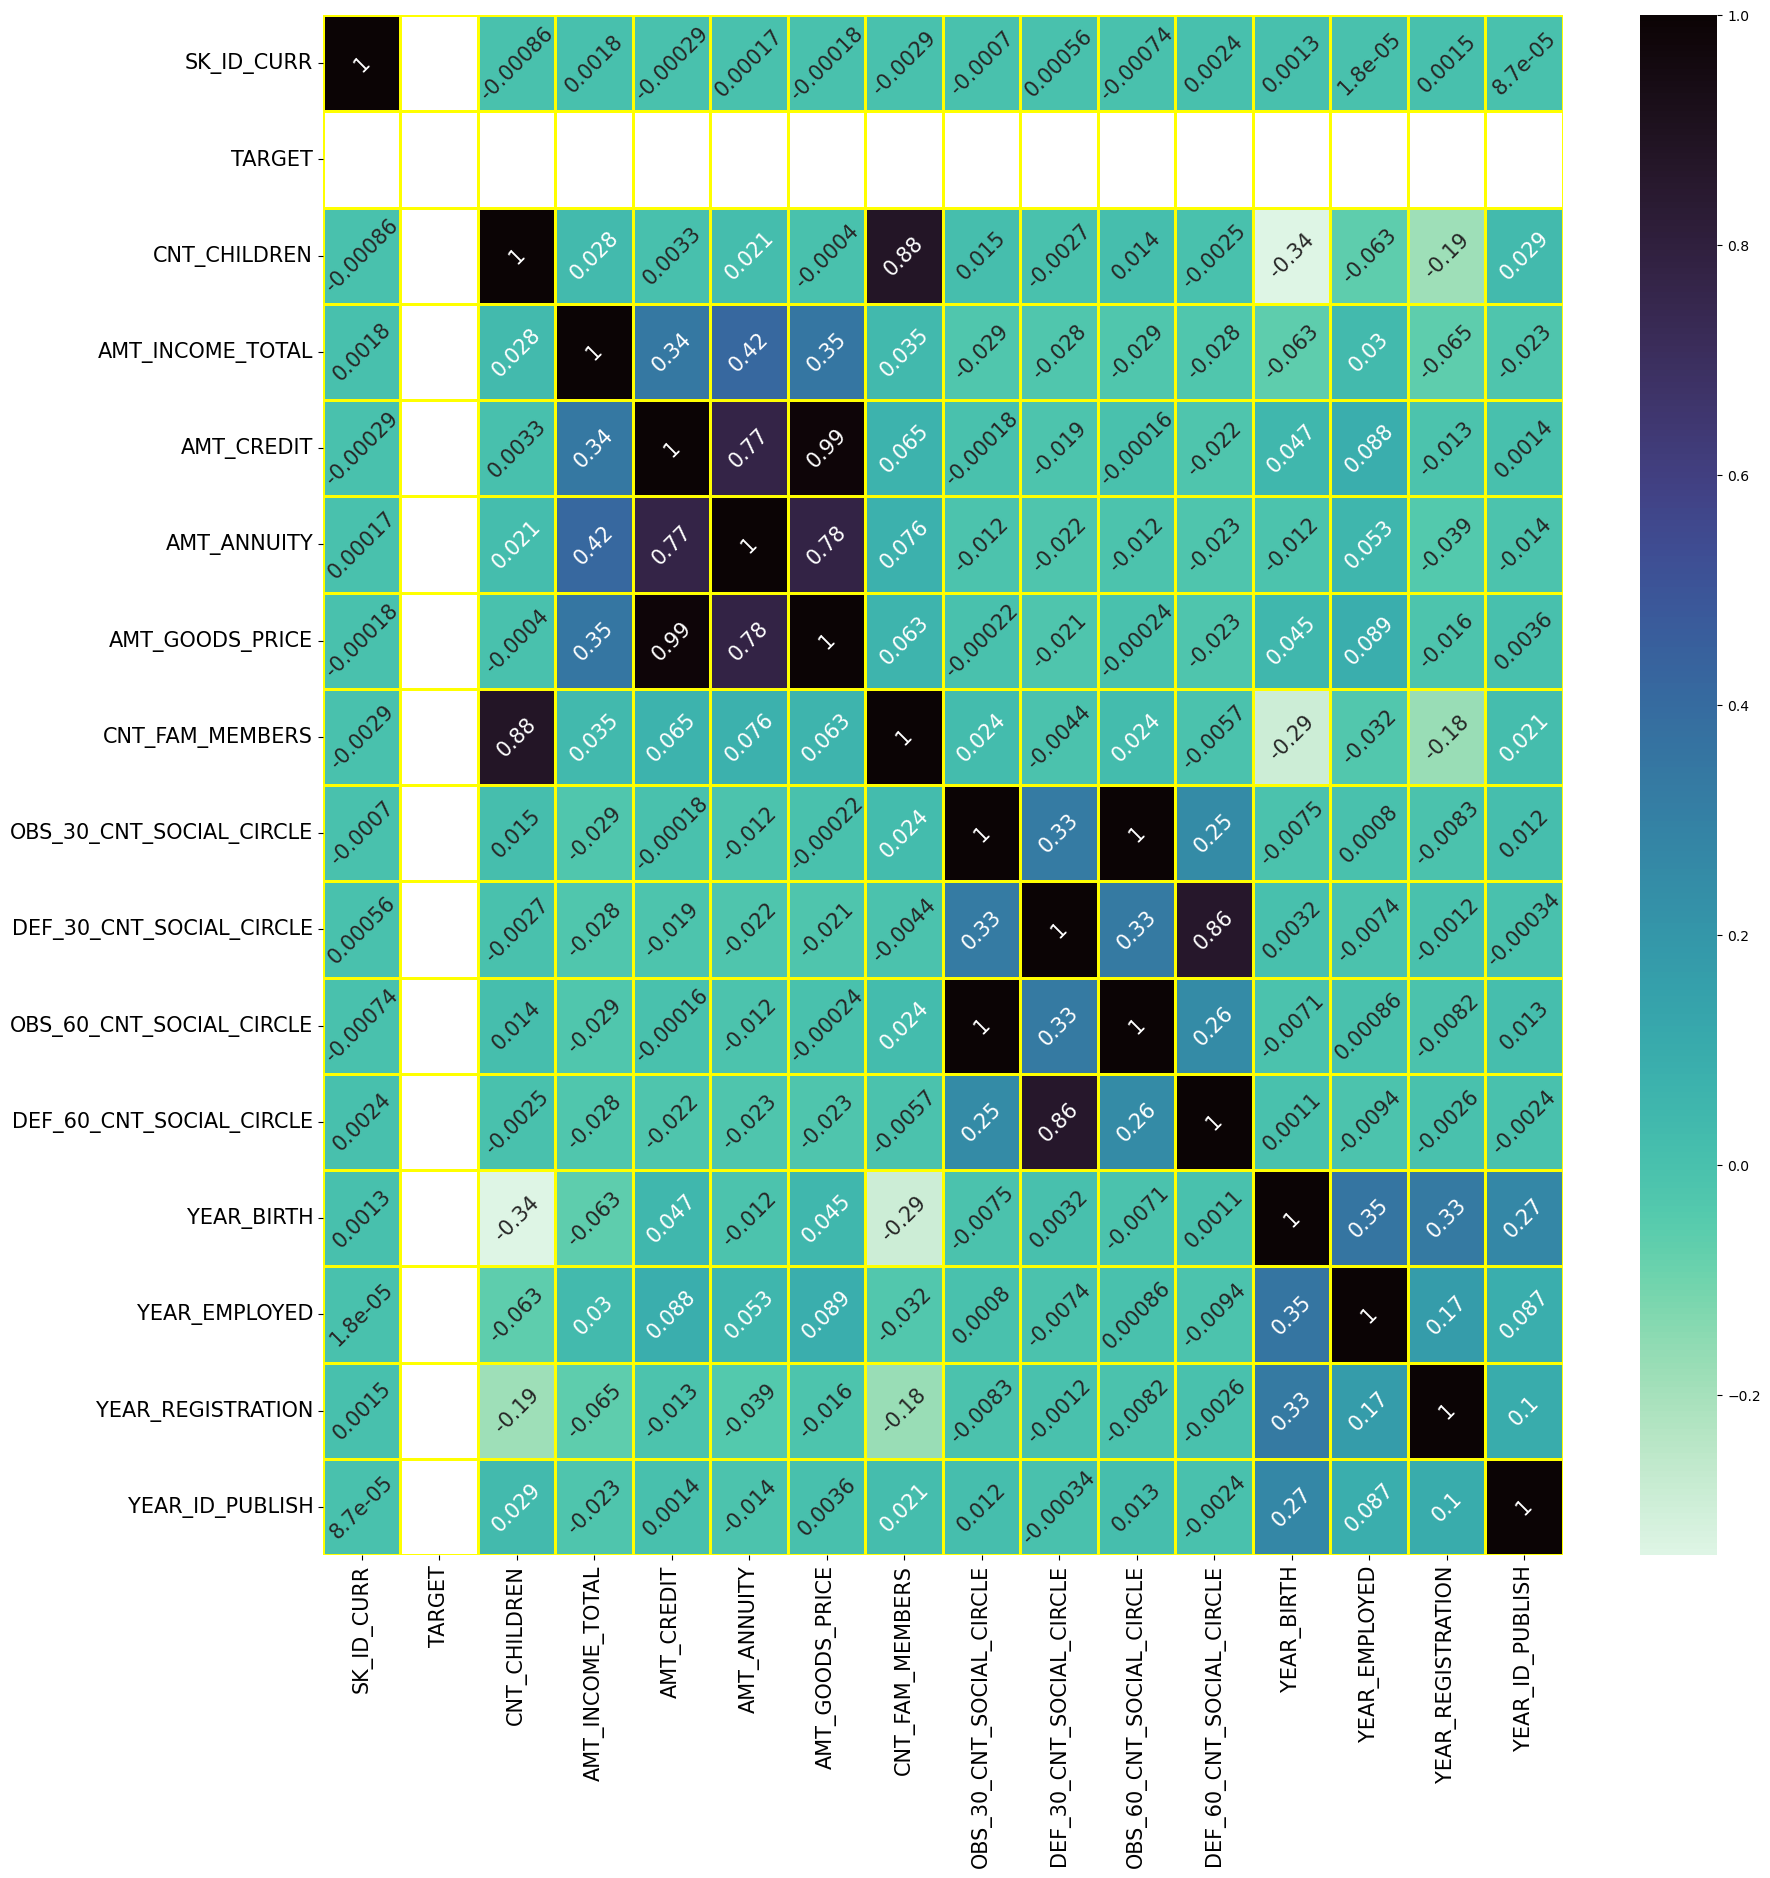

In [444]:
plt.figure(figsize = (20,20))
sns.heatmap(T0_corr.corr(),  annot=True, annot_kws={'size': 15,'rotation':45}, cmap="mako_r", linewidth = 1, linecolor="yellow").tick_params(labelsize=15)
plt.show()

**<font color='green'>From the above heat map we can note the following.**

**<font color='Blue'>Highly Positively Correlated Variables.**

**<font color='green'>- AMT_CREDIT vs AMT_GOODS_PRICE**

**<font color='green'>- AMT_CREDIT vs AMT_ANNUITY**

**<font color='green'>- AMT_ANNUITY vs AMT_GOODS_PRICE**

**<font color='green'>- CNT_FAM_MEMBERS vs CNT_CHILDREN**

**<font color='green'>-DEF_30_CNT_SOCIAL_CIRCLE vs DEF_60_CNT_SOCIAL_CIRCLE**

**<font color='green'>-OBS_30_CNT_SOCIAL_CIRCLE vs OBS_60_CNT_SOCIAL_CIRCLE**

**<font color='Blue'>Highly Negatively Correlated Variables.**

**<font color='green'>- There are no Highly Negatively Correlated Variables.**



In [184]:
# For creating correlation we will select the continous/appropriate columns.
T1_corr = T1[["TARGET", "CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "CNT_FAM_MEMBERS", "OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", "YEAR_BIRTH", "YEAR_EMPLOYED", "YEAR_REGISTRATION", "YEAR_ID_PUBLISH"]]


In [185]:
#Correlation between numeric variable for Target = 0 
T1_corr.corr()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
SK_ID_CURR                  1.000000     NaN     -0.004358         -0.001343   
TARGET                           NaN     NaN           NaN               NaN   
CNT_CHILDREN               -0.004358     NaN      1.000000          0.001179   
AMT_INCOME_TOTAL           -0.001343     NaN      0.001179          1.000000   
AMT_CREDIT                 -0.001200     NaN     -0.002493          0.325338   
AMT_ANNUITY                -0.007488     NaN      0.030982          0.398252   
AMT_GOODS_PRICE            -0.001746     NaN     -0.008870          0.327407   
CNT_FAM_MEMBERS            -0.003203     NaN      0.884181          0.009215   
OBS_30_CNT_SOCIAL_CIRCLE   -0.009428     NaN      0.026518         -0.006093   
DEF_30_CNT_SOCIAL_CIRCLE   -0.005499     NaN      0.001207         -0.024168   
OBS_60_CNT_SOCIAL_CIRCLE   -0.009090     NaN      0.025880         -0.005390   
DEF_60_CNT_SOCIAL_CIRCLE   -0.009344     NaN     -0.005671         -0.024068   
YEAR_BIRTH                  0.001197     NaN     -0.261351          0.002674   
YEAR_EMPLOYED              -0.000604     NaN     -0.033046          0.029514   
YEAR_REGISTRATION          -0.006355     NaN     -0.149827         -0.038488   
YEAR_ID_PUBLISH             0.002468     NaN      0.032490          0.003697   

                          AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
SK_ID_CURR                 -0.001200    -0.007488        -0.001746   
TARGET                           NaN          NaN              NaN   
CNT_CHILDREN               -0.002493     0.030982        -0.008870   
AMT_INCOME_TOTAL            0.325338     0.398252         0.327407   
AMT_CREDIT                  1.000000     0.752184         0.982785   
AMT_ANNUITY                 0.752184     1.000000         0.752289   
AMT_GOODS_PRICE             0.982785     0.752289         1.000000   
CNT_FAM_MEMBERS             0.050876     0.075708         0.047081   
OBS_30_CNT_SOCIAL_CIRCLE    0.019883     0.005438         0.020572   
DEF_30_CNT_SOCIAL_CIRCLE   -0.025503    -0.021810        -0.021356   
OBS_60_CNT_SOCIAL_CIRCLE    0.020268     0.006471         0.021044   
DEF_60_CNT_SOCIAL_CIRCLE   -0.030469    -0.026991        -0.025800   
YEAR_BIRTH                  0.135304     0.014295         0.135708   
YEAR_EMPLOYED               0.106081     0.049110         0.111962   
YEAR_REGISTRATION           0.025874    -0.034262         0.025669   
YEAR_ID_PUBLISH             0.052400     0.016828         0.056149   

                          CNT_FAM_MEMBERS  OBS_30_CNT_SOCIAL_CIRCLE  \
SK_ID_CURR                      -0.003203                 -0.009428   
TARGET                                NaN                       NaN   
CNT_CHILDREN                     0.884181                  0.026518   
AMT_INCOME_TOTAL                 0.009215                 -0.006093   
AMT_CREDIT                       0.050876                  0.019883   
AMT_ANNUITY                      0.075708                  0.005438   
AMT_GOODS_PRICE                  0.047081                  0.020572   
CNT_FAM_MEMBERS                  1.000000                  0.044659   
OBS_30_CNT_SOCIAL_CIRCLE         0.044659                  1.000000   
DEF_30_CNT_SOCIAL_CIRCLE         0.007009                  0.333997   
OBS_60_CNT_SOCIAL_CIRCLE         0.043974                  0.998270   
DEF_60_CNT_SOCIAL_CIRCLE        -0.001109                  0.261165   
YEAR_BIRTH                      -0.204363                  0.005186   
YEAR_EMPLOYED                    0.001540                  0.031036   
YEAR_REGISTRATION               -0.146155                 -0.014127   
YEAR_ID_PUBLISH                  0.031893                  0.020203   

                          DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
SK_ID_CURR                               -0.005499                 -0.009090   
TARGET                                         NaN                       NaN   
CNT_CHILDREN              

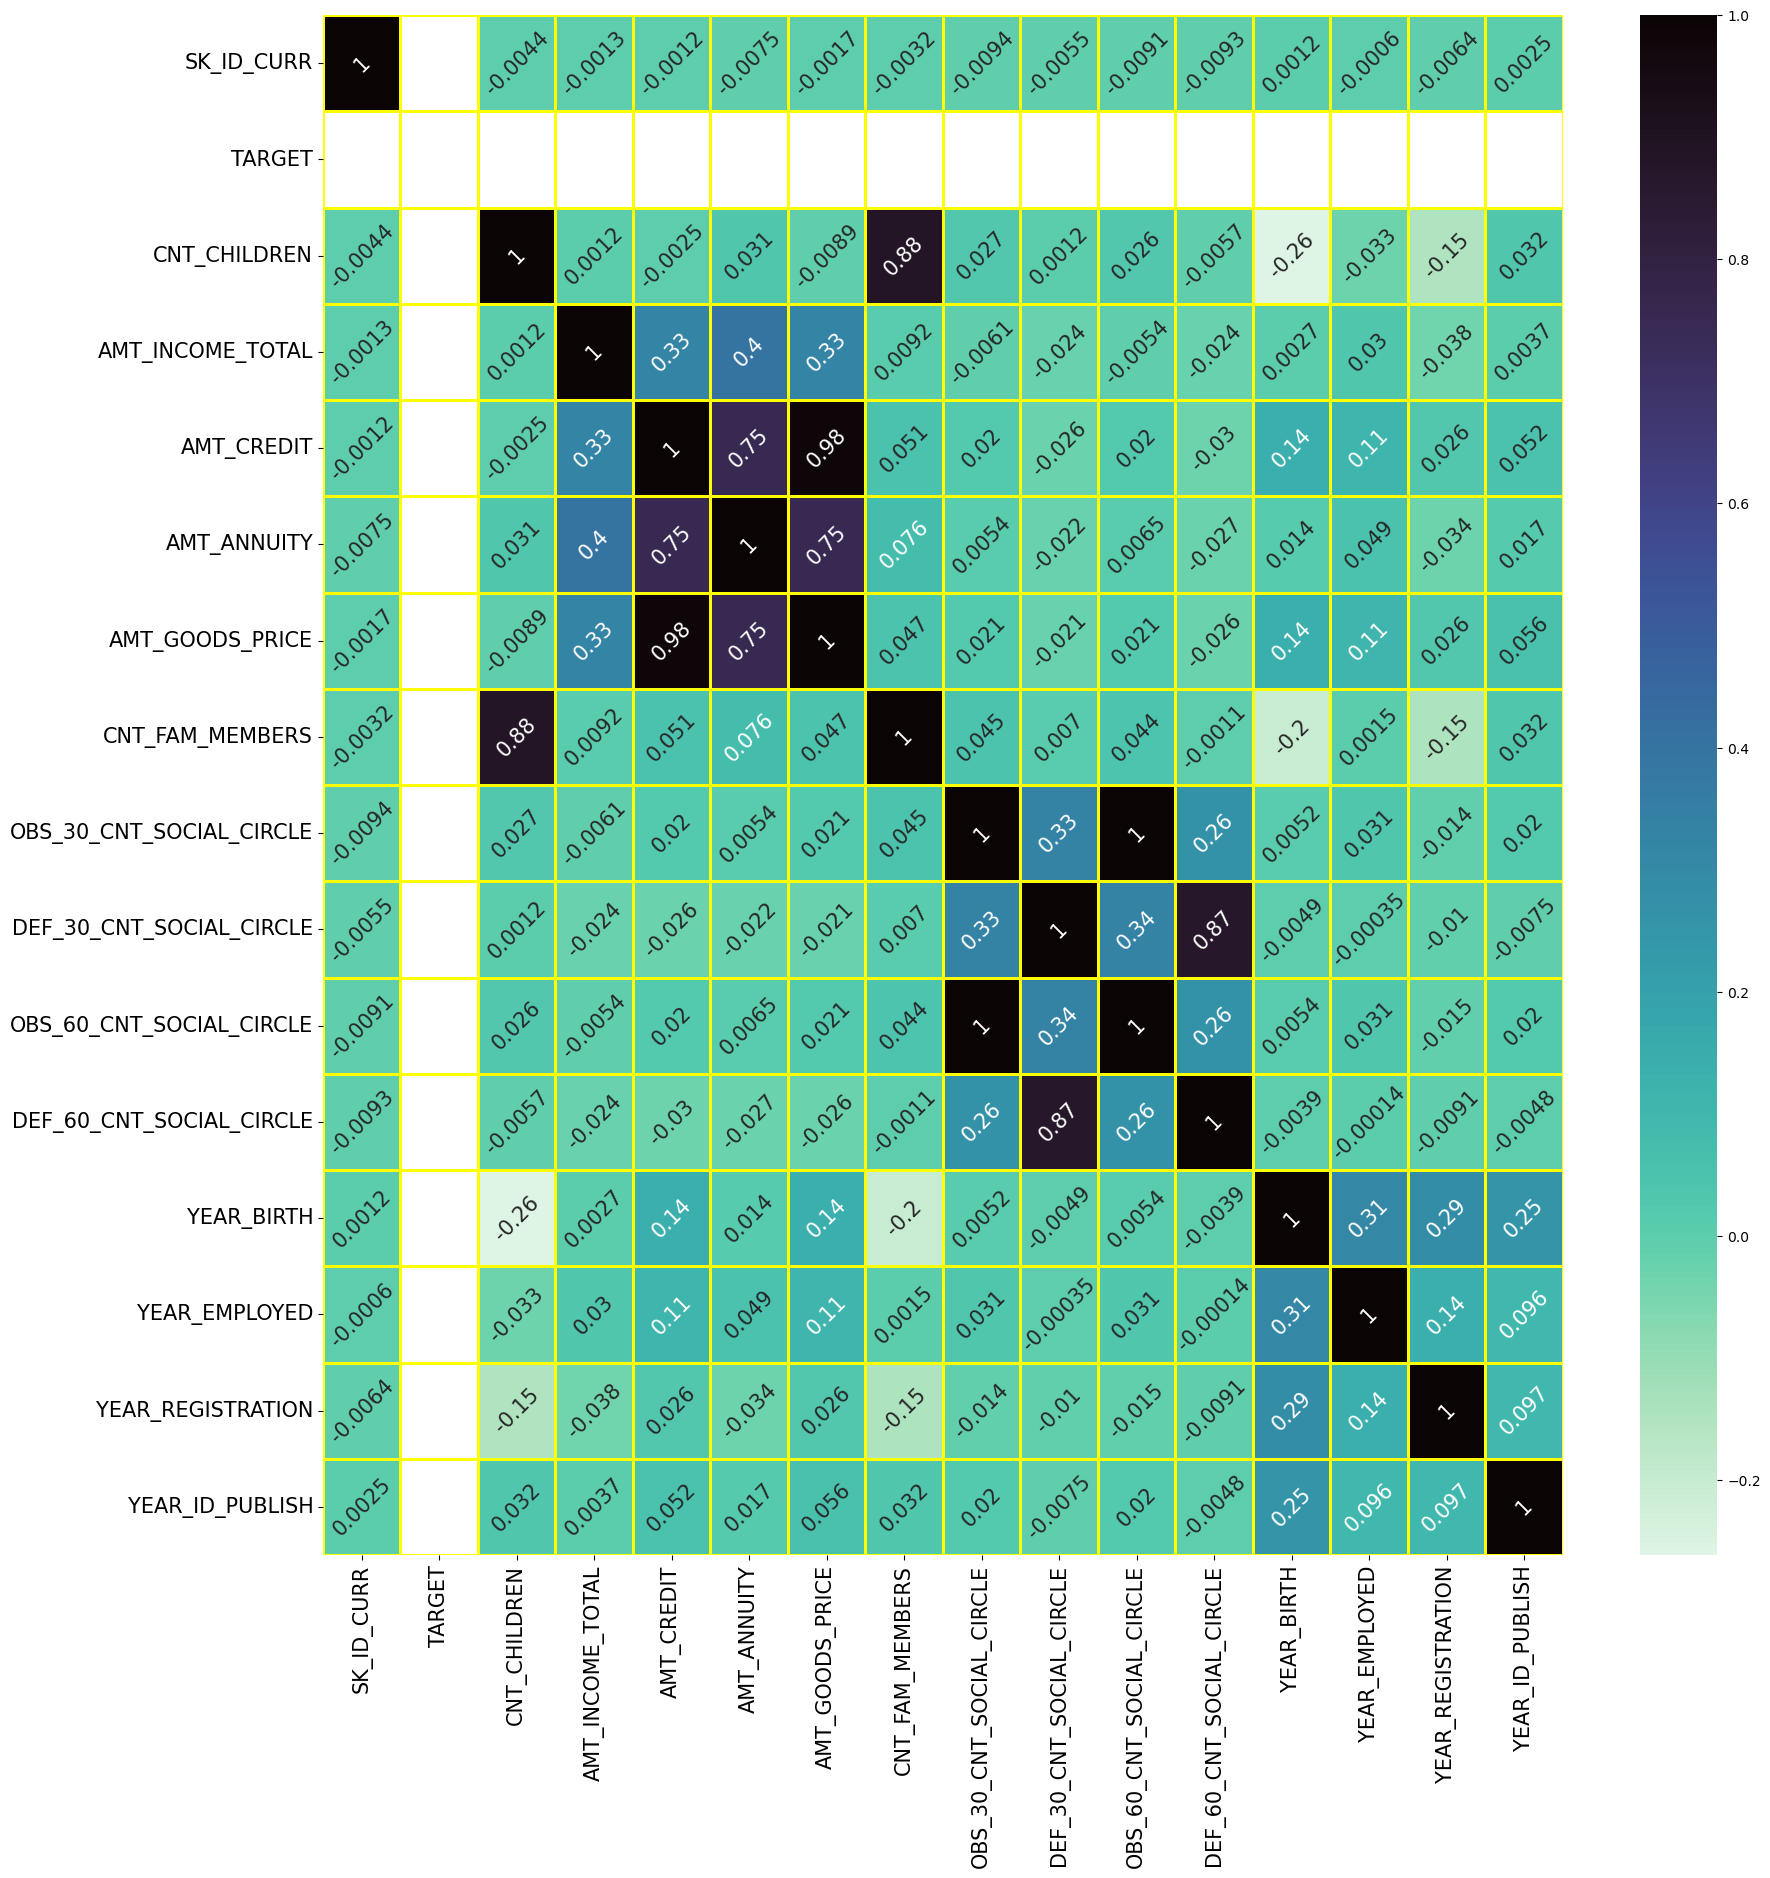

In [407]:
plt.figure(figsize = (20,20))
sns.heatmap(T1_corr.corr(),  annot=True, annot_kws={'size': 15,'rotation':45}, cmap="mako_r", linewidth = 1, linecolor="yellow").tick_params(labelsize=15)
plt.show()

**<font color='green'>From the above heat map we can note the following.**

**<font color='Blue'>Highly Positively Correlated Variables.**

**<font color='green'>- AMT_CREDIT vs AMT_GOODS_PRICE**
    
**<font color='green'>- AMT_CREDIT vs AMT_ANNUITY**

**<font color='green'>- AMT_ANNUITY vs AMT_GOODS_PRICE**
    
**<font color='green'>- CNT_FAM_MEMBERS vs CNT_CHILDREN**

**<font color='green'>-DEF_30_CNT_SOCIAL_CIRCLE vs DEF_60_CNT_SOCIAL_CIRCLE**

**<font color='green'>-OBS_30_CNT_SOCIAL_CIRCLE vs OBS_60_CNT_SOCIAL_CIRCLE**

**<font color='Blue'>Highly Negatively Correlated Variables.**

**<font color='green'>- There are no Highly Negatively Correlated Variables.**
    
**<font color='Blue'>So from the above heatmaps we caan conclude that the variables correlated in T0 and T1 are same with small variation in the correlation values.**


## <font color='brown'>Bivariate Analysis

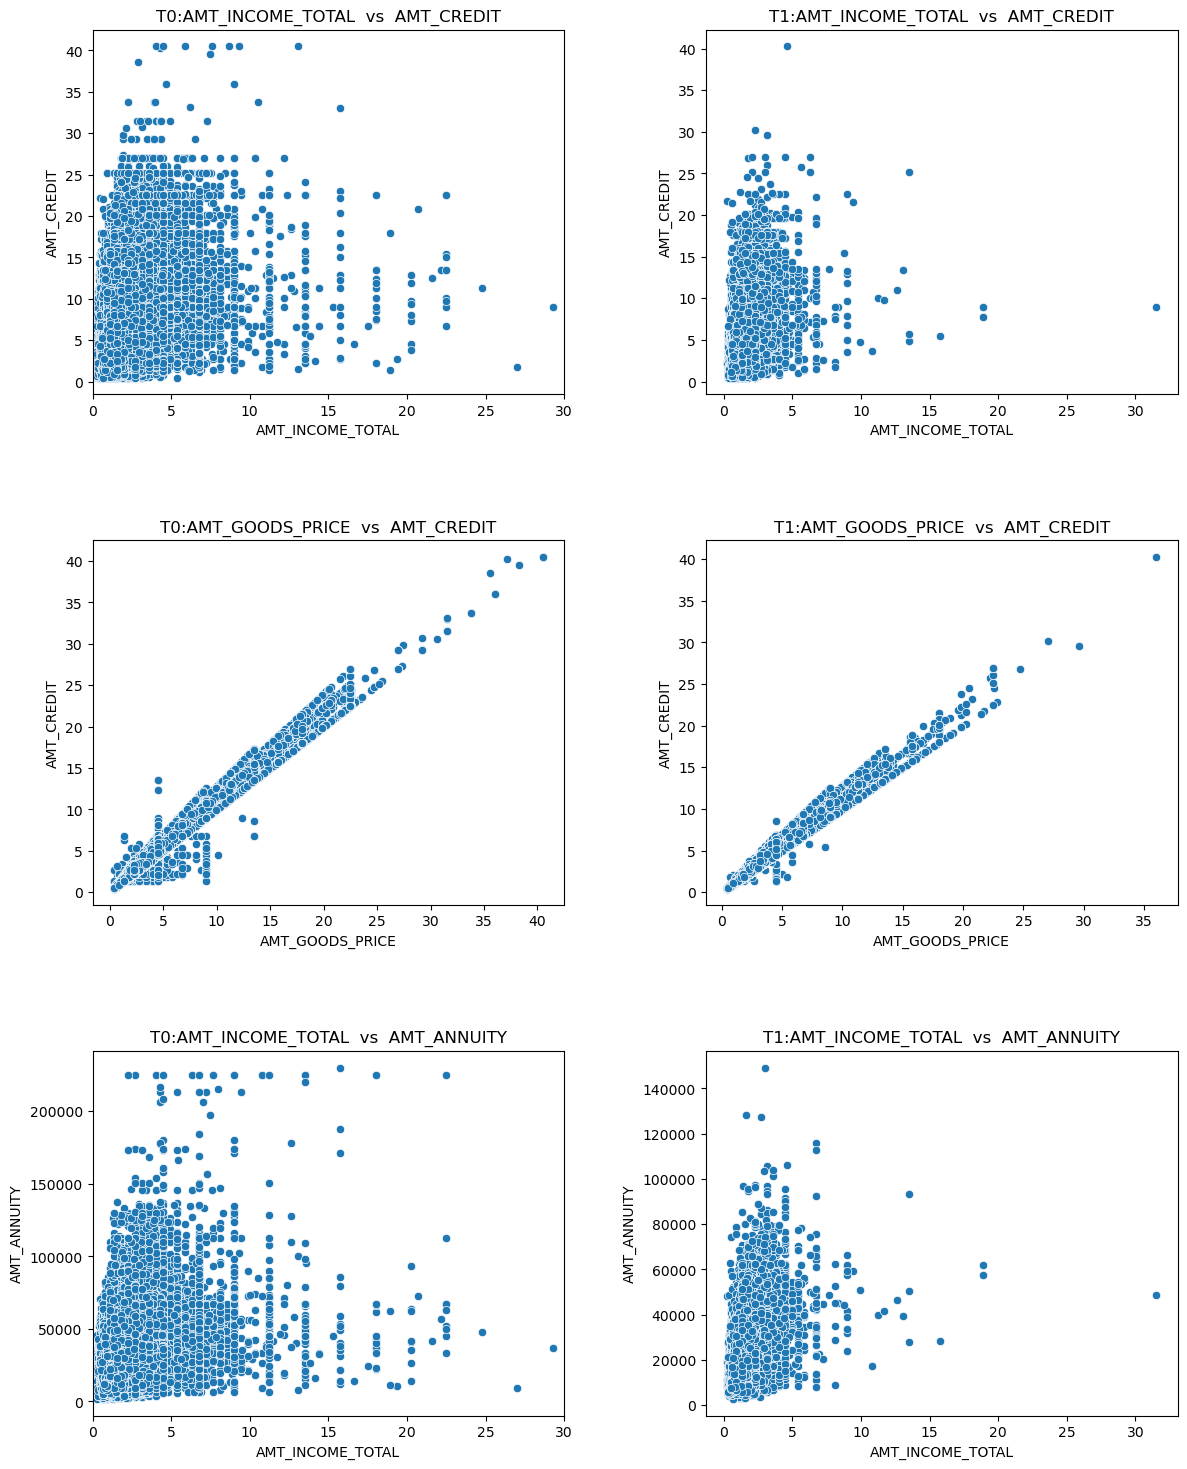

In [273]:
#Scatter plot for numeric columns

plt.figure(figsize = (14, 18))
plt.subplots_adjust(wspace=0.3,hspace=0.4)

plt.subplot(3,2,1)
sns.scatterplot(data = T0, x = "AMT_INCOME_TOTAL", y= "AMT_CREDIT")
plt.xlabel("AMT_INCOME_TOTAL")
plt.ylabel("AMT_CREDIT")
plt.title("T0:AMT_INCOME_TOTAL  vs  AMT_CREDIT")
plt.xlim(0, 30)

plt.subplot(3,2,2)
sns.scatterplot(data = T1, x = "AMT_INCOME_TOTAL",y = "AMT_CREDIT")
plt.xlabel("AMT_INCOME_TOTAL")
plt.ylabel("AMT_CREDIT")
plt.title("T1:AMT_INCOME_TOTAL  vs  AMT_CREDIT")


plt.subplot(3,2,3)
sns.scatterplot(data = T0, x = "AMT_GOODS_PRICE",y = "AMT_CREDIT")
plt.xlabel("AMT_GOODS_PRICE")
plt.ylabel("AMT_CREDIT")
plt.title("T0:AMT_GOODS_PRICE  vs  AMT_CREDIT")


plt.subplot(3,2,4)
sns.scatterplot(data = T1, x = "AMT_GOODS_PRICE", y = "AMT_CREDIT")
plt.xlabel("AMT_GOODS_PRICE")
plt.ylabel("AMT_CREDIT")
plt.title("T1:AMT_GOODS_PRICE  vs  AMT_CREDIT")

plt.subplot(3,2,5)
sns.scatterplot(data = T0, x = "AMT_INCOME_TOTAL",y = "AMT_ANNUITY")
plt.xlabel("AMT_INCOME_TOTAL")
plt.ylabel("AMT_ANNUITY")
plt.title("T0:AMT_INCOME_TOTAL  vs  AMT_ANNUITY")
plt.xlim(0, 30)

plt.subplot(3,2,6)
sns.scatterplot(data = T1, x = "AMT_INCOME_TOTAL", y = "AMT_ANNUITY")
plt.xlabel("AMT_INCOME_TOTAL")
plt.ylabel("AMT_ANNUITY")
plt.title("T1:AMT_INCOME_TOTAL  vs  AMT_ANNUITY")

plt.show()



**<font color='green'>Credit amount for those who dont have payment difficulties is higher than those with payment difficulties.**

**<font color='green'>AMT_CREDIT and AMT_GOODS_PRICE are highly correlated. Customers with higher goods price and dont have payment difficulties have higher credit amount than those with higher goods price but are having payment difficulties.**
    
**<font color='green'>Most of the defaulters are having Less than 5L total income..**

#### <font color='Red'>NAME_CONTRACT_TYPE

In [188]:
adf.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278217
Revolving loans     29278
Name: NAME_CONTRACT_TYPE, dtype: int64

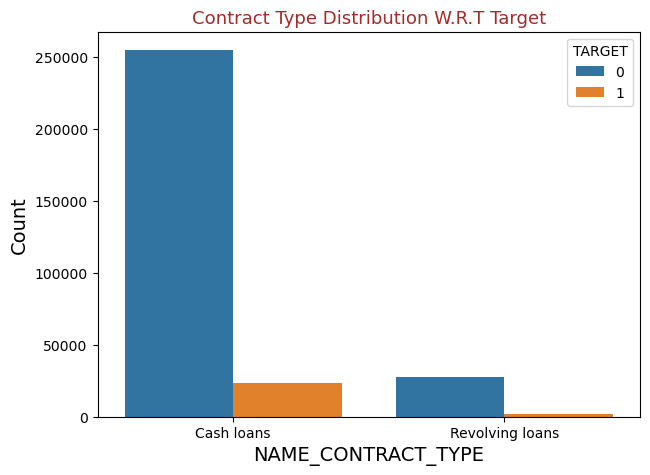

In [278]:
plt.figure(figsize=(7,5))
sns.countplot(data = adf, x = "NAME_CONTRACT_TYPE", hue = "TARGET")
plt.title('Contract Type Distribution W.R.T Target',fontdict={'fontsize': 13, 'fontweight' : 7, 'color' : 'Brown'})
plt.xlabel("NAME_CONTRACT_TYPE", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

**<font color='green'>From the above plot we can note that Cash loans are more preffered by customers than Revolving Loans. Also we can see that defaulters count is less for cash loans compared to revolving loans.**


#### <font color='Red'>CODE_GENDER

In [190]:
adf.CODE_GENDER.value_counts()

F    202441
M    105054
Name: CODE_GENDER, dtype: int64

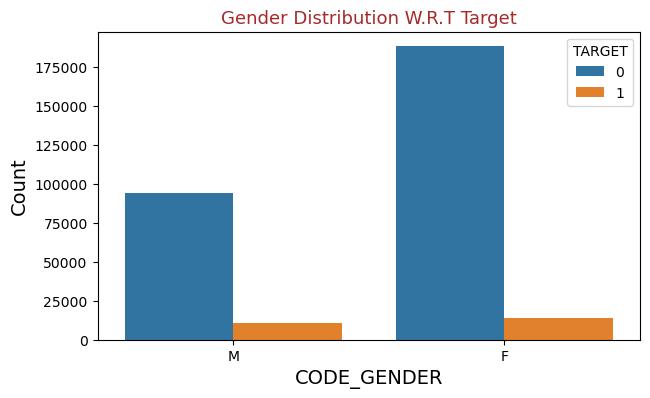

In [282]:
plt.figure(figsize=(7,4))
sns.countplot(data = adf, x = "CODE_GENDER", hue = "TARGET")
plt.title('Gender Distribution W.R.T Target',fontdict={'fontsize': 13, 'fontweight' : 7, 'color' : 'Brown'})
plt.xlabel("CODE_GENDER", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

**<font color='green'>From the above plot we can note that Female customers have less payment difficulties.**
    
**<font color='green'>Female customers can be targeted as they are less likely to default.**

#### <font color='Red'>ORGANIZATION_TYPE

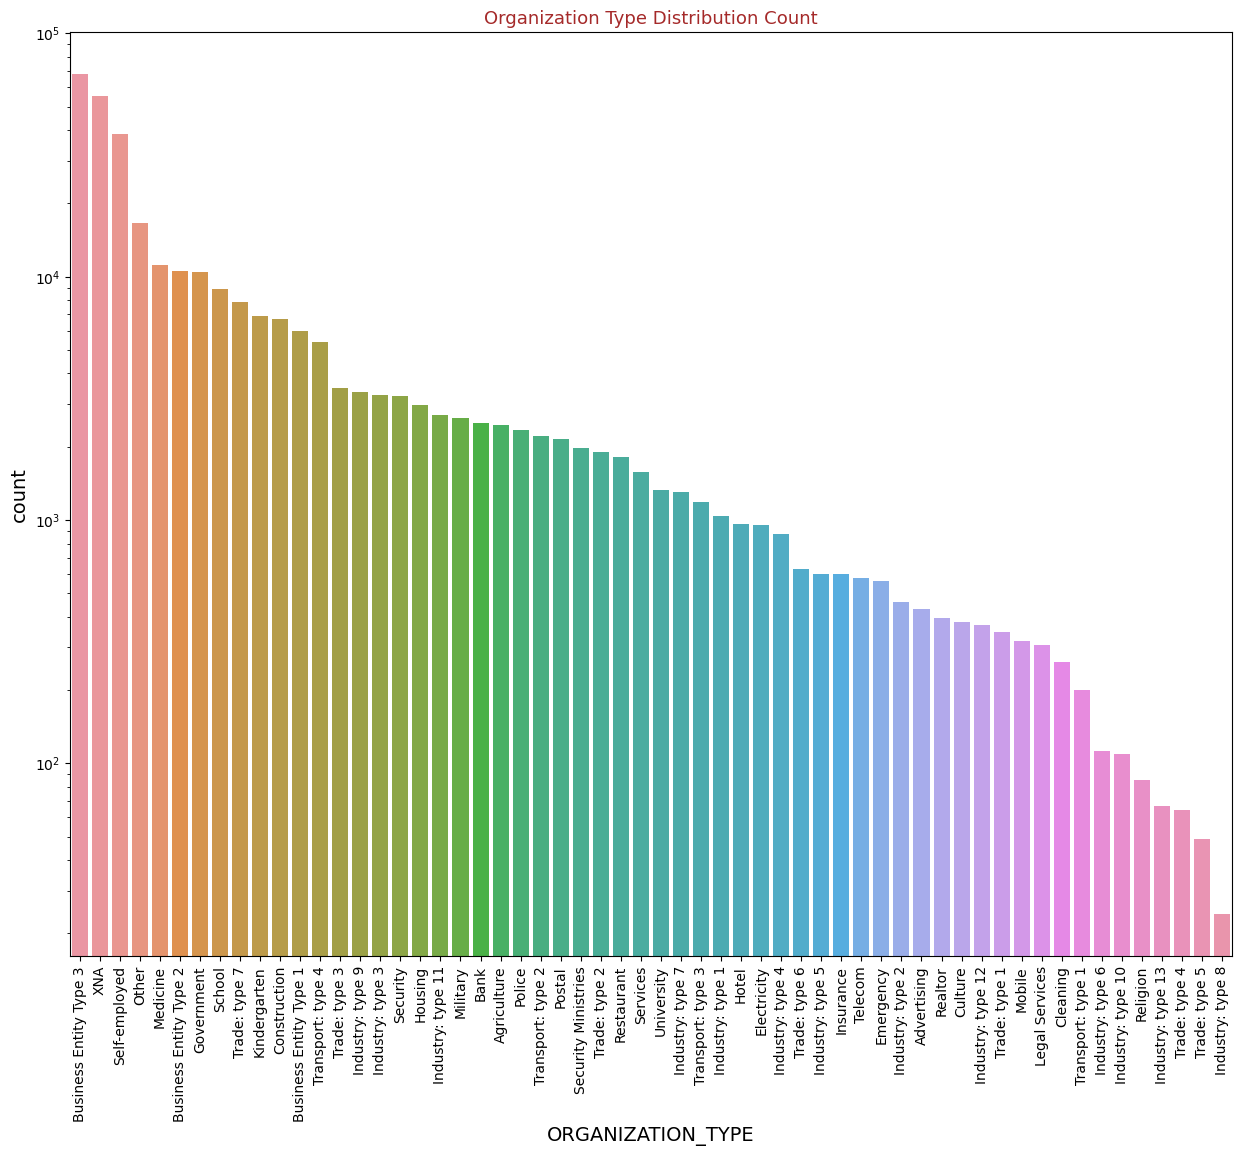

In [288]:
#Plotting countplot for checking what organisation type people are applying for loans 
# and are getting the loans actually
plt.figure(figsize=(15,12))
plt.xticks(rotation=30)
plt.yscale('log')
plt.xlabel("ORGANIZATION_TYPE", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title('Organization Type Distribution Count',fontdict={'fontsize': 13, 'fontweight' : 7, 'color' : 'Brown'})
sns.countplot(data=adf,x='ORGANIZATION_TYPE',order=adf['ORGANIZATION_TYPE'].value_counts().index, orient = "h")
plt.xticks(rotation = 90)
plt.show()

**<font color='green'>From the above plot we can see that max number of customers belong to Business entity Type 3.**
    
 
    
**<font color='green'>It can also noted that Trade Type 4 has least number of payment difficulty clients**

#### <font color='Red'>CREDIT AMOUNT vs FAMILY STATUS

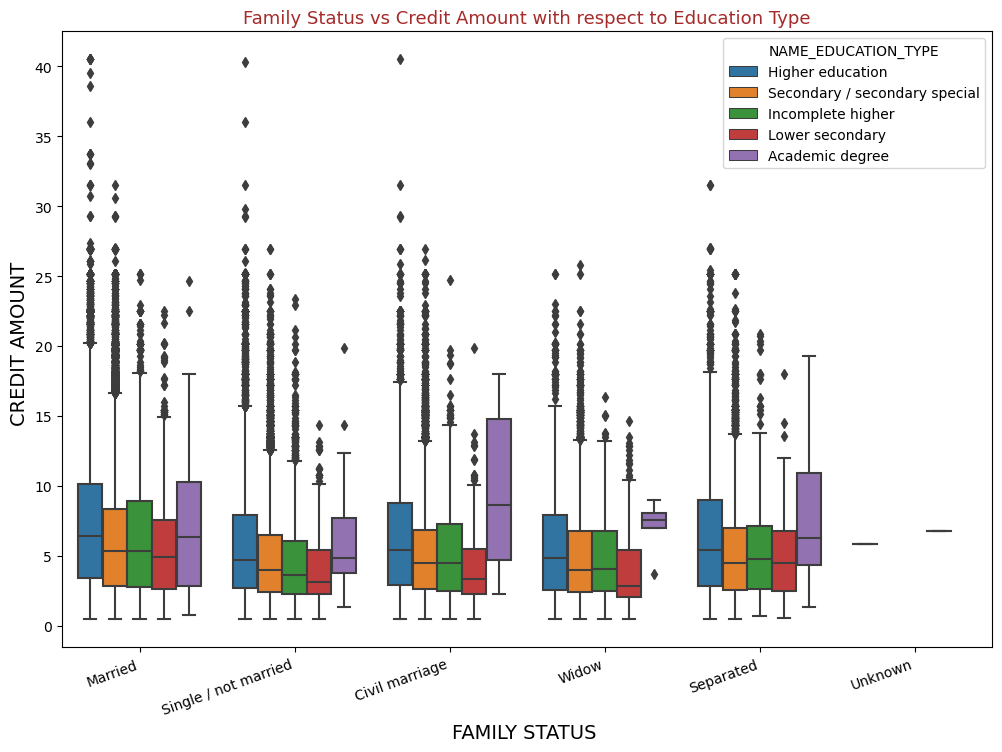

In [440]:
#Checking for Credit amount distributed to the customers based on their Family type and plotted with their education type.
plt.figure(figsize=(12,8))
scale_factor=5
sns.boxplot(data=T0,x=T0.NAME_FAMILY_STATUS,y=T0.AMT_CREDIT,hue=T0.NAME_EDUCATION_TYPE)
plt.xticks(rotation=90)
plt.xlabel("FAMILY STATUS ", fontsize=14)
plt.ylabel("CREDIT AMOUNT ", fontsize=14)
plt.title('Family Status vs Credit Amount with respect to Education Type',fontdict={'fontsize': 13, 'fontweight' : 7, 'color' : 'Brown'})
plt.xticks(rotation = 20,horizontalalignment='right')
plt.show()

**<font color='green'>From the above plot it can be noticed that family status of Married followed by single has the higher credit than the rest.**

**<font color='green'>Also it can be noticed customers who are Married followed by single with higher education has the higher credit than the rest.**

#### <font color='Red'>TOTAL INCOME vs FAMILY STATUS

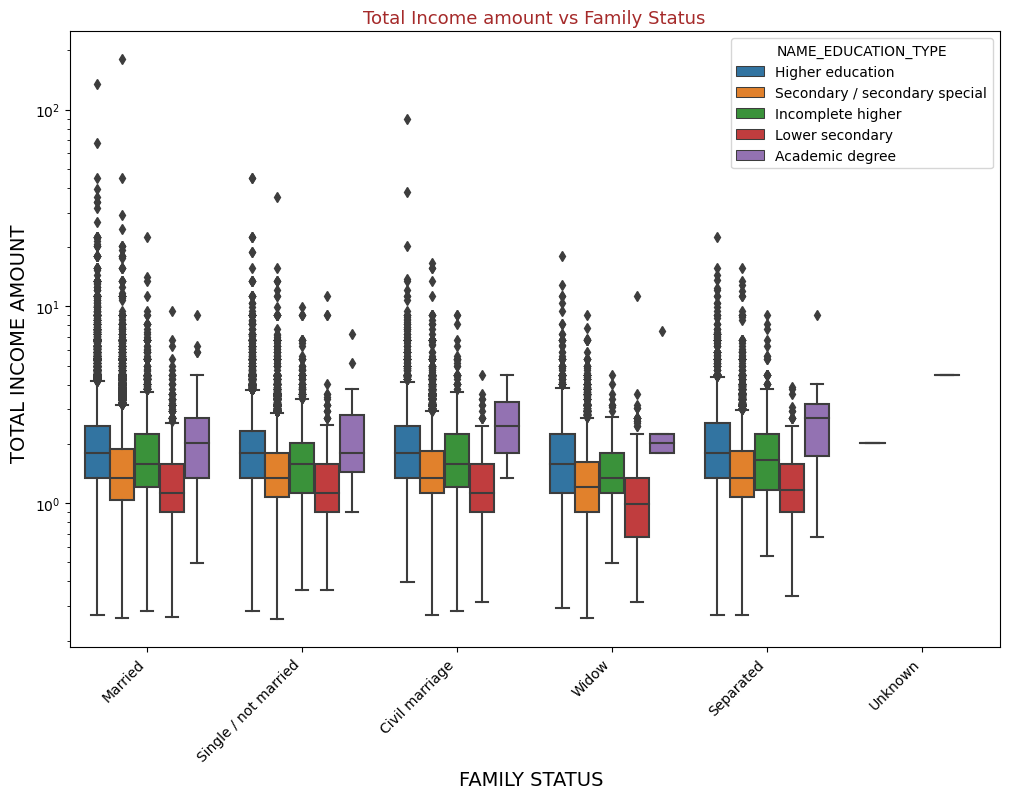

In [438]:
#Checking for Total income distributed to the customers based on their Family type and plotted with their education type.
plt.figure(figsize=(12,8))
scale_factor=5
sns.boxplot(data=T0,x=T0.NAME_FAMILY_STATUS,y=T0.AMT_INCOME_TOTAL,hue=T0.NAME_EDUCATION_TYPE)
plt.xticks(rotation=-30)
plt.xlabel("FAMILY STATUS ",fontsize=14)
plt.ylabel("TOTAL INCOME AMOUNT ", fontsize=14)
plt.yscale('log')
plt.title('Total Income amount vs Family Status',fontdict={'fontsize': 13, 'fontweight' : 7, 'color' : 'Brown'})
plt.xticks(rotation = 45,horizontalalignment='right')
plt.show()

**<font color='green'>From the above plot it can be noticed that Family status of 'civil marriage', 'marriage' and 'separated' of Higher education are having higher number of income than others**.

    


### <font color='brown'>b) previous_application.csv

In [195]:
padf.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0             73  Cash through the bank                XAP         Repeater   
1            164                    XNA                XAP         Repeater   
2            301  Cash through the bank                XAP         Repeater   
3            512  Cash through the bank                XAP         Repeater   
4            781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                 1                  XNA   
2  Credit and cash offices                 1                  XNA   
3  Credit and cash offices                 1                  XNA   
4  Credit and cash offices                 1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION AMT_ANNUITY_RANGE  \
0         12.0           middle  POS mobile with interest              0-1L   
1         36.0       low_action          Cash X-Sell: low              0-1L   
2         12.0             high         Cash X-Sell: high              0-1L   
3         12.0           middle       Cash X-Sell: middle              0-1L   
4         24.0             high         Cash Street: high              0-1L   

  AMT_APPLICATION_RANGE AMT_CREDIT_RANGE AMT_GOODS_PRICE_RANGE  
0                  0-1L             0-1L                  0-1L  
1                 6L-7L            6L-7L                 6L-7L  
2                 1L-2L            1L-2L                 1L-2L  
3                 4L-5L            4L-5L                 4L-5L  
4                 3L-4L            4L-5L                 3L-4L

## <font color='brown'>Univariate analysis

### <font color='brown'>Numerical Data

#### <font color='Red'>AMT_ANNUITY_RANGE

In [196]:
padf.AMT_ANNUITY_RANGE.value_counts()

0-1L      1665850
1L-2L        2616
2L-3L         103
3L-4L           4
4L-5L           4
5L-6L           0
6L-7L           0
7L-8L           0
8L-9L           0
9L-10L          0
10L+            0
Name: AMT_ANNUITY_RANGE, dtype: int64

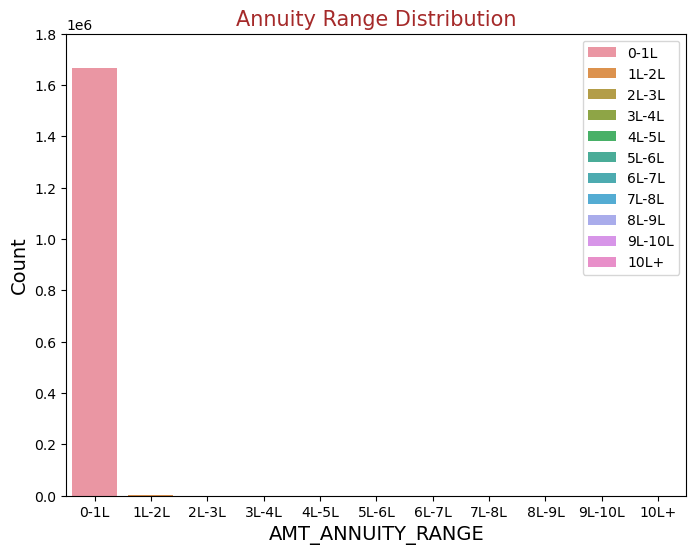

In [300]:
# Numeric variable analysis for AMT_ANNUITY_RANGE
plt.figure(figsize = (8,6))
plt.ylim(0, 1800000)
plt.title('Annuity Range Distribution',fontdict={'fontsize': 15, 'fontweight' : 7, 'color' : 'Brown'})
sns.countplot(data = padf, x = "AMT_ANNUITY_RANGE", hue = "AMT_ANNUITY_RANGE", dodge=False )
plt.legend(loc='upper right')
plt.xlabel("AMT_ANNUITY_RANGE", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

**<font color='green'>From the above plot it can be noticed that Annuity range is concentrated mostly in the range of 0-1 lakhs**.

#### <font color='Red'>AMT_APPLICATION_RANGE

In [198]:
padf.AMT_APPLICATION_RANGE.value_counts()

0-1L      595665
1L-2L     281998
2L-3L     132605
4L-5L      70067
3L-4L      51191
6L-7L      32012
8L-9L      23862
5L-6L      19129
7L-8L      12104
9L-10L      6491
10L+        3871
Name: AMT_APPLICATION_RANGE, dtype: int64

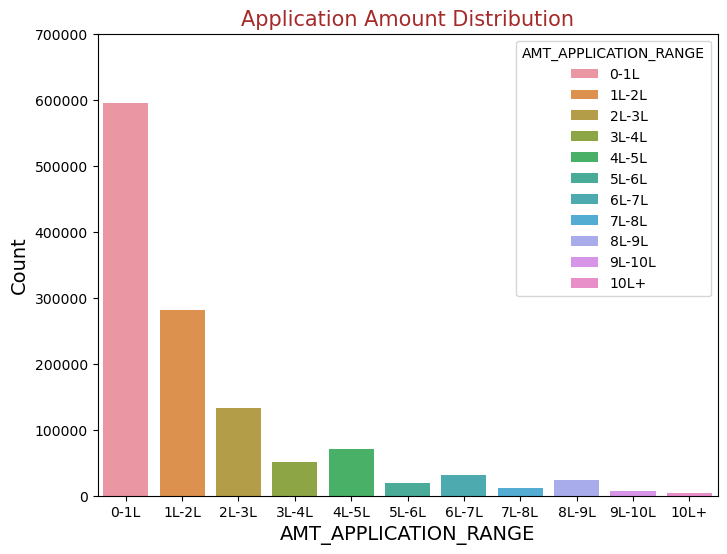

In [301]:
# Numeric variable analysis for AMT_APPLICATION_RANGE
plt.figure(figsize = (8, 6))
plt.ylim(0, 700000)
plt.title('Application Amount Distribution', fontdict={'fontsize': 15, 'fontweight' : 7, 'color' : 'Brown'})
sns.countplot(data = padf, x = "AMT_APPLICATION_RANGE", hue = "AMT_APPLICATION_RANGE", dodge=False)
plt.xlabel("AMT_APPLICATION_RANGE", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

**<font color='green'>From the above plot it can be noticed that max customers applied for a loan of 0-1 Lakhs followed by 1-2 Lakhs.**

#### <font color='Red'>AMT_CREDIT_RANGE

In [200]:
padf.AMT_CREDIT_RANGE.value_counts()

0-1L      600008
1L-2L     295054
2L-3L     137655
4L-5L      61640
3L-4L      57369
5L-6L      38526
7L-8L      26407
6L-7L      22140
8L-9L      21150
10L+       10093
9L-10L     10004
Name: AMT_CREDIT_RANGE, dtype: int64

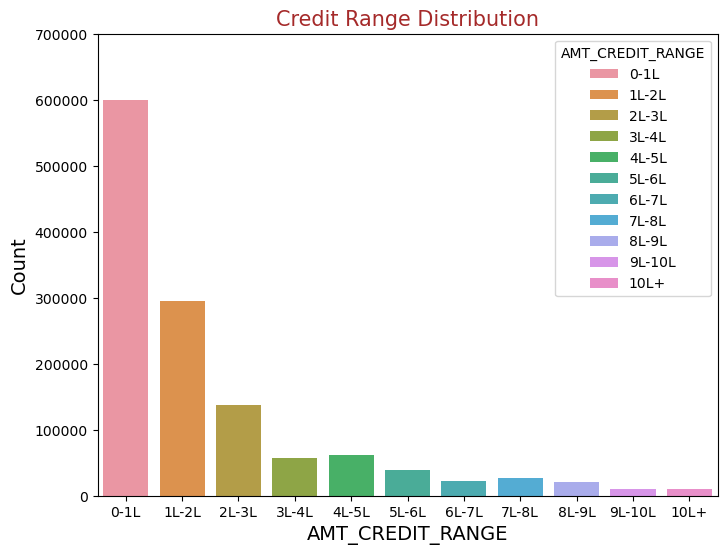

In [303]:
# Numeric variable analysis for AMT_CREDIT_RANGE
plt.figure(figsize = (8,6))
plt.ylim(0, 700000)
plt.title('Credit Range Distribution', fontdict={'fontsize': 15, 'fontweight' : 7, 'color' : 'Brown'})
sns.countplot(data = padf, x = "AMT_CREDIT_RANGE", hue='AMT_CREDIT_RANGE', dodge=False)
plt.xlabel("AMT_CREDIT_RANGE", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

**<font color='green'>From the above plot it can be noticed that max customers are having a credit range of 0-1 Lakhs.**

#### <font color='Red'>AMT_GOODS_PRICE_RANGE

In [202]:
padf.AMT_GOODS_PRICE_RANGE.value_counts()

1L-2L     667492
0-1L      595661
2L-3L     132586
4L-5L      70081
3L-4L      51186
6L-7L      32024
8L-9L      23878
5L-6L      19135
7L-8L      12123
9L-10L      6491
10L+        3871
Name: AMT_GOODS_PRICE_RANGE, dtype: int64

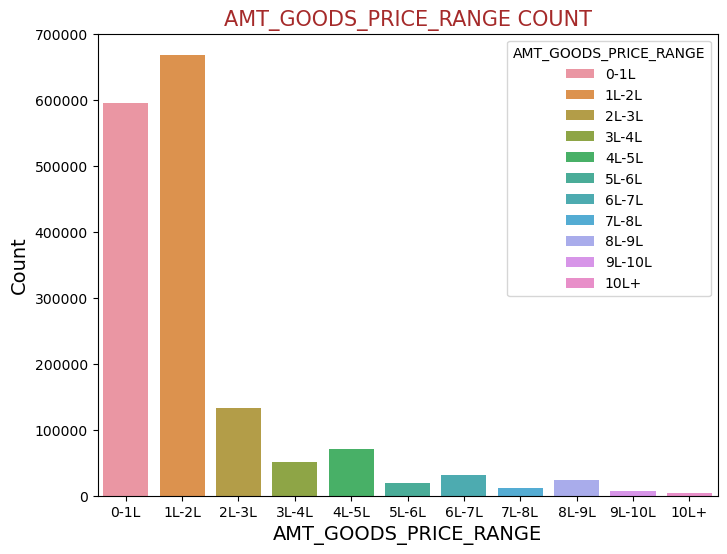

In [304]:
# Numeric variable analysis for AMT_GOODS_PRICE_RANGE
plt.figure(figsize = (8,6))
plt.ylim(0, 700000)
plt.title('AMT_GOODS_PRICE_RANGE COUNT', fontdict={'fontsize': 15, 'fontweight' : 7, 'color' : 'Brown'})
sns.countplot(data = padf, x = "AMT_GOODS_PRICE_RANGE", hue='AMT_GOODS_PRICE_RANGE', dodge=False)
plt.xlabel("AMT_GOODS_PRICE_RANGE", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

**<font color='green'>From the above plot we can note that max loans distribted wrt Goods are with goods price in range of 1 - 2 Lakhs followed by 0 - 1 Lakhs.**

### <font color='brown'>Catagorical Data

#### <font color='Red'>NAME_CONTRACT_TYPE

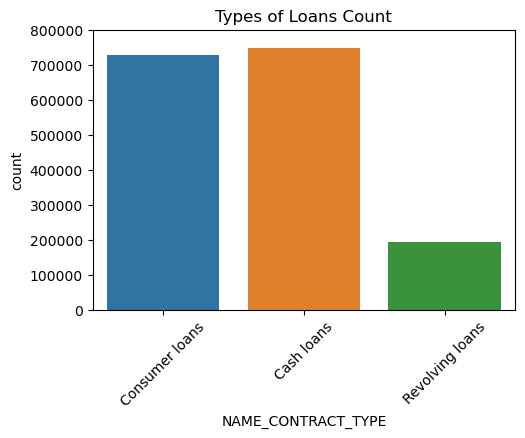

In [204]:
#Catagorical variable analysis for NAME_CONTRACT_TYPE
plt.figure(figsize = (12, 8))
plt.subplot(2, 2, 1)
plt.ylim(0, 800000)
plt.title('Types of Loans Count')
sns.countplot(data = padf, x = "NAME_CONTRACT_TYPE")
plt.xticks(rotation = 45)
plt.show()

**<font color='green'>From the above plot we can note that most preffered loan type is Cash Loans followed by Consumer loans.**

#### <font color='Red'>NAME_CASH_LOAN_PURPOSE

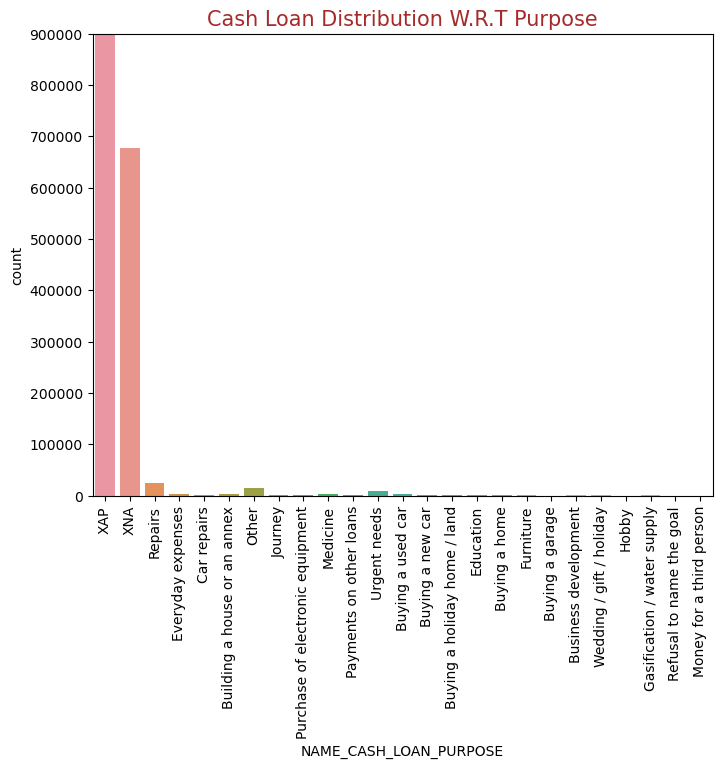

In [318]:
#Catagorical variable analysis for NAME_CONTRACT_TYPE
plt.figure(figsize = (8,6))
plt.ylim(0, 900000)
plt.title('Cash Loan Distribution W.R.T Purpose', fontdict={'fontsize': 15, 'fontweight' : 7, 'color' : 'Brown'})
sns.countplot(data = padf, x = "NAME_CASH_LOAN_PURPOSE")
plt.xticks(rotation = 90)
plt.show()

**<font color='green'>From the above plot we can find that the loan purpose has high number of unknown values (XAP, XNA) followed by repairs.**

#### <font color='Red'>NAME_CONTRACT_STATUS

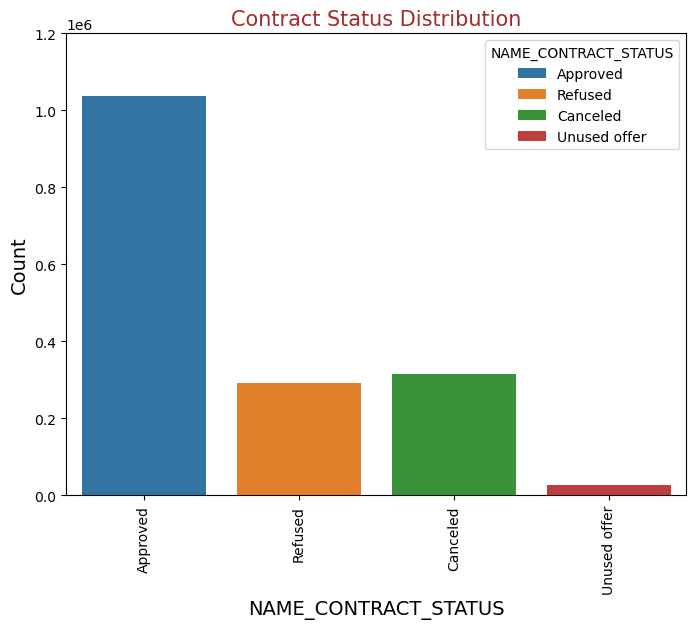

In [313]:
#Catagorical variable analysis for NAME_CONTRACT_STATUS
plt.figure(figsize = (8, 6))
plt.ylim(0, 1200000)
plt.title('Contract Status Distribution', fontdict={'fontsize': 15, 'fontweight' : 7, 'color' : 'Brown'})
sns.countplot(data = padf, x = "NAME_CONTRACT_STATUS", hue='NAME_CONTRACT_STATUS', dodge=False)
plt.xticks(rotation = 90)
plt.xlabel("NAME_CONTRACT_STATUS", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

**<font color='green'>From the above plot we can find that the max number of application are accepted by the bank.**

#### <font color='Red'>NAME_CLIENT_TYPE

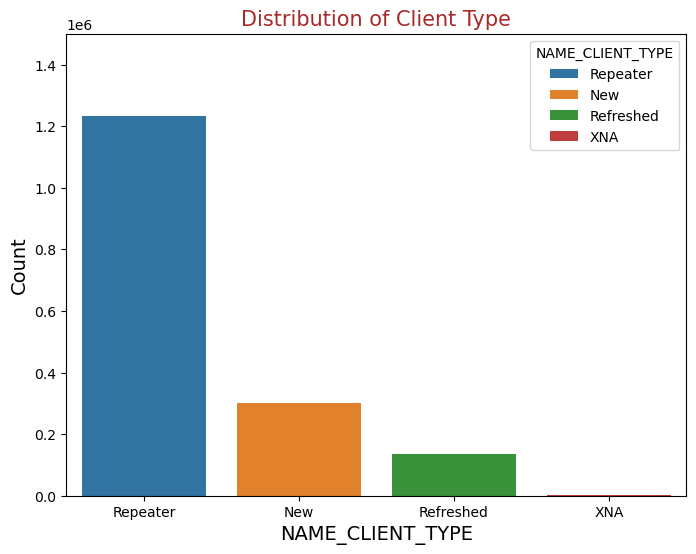

In [333]:
#Catagorical variable analysis for NAME_CLIENT_TYPE
plt.figure(figsize = (8,6))
plt.ylim(0, 1500000)
plt.title('Distribution of Client Type', fontdict={'fontsize': 15, 'fontweight' : 7, 'color' : 'Brown'})
sns.countplot(data = padf, x = "NAME_CLIENT_TYPE", hue='NAME_CLIENT_TYPE', dodge=False)
plt.xlabel("NAME_CLIENT_TYPE", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

**<font color='green'>From the above plot we can say Maximum number of customers are Repeaters, i'e they have done business with bank before.**

## <font color='brown'>Bivariate Analysis

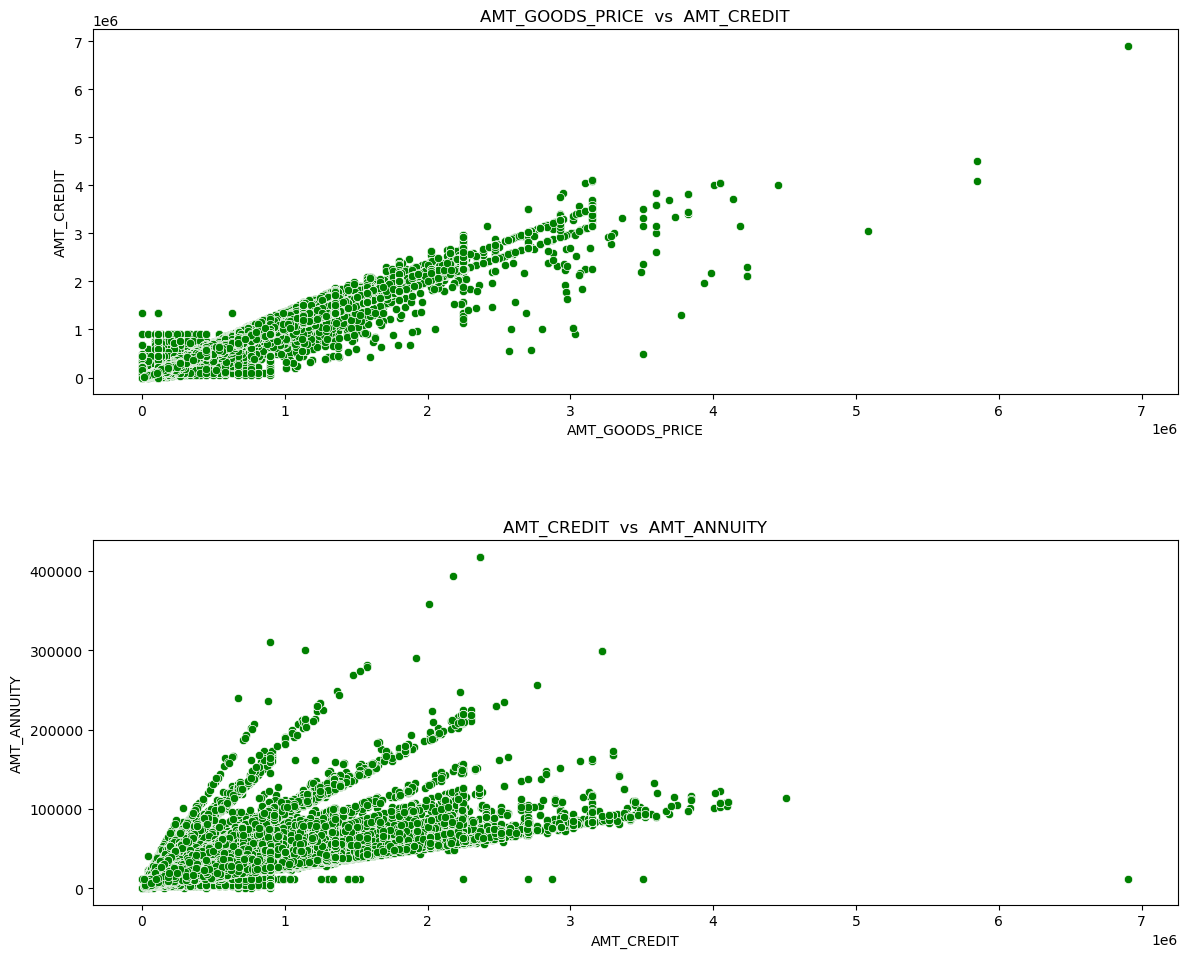

In [208]:
#Scatter plot for numeric columns

plt.figure(figsize = (14, 18))
plt.subplots_adjust(wspace=0.3,hspace=0.4)

plt.subplot(3,1,1)
sns.scatterplot(data = padf, x = "AMT_GOODS_PRICE",y = "AMT_CREDIT",  color='green')
plt.xlabel("AMT_GOODS_PRICE")
plt.ylabel("AMT_CREDIT")
plt.title("AMT_GOODS_PRICE  vs  AMT_CREDIT")

plt.subplot(3,1,2)
sns.scatterplot(data = padf, x = "AMT_CREDIT", y = "AMT_ANNUITY",  color='green')
plt.xlabel("AMT_CREDIT")
plt.ylabel("AMT_ANNUITY")
plt.title("AMT_CREDIT  vs  AMT_ANNUITY")
plt.show()

**<font color='green'>AMT_CREDIT and AMT_GOODS_PRICE are highly correlated so is AMT_CREDIT and AMT_ANNUITY**

### <font color='Brown'>We will now merge application_data with previous_application data for analysis.

In [209]:
#merging the current application_data with previous application data
adf_padf =  pd.merge(left=adf, right=padf,how='inner', on='SK_ID_CURR',suffixes='_x')

In [210]:
adf_padf.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_ CODE_GENDER  CNT_CHILDREN  \
0      100002       1          Cash loans           M             0   
1      100003       0          Cash loans           F             0   
2      100003       0          Cash loans           F             0   
3      100003       0          Cash loans           F             0   
4      100004       0     Revolving loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT_  AMT_ANNUITY_  AMT_GOODS_PRICE_  \
0             2.025     4.065975       24700.5             3.510   
1             2.700    12.935025       35698.5            11.295   
2             2.700    12.935025       35698.5            11.295   
3             2.700    12.935025       35698.5            11.295   
4             0.675     1.350000        6750.0             1.350   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2          Family    State servant               Higher education   
3          Family    State servant               Higher education   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0  Single / not married  House / apartment        Laborers                1   
1               Married  House / apartment      Core staff                2   
2               Married  House / apartment      Core staff                2   
3               Married  House / apartment      Core staff                2   
4  Single / not married  House / apartment        Laborers                1   

        ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  \
0  Business Entity Type 3      0.262949      0.139376   
1                  School      0.622246      0.535276   
2                  School      0.622246      0.535276   
3                  School      0.622246      0.535276   
4              Government      0.555912      0.729567   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       1.0                       0.0   
3                       1.0                       0.0   
4                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  FLAG_DOCUMENT_3  \
0                       2.0                       2.0                1   
1                       1.0                       0.0                1   
2                       1.0                       0.0                1   
3                       1.0                       0.0                1   
4                       0.0                       0.0                0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  YEAR_BIRTH  \
0                        0.0                         1.0   25.920548   
1                        0.0                         0.0   45.931507   
2                        0.0                         0.0   45.931507   
3                        0.0                         0.0   45.931507   
4                        0.0                         0.0   52.18

In [211]:
adf_padf.describe()

SK_ID_CURR        TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  1.413645e+06  1.413645e+06  1.413645e+06      1.413645e+06   
mean   2.784811e+05  8.654719e-02  4.044700e-01      1.730693e+00   
std    1.028122e+05  2.811705e-01  7.137078e-01      1.023135e+00   
min    1.000020e+05  0.000000e+00  0.000000e+00      2.565000e-01   
25%    1.893630e+05  0.000000e+00  0.000000e+00      1.125000e+00   
50%    2.789910e+05  0.000000e+00  0.000000e+00      1.575000e+00   
75%    3.675560e+05  0.000000e+00  1.000000e+00      2.070000e+00   
max    4.562550e+05  1.000000e+00  7.000000e+00      1.800009e+02   

        AMT_CREDIT_  AMT_ANNUITY_  AMT_GOODS_PRICE_  CNT_FAM_MEMBERS  \
count  1.413645e+06  1.413645e+06      1.413645e+06     1.413645e+06   
mean   5.875607e+00  2.701709e+04      5.276587e+00     2.150076e+00   
std    3.849184e+00  1.395065e+04      3.531039e+00     8.978127e-01   
min    4.500000e-01  1.615500e+03      4.050000e-01     1.000000e+00   
25%    2.700000e+00  1.682100e+04      2.385000e+00     2.000000e+00   
50%    5.084955e+00  2.492550e+04      4.500000e+00     2.000000e+00   
75%    8.079840e+00  3.454200e+04      6.795000e+00     3.000000e+00   
max    4.050000e+01  2.250000e+05      4.050000e+01     9.000000e+00   

       EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
count  1.413645e+06  1.413645e+06              1.413645e+06   
mean   5.114964e-01  4.974964e-01              1.540757e+00   
std    1.910063e-01  1.797588e-01              2.528965e+00   
min    8.173617e-08  5.272652e-04              0.000000e+00   
25%    3.893751e-01  3.807997e-01              0.000000e+00   
50%    5.630477e-01  5.352763e-01              0.000000e+00   
75%    6.605643e-01  6.212263e-01              2.000000e+00   
max    8.549997e-01  8.960095e-01              3.480000e+02   

       DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
count              1.413645e+06              1.413645e+06   
mean               1.536977e-01              1.522927e+00   
std                4.654306e-01              2.507218e+00   
min                0.000000e+00              0.000000e+00   
25%                0.000000e+00              0.000000e+00   
50%                0.000000e+00              0.000000e+00   
75%                0.000000e+00              2.000000e+00   
max                3.400000e+01              3.440000e+02   

       DEF_60_CNT_SOCIAL_CIRCLE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  \
count              1.413645e+06     1.413645e+06                1.413645e+06   
mean               1.078000e-01     7.385624e-01                5.485111e-03   
std                3.786714e-01     4.394179e-01                7.702743e-02   
min                0.000000e+00     0.000000e+00                0.000000e+00   
25%                0.000000e+00     0.000000e+00                0.000000e+00   
50%                0.000000e+00     1.000000e+00                0.000000e+00   
75%                0.000000e+00     1.000000e+00                0.000000e+00   
max                2.400000e+01     1.000000e+00                4.000000e+00   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count               1.413645e+06                1.413645e+06   
mean                6.028388e-03                3.409696e-02   
std                 1.001985e-01                2.012794e-01   
min                 0.000000e+00                0.000000e+00   
25%                 0.000000e+00                0.000000e+00   
50%                 0.000000e+00                0.000000e+00   
75%                 0.000000e+00                0.000000e+00   
max                 9.000000e+00                8.000000e+00   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
count               1.413645e+06               1.413645e+06   
mean                2.664905e-01               3.197019e-01   
std                 9.268522e-01               8.781586e-01   
min                 0.000000e+00               0.000000e+00   
25%    

In [212]:
adf_padf.shape

(1413645, 67)

In [213]:
adf_padf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413645 entries, 0 to 1413644
Data columns (total 67 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413645 non-null  int64   
 1   TARGET                       1413645 non-null  int64   
 2   NAME_CONTRACT_TYPE_          1413645 non-null  object  
 3   CODE_GENDER                  1413645 non-null  object  
 4   CNT_CHILDREN                 1413645 non-null  int64   
 5   AMT_INCOME_TOTAL             1413645 non-null  float64 
 6   AMT_CREDIT_                  1413645 non-null  float64 
 7   AMT_ANNUITY_                 1413645 non-null  float64 
 8   AMT_GOODS_PRICE_             1413645 non-null  float64 
 9   NAME_TYPE_SUITE              1413645 non-null  object  
 10  NAME_INCOME_TYPE             1413645 non-null  object  
 11  NAME_EDUCATION_TYPE          1413645 non-null  object  
 12  NAME_FAMILY_STATUS          

## <font color='indigo'>Checking for Null/Missing Values

In [214]:
adf_padf.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE_                 0
CODE_GENDER                         0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT_                         0
AMT_ANNUITY_                        0
AMT_GOODS_PRICE_                    0
NAME_TYPE_SUITE                     0
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
OCCUPATION_TYPE                     0
CNT_FAM_MEMBERS                     0
ORGANIZATION_TYPE                   0
EXT_SOURCE_2                        0
EXT_SOURCE_3                        0
OBS_30_CNT_SOCIAL_CIRCLE            0
DEF_30_CNT_SOCIAL_CIRCLE            0
OBS_60_CNT_SOCIAL_CIRCLE            0
DEF_60_CNT_SOCIAL_CIRCLE            0
FLAG_DOCUMENT_3                     0
AMT_REQ_CREDIT_BUREAU_HOUR          0
AMT_REQ_CREDIT_BUREAU_DAY           0
AMT_REQ_CRED

In [215]:
#Percentage of missing values.
adf_padf_per = (100 * adf_padf.isnull().sum()/len(adf_padf))
adf_padf_per

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE_             0.000000
CODE_GENDER                     0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT_                     0.000000
AMT_ANNUITY_                    0.000000
AMT_GOODS_PRICE_                0.000000
NAME_TYPE_SUITE                 0.000000
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
OCCUPATION_TYPE                 0.000000
CNT_FAM_MEMBERS                 0.000000
ORGANIZATION_TYPE               0.000000
EXT_SOURCE_2                    0.000000
EXT_SOURCE_3                    0.000000
OBS_30_CNT_SOCIAL_CIRCLE        0.000000
DEF_30_CNT_SOCIAL_CIRCLE        0.000000
OBS_60_CNT_SOCIAL_CIRCLE        0.000000
DEF_60_CNT_SOCIAL_CIRCLE        0.000000
FLAG_DOCUMENT_3                 0.000000
AMT_REQ_CREDIT_B

In [216]:
#Droppng the unwanted columns of the dataframe
adf_padf.drop(["SK_ID_CURR", "EXT_SOURCE_2", "EXT_SOURCE_3", "FLAG_DOCUMENT_3", "WEEKDAY_APPR_PROCESS_START", "HOUR_APPR_PROCESS_START", "FLAG_LAST_APPL_PER_CONTRACT", "NFLAG_LAST_APPL_IN_DAY"],axis=1,inplace=True)

In [217]:
adf_padf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413645 entries, 0 to 1413644
Data columns (total 59 columns):
 #   Column                      Non-Null Count    Dtype   
---  ------                      --------------    -----   
 0   TARGET                      1413645 non-null  int64   
 1   NAME_CONTRACT_TYPE_         1413645 non-null  object  
 2   CODE_GENDER                 1413645 non-null  object  
 3   CNT_CHILDREN                1413645 non-null  int64   
 4   AMT_INCOME_TOTAL            1413645 non-null  float64 
 5   AMT_CREDIT_                 1413645 non-null  float64 
 6   AMT_ANNUITY_                1413645 non-null  float64 
 7   AMT_GOODS_PRICE_            1413645 non-null  float64 
 8   NAME_TYPE_SUITE             1413645 non-null  object  
 9   NAME_INCOME_TYPE            1413645 non-null  object  
 10  NAME_EDUCATION_TYPE         1413645 non-null  object  
 11  NAME_FAMILY_STATUS          1413645 non-null  object  
 12  NAME_HOUSING_TYPE           1413645 non-nu

### <font color='brown'>Checking the imbalance Percentage

In [218]:
adf_padf["TARGET"].value_counts()

0    1291298
1     122347
Name: TARGET, dtype: int64

In [219]:
# Calculating Imbalance percentage
adf_padf["TARGET"].value_counts(normalize = True)*100

0    91.345281
1     8.654719
Name: TARGET, dtype: float64

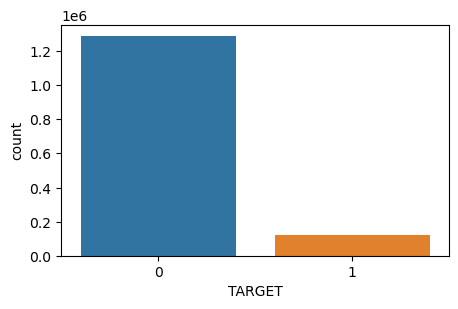

In [220]:
plt.figure(figsize = (5, 3))
sns.countplot(data = adf_padf, x = "TARGET")
plt.show()

#### **<font color='green'>TARGET column has 8.65% clients that have payment difficulties and 91.34% are having no difficulties**

## <font color='indigo'>Data Analysis

### <font color='brown'>Univariate analysis

#### <font color='Red'>NAME_CONTRACT_TYPE_

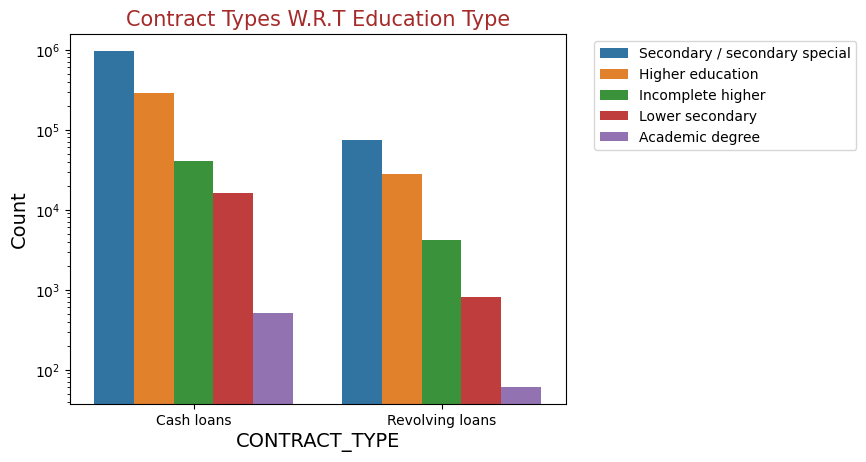

In [334]:
# Checking the count of Contract Type with respect to Education Type.
sns.countplot(data =adf_padf, x = "NAME_CONTRACT_TYPE_", hue=adf_padf.NAME_EDUCATION_TYPE)
plt.yscale('log')
plt.title('Contract Types W.R.T Education Type',fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'brown'})
plt.legend(bbox_to_anchor=(1.6,1))
plt.xlabel("CONTRACT_TYPE", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

#### **<font color='green'>Most clients with all kinds of education types prefer cash loans over revolving loans.**

#### **<font color='green'>Client with Secondary/Secondary special education types takes more number of loans compared to others.**   

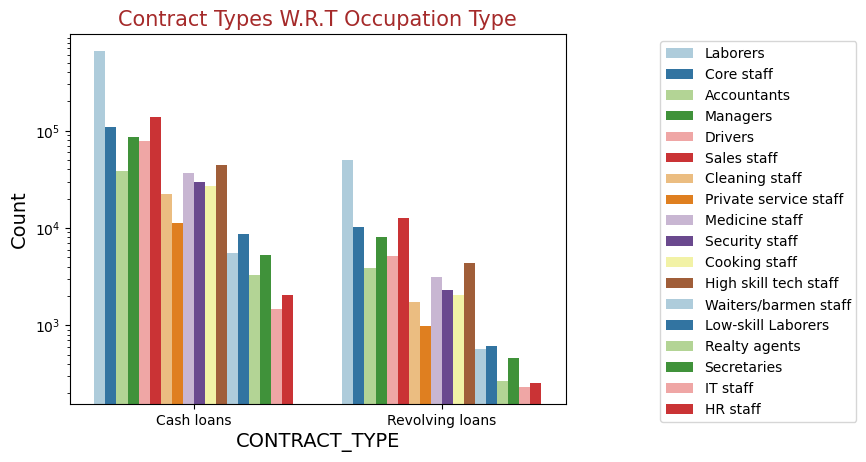

In [348]:
# Checking the count of Occupation Type with respect to Contract Type
sns.countplot(data =adf_padf, x = "NAME_CONTRACT_TYPE_", hue=adf_padf.OCCUPATION_TYPE, palette = "Paired")
plt.yscale('log')
plt.title('Contract Types W.R.T Occupation Type',fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'brown'})
plt.legend(bbox_to_anchor=(1.6,1))
plt.xlabel("CONTRACT_TYPE", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

#### **<font color='green'>Max number of clients preferring cash loans and revolving comes under Laborer catagory**
 
#### **<font color='green'>Least number of clients preferring cash loans and revolving comes under IT Staff catagory**

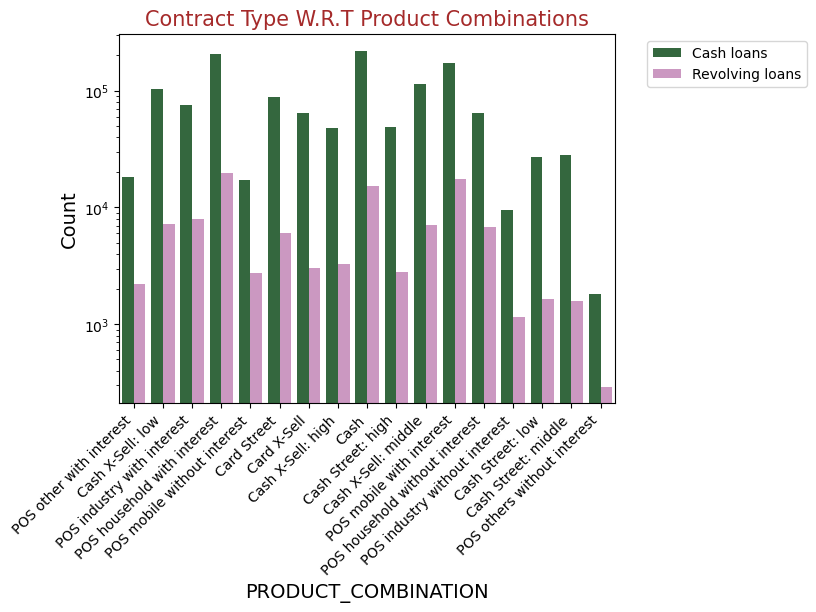

In [450]:
#Checkng the Product combination with respect to Type of contract
sns.countplot(adf_padf, x ="PRODUCT_COMBINATION", hue=adf_padf.NAME_CONTRACT_TYPE_, palette = "cubehelix")
plt.yscale('log')
plt.title('Contract Type W.R.T Product Combinations',fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Brown'})
plt.legend(bbox_to_anchor=(1.4,1))
plt.xticks(rotation=45,horizontalalignment='right')
plt.xlabel("PRODUCT_COMBINATION", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

#### **<font color='green'>Maximum number of cash loans are for Product combination of POS household with interest followed by Cash.**
#### **<font color='green'>Least number of loans are for product combination of POS others without interest.**

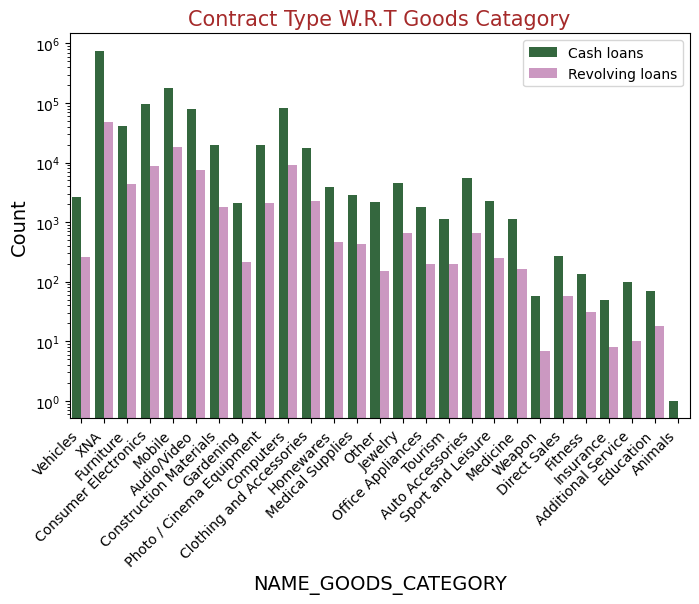

In [449]:
#Checkng the Goods Catagory with respect to Type of contract type.
plt.figure(figsize = (8,5))
sns.countplot(adf_padf, x ="NAME_GOODS_CATEGORY", hue=adf_padf.NAME_CONTRACT_TYPE_, palette = "cubehelix")
plt.yscale('log')
plt.title('Contract Type W.R.T Goods Catagory' ,fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Brown'})
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(rotation=45,horizontalalignment='right')
plt.xlabel("NAME_GOODS_CATEGORY", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

#### **<font color='green'>Maximum number of loans are for XNA followed by Mobile and Electronics.**
#### **<font color='green'>Least number of loans are for Animals.**

#### <font color='Red'>NAME_CONTRACT_STATUS

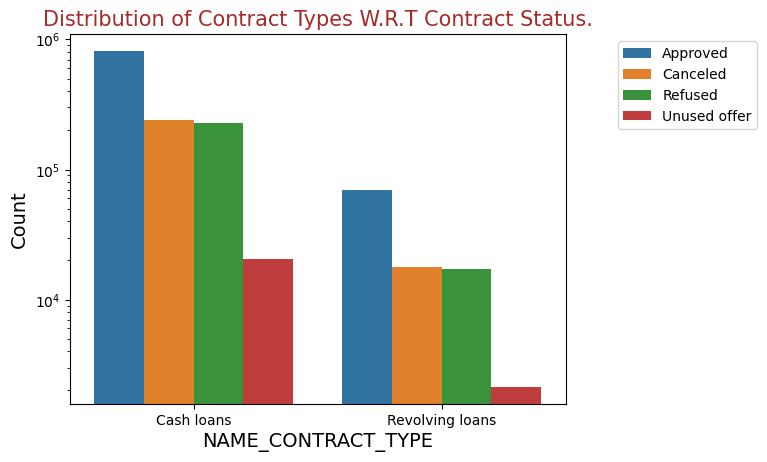

In [383]:
#Plotting a countplot to check relation between Contract types and Contract status 
sns.countplot(adf_padf, x ="NAME_CONTRACT_TYPE_", hue=adf_padf.NAME_CONTRACT_STATUS, palette = "tab10")
plt.title('Distribution of Contract Types W.R.T Contract Status.',fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Brown'})
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.4,1))
plt.xlabel("NAME_CONTRACT_TYPE", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

#### **<font color='green'>Maximum number of approved loans are from Cash Loan contract type. Contract staus count is higher for Cash loans compared to Revolving loans**
    
#### **<font color='green'>Customers tend to accept more offers given for Revolving Loans.**

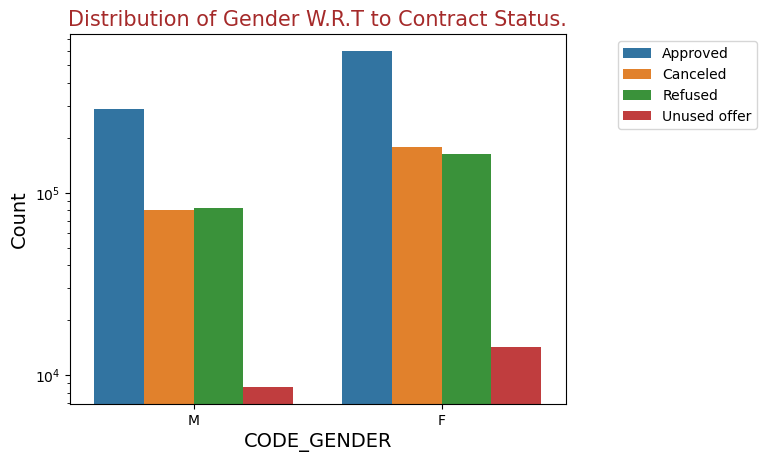

In [384]:
# Checking the count of Gender with respect to Contract Status
sns.countplot(adf_padf, x ="CODE_GENDER", hue=adf_padf.NAME_CONTRACT_STATUS, palette = "tab10")
plt.yscale('log')
plt.title('Distribution of Gender W.R.T to Contract Status.',fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'brown'})
plt.legend(bbox_to_anchor=(1.4,1))
plt.xlabel("CODE_GENDER", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

#### **<font color='green'>Female Customers have Maximum approved loans.**
#### **<font color='green'>Male clients use most of the offers of loans as unused offers are very less for male clients than that of female clients**

In [ ]:
#Checkng the Product combination with respect to Type of contract 
plt.figure(figsize=(8,6))
sns.countplot(adf_padf, x ="PRODUCT_COMBINATION", hue=adf_padf.NAME_CONTRACT_STATUS, palette = "tab10")
plt.yscale('log')
plt.title('Distribution of Product Combinations W.R.T Contract Type', fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Brown'})
plt.legend(bbox_to_anchor=(1,1),fontsize=10)
plt.xticks(rotation=45,fontsize=10,horizontalalignment='right')
plt.yticks(fontsize=10)
plt.xlabel("PRODUCT_COMBINATION", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

### **<font color='green'>MAXIMUM COUNTS**
#### **<font color='green'>a) Maximum number of approved loans are for POS household with interest.**
#### **<font color='green'>b) Maximum number of cancelled loans are for Cash.**    
#### **<font color='green'>c) Maximum number of refused loans are for Cash X-Sell: low.**
#### **<font color='green'>d) Maximum number of unused offers are for POS mobile with interest**    
    
### **<font color='green'>MINIMUM COUNTS**
#### **<font color='green'>a) Minimum number of approved loans are for Cash.**
#### **<font color='green'>b) Minimum number of cancelled loans are for POS industry without interest, POS others without interest.**    
#### **<font color='green'>c) Minimum number of refused loans are for POS others without interest.**
#### **<font color='green'>d) Minimum number of unused offers are for**  
#### **<font color='green'>1. Cash X-Sell: low**
#### **<font color='green'>2. Card X-Sell**
#### **<font color='green'>3. Card X-Sell: high**
#### **<font color='green'>4. Cash Street: high**
#### **<font color='green'>5. Cash X-Sell: middle**
#### **<font color='green'>6. POS household without interest**
#### **<font color='green'>7. POS industry without interest**
#### **<font color='green'>8. Cash X-Sell: low**
#### **<font color='green'>9. Cash Street: middle**
#### **<font color='green'>10. Cash POS others without interest**
 

<Axes: title={'center': 'Distribution of Income Types w.r.t Contract Status'}, xlabel='count', ylabel='NAME_INCOME_TYPE'>

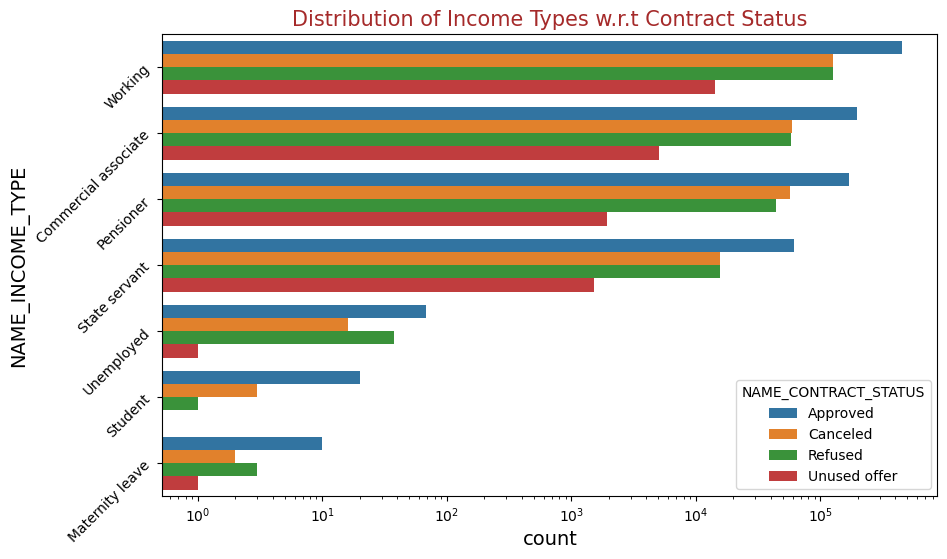

In [394]:
#Checkng the distribution of loan Status with respect to Education.
plt.figure(figsize=(10,6))
plt.xscale('log')
plt.ylabel("NAME_INCOME_TYPE", fontsize=14)
plt.xlabel("Count", fontsize=14)
plt.yticks(rotation=45)
plt.title('Distribution of Income Types w.r.t Contract Status',fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Brown'})
sns.countplot(data=adf_padf,y='NAME_INCOME_TYPE',order=['Working', 'Commercial associate', 'Pensioner', 'State servant', 'Unemployed', 'Student', 'Maternity leave'],hue='NAME_CONTRACT_STATUS', palette = "tab10")

#### **<font color='green'>Working Catagory has the maximum counts for all Contract status.**
    
#### **<font color='green'>Student Catagory has no unused offers.**


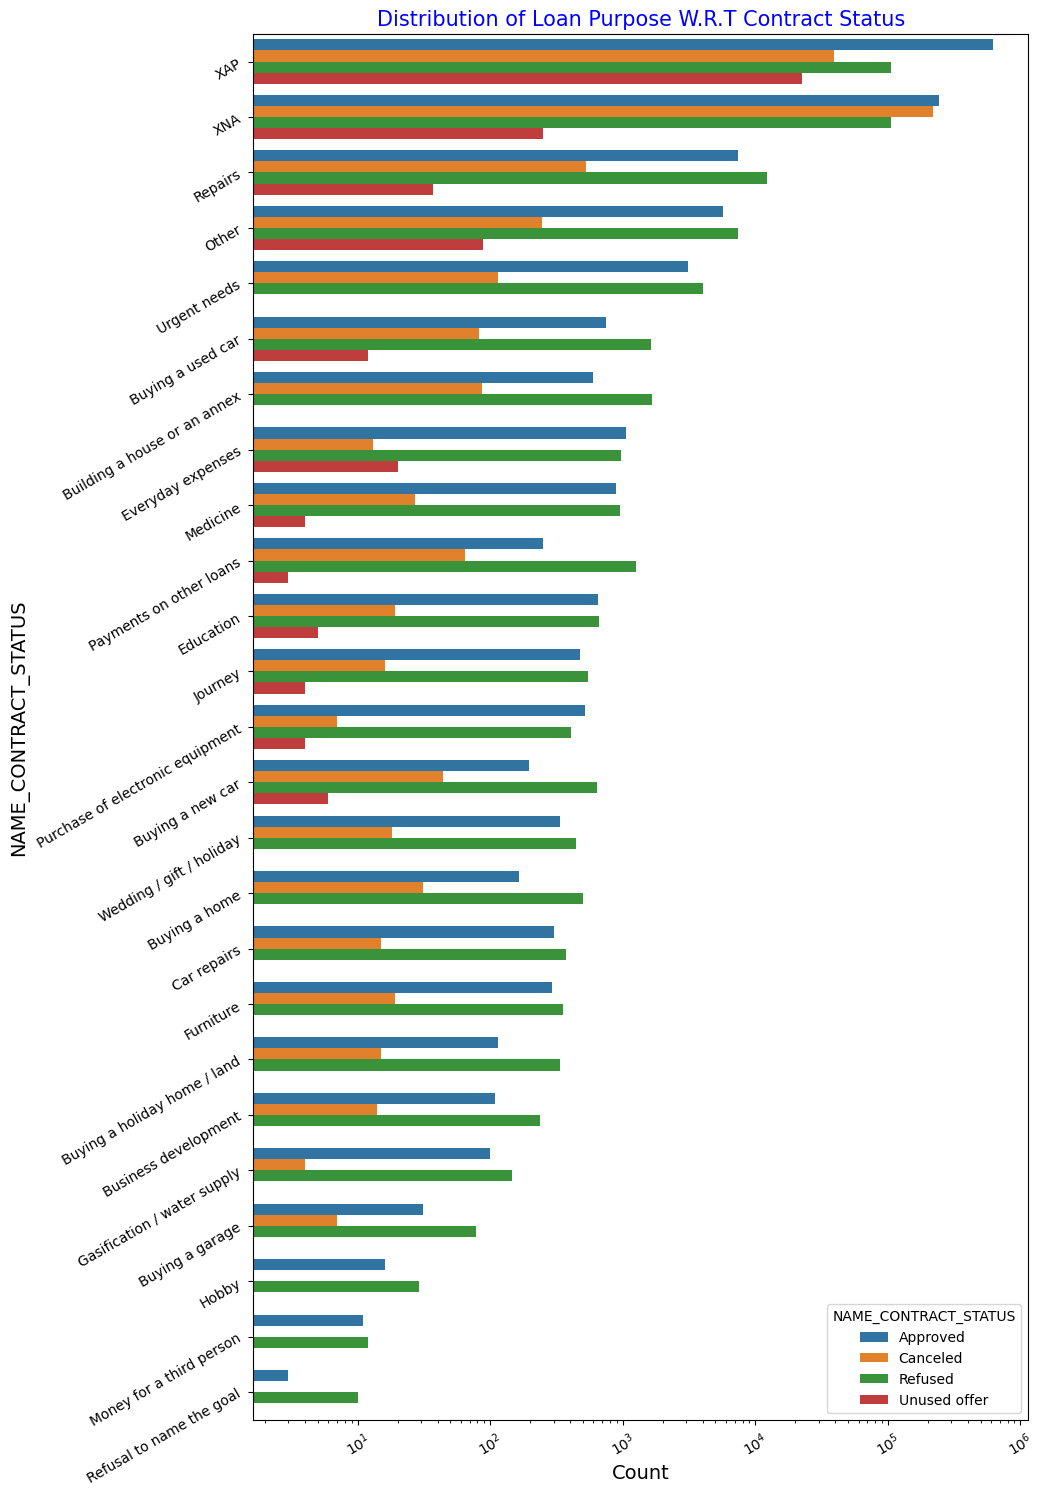

In [396]:
#Checkng the distribution of loan Status with respect to Purpose.
plt.figure(figsize=(10,18))
plt.xticks(rotation=30)
plt.xscale('log')
plt.yticks(rotation=30)
plt.title('Distribution of Loan Purpose W.R.T Contract Status',fontdict={'fontsize': 15, 'fontweight' : 7, 'color' : 'Blue'})
sns.countplot(data=adf_padf,y='NAME_CASH_LOAN_PURPOSE',order=['XAP', 'XNA', 'Repairs', 'Other', 'Urgent needs', 'Buying a used car', 'Building a house or an annex', 'Everyday expenses', 'Medicine', 'Payments on other loans', 'Education', 'Journey', 'Purchase of electronic equipment', 'Buying a new car', 'Wedding / gift / holiday', 'Buying a home', 'Car repairs', 'Furniture', 'Buying a holiday home / land', 'Business development', 'Gasification / water supply', 'Buying a garage', 'Hobby', 'Money for a third person', 'Refusal to name the goal'],hue='NAME_CONTRACT_STATUS', palette = "tab10")
plt.xlabel("Count", fontsize=14)
plt.ylabel("NAME_CONTRACT_STATUS", fontsize=14)
plt.show()

#### **<font color='green'>As we are nor certain about XAP and XNA we will analyze the rest**
    
#### **<font color='green'>Working Catagory has the maximum counts for all Contract status.**
    
#### **<font color='green'>Almost all the catagories have more refusal and approval.**    
    
#### **<font color='green'>Education and Medicine has similar Approval and Refusal status.**

### <font color='brown'>Bivariate Analysis

#### <font color='Red'>Prev Credit amount vs Housing Type

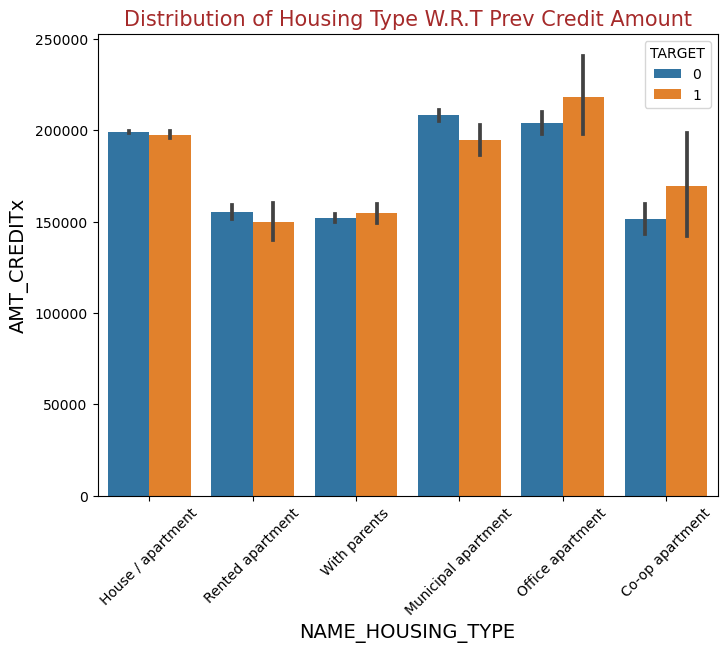

In [400]:
##Plotting a barplot to check relation between Previous Credit Amount vs Housing type
plt.figure(figsize=(8,6))
plt.xticks(rotation = 45)
sns.barplot(data =adf_padf, y='AMT_CREDITx',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Distribution of Housing Type W.R.T Prev Credit Amount', fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Brown'})
plt.xlabel("NAME_HOUSING_TYPE", fontsize=14)
plt.ylabel("AMT_CREDITx", fontsize=14)
plt.show()

#### **<font color='green'> Office apartment is having the highest credit of defaulters in Housing Type.**
    
#### **<font color='green'>Municipal apartment is having the highest credit of repayers in Housing Type.**
    
#### **<font color='green'>Banks can target customers with own  on House\apartment or Rented apartment or municipal apartment**    
    

## <font color='violet'>Correlation Matrix

In [231]:
# For creating correlation we will select the continous/appropriate columns.
adf_padf_corr = adf_padf[["TARGET", "CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT_", "AMT_ANNUITY_", "AMT_GOODS_PRICE_", "CNT_FAM_MEMBERS", "OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", "AMT_ANNUITYx", "AMT_APPLICATION", "AMT_CREDITx", "AMT_GOODS_PRICEx","SELLERPLACE_AREA", "CNT_PAYMENT"]]


In [232]:
#Correlation between numeric variable for Target = 0 
adf_padf_corr.corr()

TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
TARGET                    1.000000      0.020270         -0.012077   
CNT_CHILDREN              0.020270      1.000000          0.020926   
AMT_INCOME_TOTAL         -0.012077      0.020926          1.000000   
AMT_CREDIT_              -0.023635      0.003082          0.322824   
AMT_ANNUITY_             -0.007415      0.029715          0.400501   
AMT_GOODS_PRICE_         -0.032573     -0.000785          0.325949   
CNT_FAM_MEMBERS           0.014772      0.878442          0.025356   
OBS_30_CNT_SOCIAL_CIRCLE  0.014194      0.017678         -0.017258   
DEF_30_CNT_SOCIAL_CIRCLE  0.031960     -0.000002         -0.023483   
OBS_60_CNT_SOCIAL_CIRCLE  0.014070      0.017128         -0.017094   
DEF_60_CNT_SOCIAL_CIRCLE  0.028602     -0.001685         -0.024059   
AMT_ANNUITYx             -0.015785     -0.032616          0.193773   
AMT_APPLICATION          -0.005587     -0.034221          0.139599   
AMT_CREDITx              -0.002354     -0.034938          0.138074   
AMT_GOODS_PRICEx         -0.002798     -0.040229          0.149389   
SELLERPLACE_AREA         -0.002537      0.000749          0.003290   
CNT_PAYMENT               0.023683     -0.046571          0.032052   

                          AMT_CREDIT_  AMT_ANNUITY_  AMT_GOODS_PRICE_  \
TARGET                      -0.023635     -0.007415         -0.032573   
CNT_CHILDREN                 0.003082      0.029715         -0.000785   
AMT_INCOME_TOTAL             0.322824      0.400501          0.325949   
AMT_CREDIT_                  1.000000      0.758415          0.986105   
AMT_ANNUITY_                 0.758415      1.000000          0.762002   
AMT_GOODS_PRICE_             0.986105      0.762002          1.000000   
CNT_FAM_MEMBERS              0.063718      0.084847          0.061822   
OBS_30_CNT_SOCIAL_CIRCLE     0.006619     -0.005389          0.008321   
DEF_30_CNT_SOCIAL_CIRCLE    -0.018309     -0.019942         -0.018349   
OBS_60_CNT_SOCIAL_CIRCLE     0.006631     -0.005016          0.008277   
DEF_60_CNT_SOCIAL_CIRCLE    -0.021714     -0.021660         -0.021620   
AMT_ANNUITYx                 0.137998      0.178174          0.139917   
AMT_APPLICATION              0.118808      0.112064          0.120690   
AMT_CREDITx                  0.116748      0.107649          0.117165   
AMT_GOODS_PRICEx             0.122086      0.116674          0.123560   
SELLERPLACE_AREA             0.003461      0.004493          0.004426   
CNT_PAYMENT                  0.035977     -0.004439          0.034623   

                          CNT_FAM_MEMBERS  OBS_30_CNT_SOCIAL_CIRCLE  \
TARGET                           0.014772                  0.014194   
CNT_CHILDREN                     0.878442                  0.017678   
AMT_INCOME_TOTAL                 0.025356                 -0.017258   
AMT_CREDIT_                      0.063718                  0.006619   
AMT_ANNUITY_                     0.084847                 -0.005389   
AMT_GOODS_PRICE_                 0.061822                  0.008321   
CNT_FAM_MEMBERS                  1.000000                  0.029848   
OBS_30_CNT_SOCIAL_CIRCLE         0.029848                  1.000000   
DEF_30_CNT_SOCIAL_CIRCLE        -0.000705                  0.314913   
OBS_60_CNT_SOCIAL_CIRCLE         0.029410                  0.998562   
DEF_60_CNT_SOCIAL_CIRCLE        -0.004472                  0.241148   
AMT_ANNUITYx                    -0.004468                 -0.005588   
AMT_APPLICATION                 -0.005732                  0.007531   
AMT_CREDITx                     -0.005172                  0.007512   
AMT_GOODS_PRICEx                -0.009414                  0.007594   
SELLERPLACE_AREA                 0.000577                 -0.001291   
CNT_PAYMENT                     -0.027912                  0.019596   

                          DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
TARGET                                    0.031960                  0.014070   
CNT_CHILDREN 

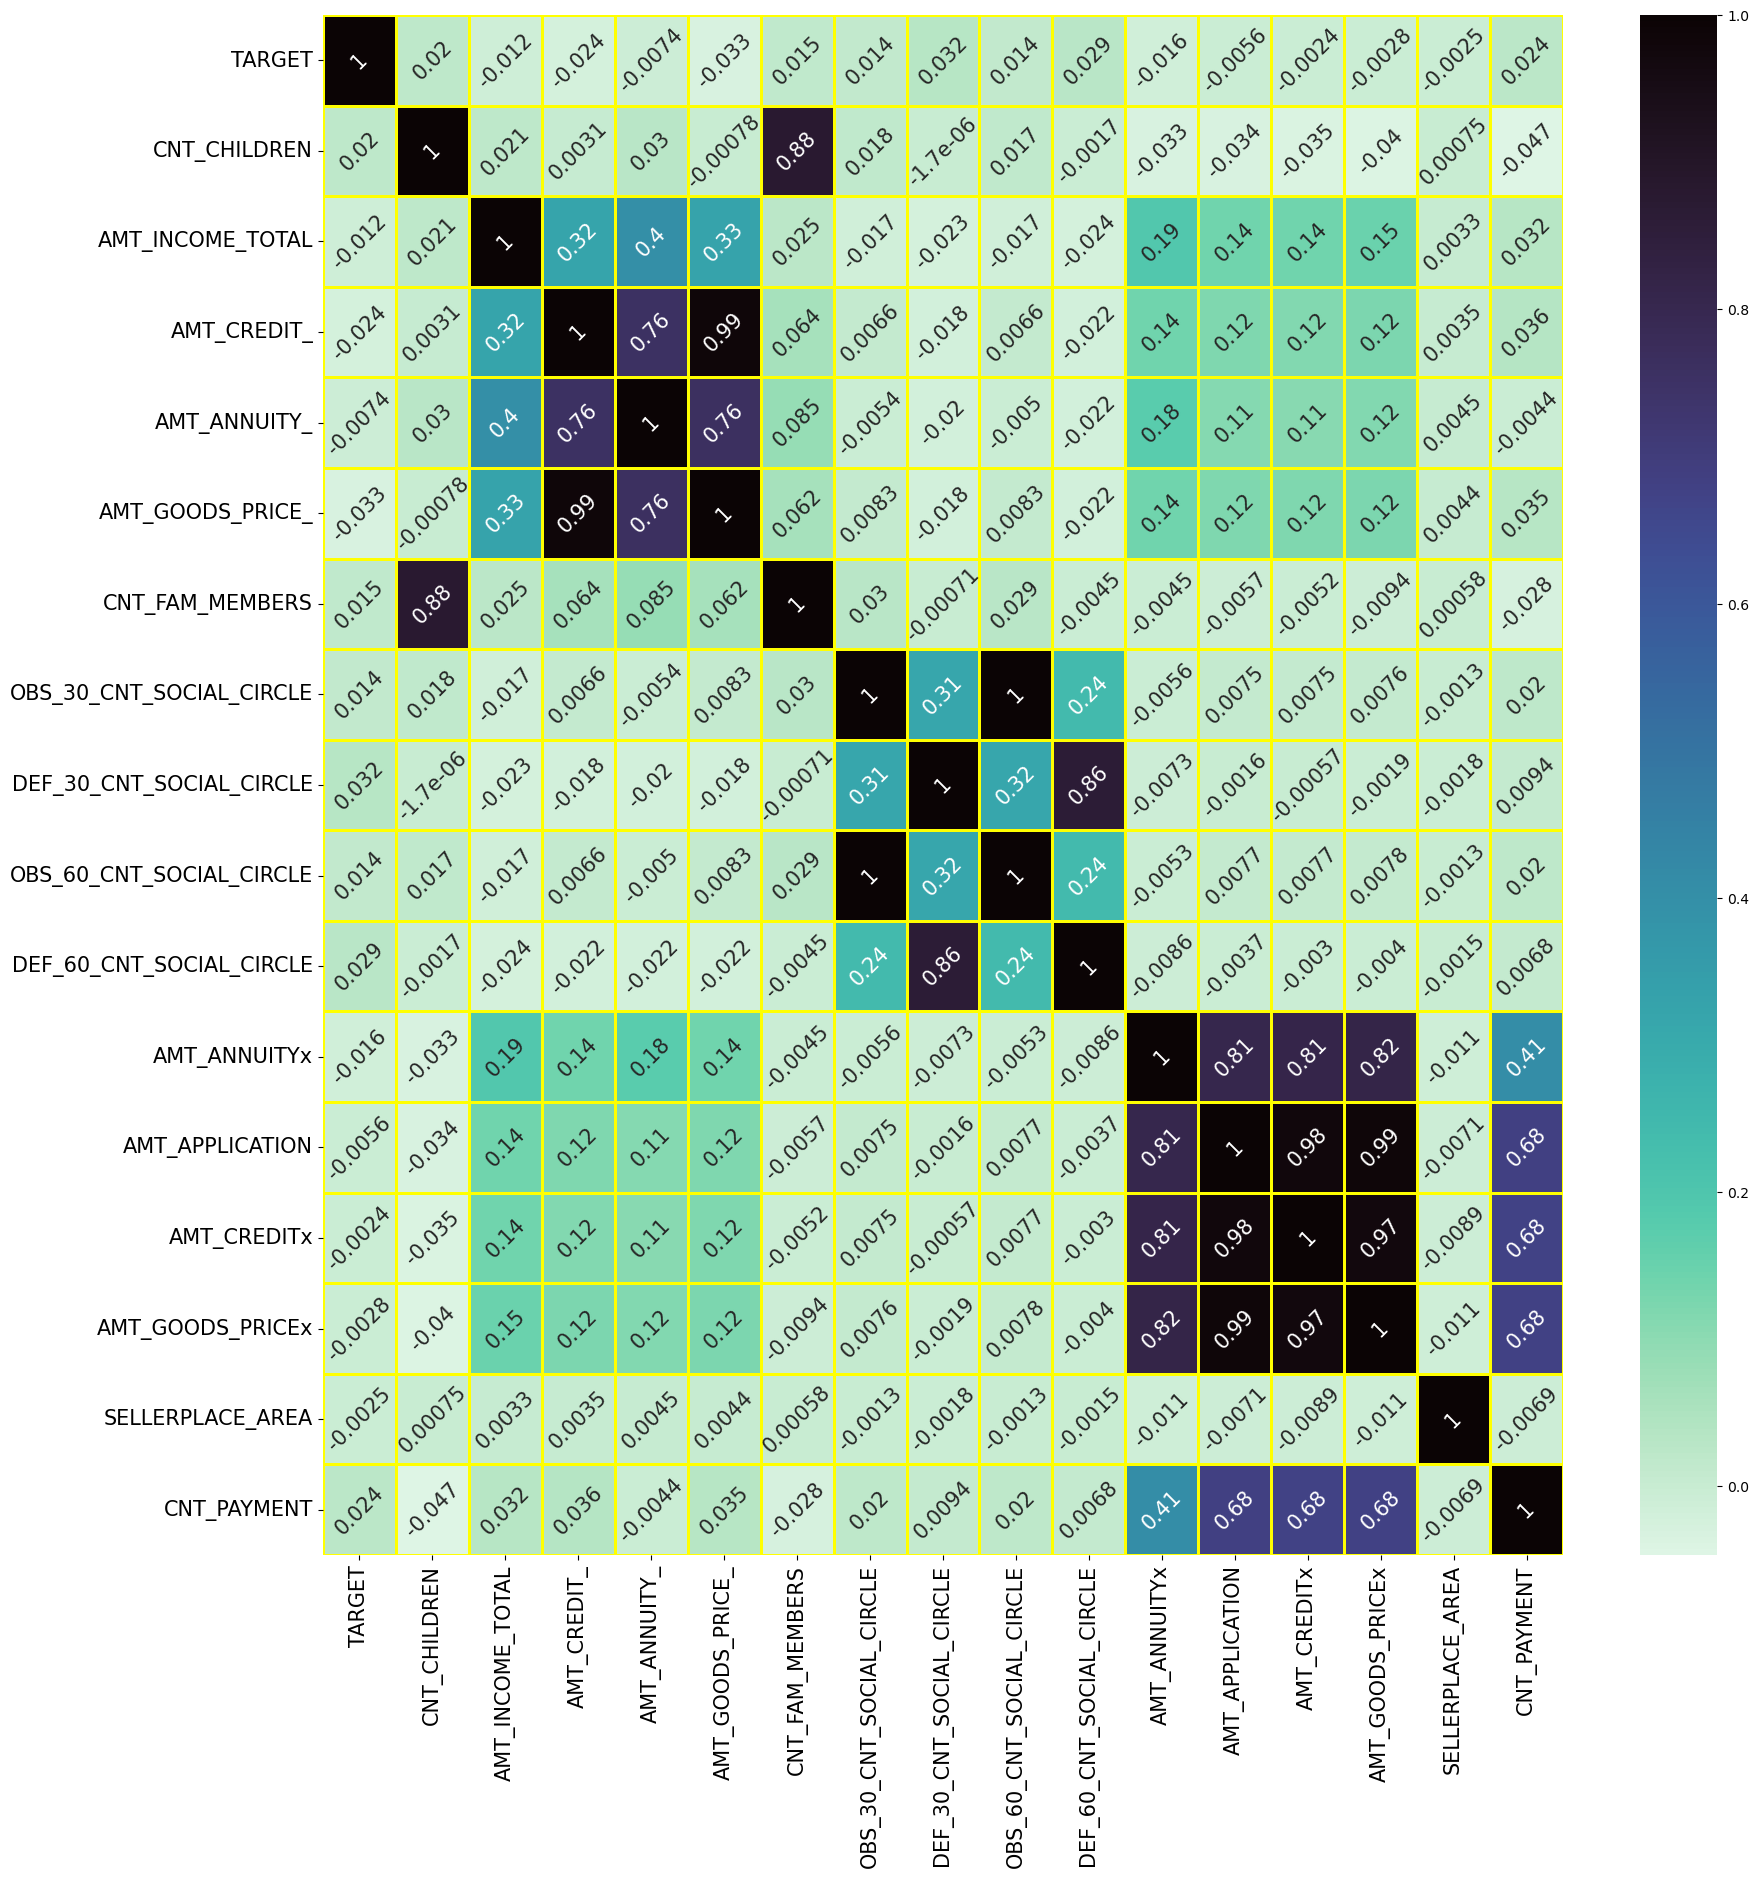

In [412]:
plt.figure(figsize = (20,20))
sns.heatmap(adf_padf_corr.corr(),  annot=True, annot_kws={'size': 15,'rotation':45}, cmap="mako_r", linewidth = 1, linecolor="yellow").tick_params(labelsize=15)
plt.show()

**<font color='green'>From the above heat map we can note the following.**

**<font color='Blue'>Highly Positively Correlated Variables.**

**<font color='green'>- AMT_CREDIT vs AMT_GOODS_PRICE**
    
**<font color='green'>- AMT_CREDIT vs AMT_ANNUITY**

**<font color='green'>- AMT_ANNUITY vs AMT_GOODS_PRICE**
    
**<font color='green'>- CNT_FAM_MEMBERS vs CNT_CHILDREN**

**<font color='green'>-DEF_30_CNT_SOCIAL_CIRCLE vs DEF_60_CNT_SOCIAL_CIRCLE**

**<font color='green'>-OBS_30_CNT_SOCIAL_CIRCLE vs OBS_60_CNT_SOCIAL_CIRCLE**
    
**<font color='green'>-AMT_ANNUITYx vs AMT_APPLICATION**
    
**<font color='green'>-AMT_ANNUITYx vs AMT_CREDITx**

**<font color='green'>-AMT_ANNUITYx vs AMT_GOODS_PRICEx**
    
**<font color='green'>-AMT_APPLICATION vs AMT_CREDITx**
    
**<font color='green'>-AMT_APPLICATION vs AMT_GOODS_PRICEx**
    
**<font color='green'>-AMT_GOODS_PRICEx vs AMT_CREDITx**
    
**<font color='green'>-CNT_PAYMENT vs AMT_APPLICATION**    
    
**<font color='green'>-CNT_PAYMENT vs AMT_CREDITx**    
    
**<font color='green'>-CNT_PAYMENT vs AMT_GOODS_PRICEx**    
    
**<font color='Blue'>Highly Negatively Correlated Variables.**

**<font color='green'>- There are no Highly Negatively Correlated Variables.**
    
**<font color='Blue'>So from the above heatmaps we caan conclude that the variables correlated in T0 and T1 are same with small variation in the correlation values.**


## <font color='indigo'>Conclusion

**<font color='Green'>a) After finishing analysis on the Bank dataset, it can be concluded that there are factors related to the customer with which the bank would be able to predict both Repayers and Defaulters.Those contributing factors can be summarized as below.**
    
**<font color='blue'>A. Repayer:**
    
**<font color='brown'>1) Gender: Females are less likely to default.**
    
**<font color='brown'>1) Education Type: Secondary/secondary special Education followed bt Higher Education has more Repayers**
    
**<font color='brown'>2) Income Type: Maximum repaying customers are under working catagory.**
    
**<font color='brown'>3) Housing Type:Maximum repaying customers owning House/Apartment followed by customers living with parents**
    
**<font color='brown'>4) Age: Customers in Age range of 30-40 are very less likely to default.**
    
**<font color='brown'>5) Total Income: Maximum customers without any repaying difficulties are having a salary range of 1L - 2L.**
    
**<font color='brown'>6) Family Status: Maximum customers without any repaying difficulties are married.**  
    
**<font color='blue'>A. Defaulter:**
    
**<font color='brown'>1) Gender: Men default at a relatively higher rate.**
    
**<font color='brown'>2) Education Type: Customers with Lower Secondary education have a slightly higher refaulting rate compared to same catagory repayers.**
    
**<font color='brown'>3) Income Type: Customers who are either at Maternity leave OR Unemployed tends to default more.**  

**<font color='brown'>4) Age: Customers in Age range below 30 are very likely to default.**   
    
**<font color='brown'>5) Family Status: Customers other than married are likely to default.**  
    
**<font color='Green'>b) Other Factors Noticed during Analysis.** 
    
**<font color='brown'>1) Credit amount for those who dont have payment difficulties is higher than those with payment difficulties.**

**<font color='brown'>2) AMT_CREDIT and AMT_GOODS_PRICE are highly correlated. Customers with higher goods price and dont have payment difficulties have higher credit amount than those with higher goods price but are having payment difficulties.**

**<font color='brown'>3) Most of the defaulters are having Less than 5L total income.**    
    
    